In [1]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_size_path = './../tmp_simulation/tmp_data/one_hole_size_data.csv'
one_hole_position_path = './../tmp_simulation/tmp_data/one_hole_position_data.csv'
four_holes_size_path = './../tmp_simulation/tmp_data/four_holes_size_data.csv'
four_holes_position_path = './../tmp_simulation/tmp_data/four_holes_position_data.csv'
nine_holes_size_path = './../tmp_simulation/tmp_data/nine_holes_size_data.csv'
nine_holes_position_path = './../tmp_simulation/tmp_data/nine_holes_position_data.csv'
sixteen_holes_size_path = './../tmp_simulation/tmp_data/sixteen_holes_size_data.csv'
sixteen_holes_position_path = './../tmp_simulation/tmp_data/sixteen_holes_position_data.csv'
twentyfive_holes_size_path = './../tmp_simulation/tmp_data/twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = './../tmp_simulation/tmp_data/twentyfive_holes_position_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_data = []
size_y_data = []
position_x_data = []
position_one_data = []
position_two_data = []
position_three_data = []
position_four_data = []
position_five_data = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(four_holes_size_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(nine_holes_size_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(sixteen_holes_size_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(twentyfive_holes_size_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_one_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(four_holes_position_path) as fp2:
  for line in fp2:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_two_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(nine_holes_position_path) as fp3:
  for line in fp3:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_three_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(sixteen_holes_position_path) as fp4:
  for line in fp4:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_four_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(twentyfive_holes_position_path) as fp5:
  for line in fp5:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_five_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
size_x_data = np.array(size_x_data, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data = np.array(position_x_data, dtype=float)
position_one_data = np.array(position_one_data, dtype=float)
position_two_data = np.array(position_two_data, dtype=float)
position_three_data = np.array(position_three_data, dtype=float)
position_four_data = np.array(position_four_data, dtype=float)
position_five_data = np.array(position_five_data, dtype=float)
position_y_data = np.array(position_y_data, dtype=int)

### データの加工
size_x_data = (size_x_data-no_hole_data)
position_x_data = (position_x_data-no_hole_data)
position_one_data = (position_one_data-no_hole_data)
position_two_data = (position_two_data-no_hole_data)
position_three_data = (position_three_data-no_hole_data)
position_four_data = (position_four_data-no_hole_data)
position_five_data = (position_five_data-no_hole_data)
size_y_data = keras.utils.to_categorical(size_y_data, 6)
position_y_data = (position_y_data-1)
position_y_data = keras.utils.to_categorical(position_y_data, 25)

### train用とtest用に分割(4:1)
size_x_train, size_x_test, size_y_train, size_y_test = train_test_split(size_x_data, size_y_data, test_size=0.20)
position_x_train, position_x_test, position_y_train, position_y_test = train_test_split(position_x_data, position_y_data, test_size=0.20)


### reshape
size_x_train = size_x_train.reshape(8108, 50, 1)
size_x_test = size_x_test.reshape(2027, 50, 1)
position_x_train = position_x_train.reshape(8108, 50, 1)
position_x_test = position_x_test.reshape(2027, 50, 1)

In [105]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(1, use_bias=False))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

In [106]:
# 学習(大きさ)
epochs = 1000
batch_size = 128
size_history = size_model.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/1000
8108/8108 [==============================] - 0s 43us/step - loss: 1.5968 - accuracy: 0.3161 - val_loss: 1.4856 - val_accuracy: 0.5427
Epoch 2/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.4111 - accuracy: 0.4377 - val_loss: 1.3727 - val_accuracy: 0.5220
Epoch 3/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.3205 - accuracy: 0.4884 - val_loss: 1.2982 - val_accuracy: 0.6127
Epoch 4/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.2699 - accuracy: 0.5072 - val_loss: 1.2558 - val_accuracy: 0.4983
Epoch 5/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.2216 - accuracy: 0.5368 - val_loss: 1.2226 - val_accuracy: 0.5619
Epoch 6/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.1855 - accuracy: 0.5380 - val_loss: 1.1767 - val_accuracy: 0.5047
Epoch 7/1000
8108/8108 [==============================] - 0s 27us/step

8108/8108 [==============================] - 0s 27us/step - loss: 0.7652 - accuracy: 0.7636 - val_loss: 0.7976 - val_accuracy: 0.7000
Epoch 57/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.7593 - accuracy: 0.7723 - val_loss: 0.8525 - val_accuracy: 0.6423
Epoch 58/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7540 - accuracy: 0.7676 - val_loss: 0.7789 - val_accuracy: 0.8170
Epoch 59/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.7491 - accuracy: 0.7716 - val_loss: 0.7673 - val_accuracy: 0.8165
Epoch 60/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7381 - accuracy: 0.7934 - val_loss: 0.7677 - val_accuracy: 0.7686
Epoch 61/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.7449 - accuracy: 0.7782 - val_loss: 0.8330 - val_accuracy: 0.7400
Epoch 62/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7504 - accuracy: 0.7570 - val_loss: 0.8085 -

8108/8108 [==============================] - 0s 26us/step - loss: 0.5304 - accuracy: 0.8742 - val_loss: 0.5914 - val_accuracy: 0.9053
Epoch 167/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.5329 - accuracy: 0.8742 - val_loss: 0.5712 - val_accuracy: 0.8865
Epoch 168/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.5310 - accuracy: 0.8799 - val_loss: 0.6255 - val_accuracy: 0.8002
Epoch 169/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.5276 - accuracy: 0.8777 - val_loss: 0.5686 - val_accuracy: 0.8855
Epoch 170/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.5242 - accuracy: 0.8836 - val_loss: 0.5837 - val_accuracy: 0.8653
Epoch 171/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.5145 - accuracy: 0.8891 - val_loss: 0.6149 - val_accuracy: 0.8032
Epoch 172/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5273 - accuracy: 0.8630 - val_loss: 0.

8108/8108 [==============================] - 0s 25us/step - loss: 0.4621 - accuracy: 0.8991 - val_loss: 0.5951 - val_accuracy: 0.8732
Epoch 222/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4786 - accuracy: 0.8927 - val_loss: 0.5183 - val_accuracy: 0.9137
Epoch 223/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4574 - accuracy: 0.9021 - val_loss: 0.5636 - val_accuracy: 0.8846
Epoch 224/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4734 - accuracy: 0.8928 - val_loss: 0.5642 - val_accuracy: 0.8895
Epoch 225/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4770 - accuracy: 0.8889 - val_loss: 0.5682 - val_accuracy: 0.8648
Epoch 226/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4757 - accuracy: 0.8871 - val_loss: 0.5555 - val_accuracy: 0.8772
Epoch 227/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4618 - accuracy: 0.9026 - val_loss: 0.

Epoch 276/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4279 - accuracy: 0.9048 - val_loss: 0.4704 - val_accuracy: 0.9068
Epoch 277/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4475 - accuracy: 0.8874 - val_loss: 0.5447 - val_accuracy: 0.8569
Epoch 278/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4228 - accuracy: 0.9080 - val_loss: 0.4587 - val_accuracy: 0.9171
Epoch 279/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4078 - accuracy: 0.9167 - val_loss: 0.4977 - val_accuracy: 0.9003
Epoch 280/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4217 - accuracy: 0.9079 - val_loss: 0.4511 - val_accuracy: 0.9092
Epoch 281/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4172 - accuracy: 0.9140 - val_loss: 0.4807 - val_accuracy: 0.9058
Epoch 282/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4104 - accuracy: 0.9176

Epoch 331/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3778 - accuracy: 0.9230 - val_loss: 0.4739 - val_accuracy: 0.9211
Epoch 332/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3897 - accuracy: 0.9154 - val_loss: 0.5252 - val_accuracy: 0.8540
Epoch 333/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3748 - accuracy: 0.9197 - val_loss: 0.4162 - val_accuracy: 0.9285
Epoch 334/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3826 - accuracy: 0.9206 - val_loss: 0.4358 - val_accuracy: 0.9221
Epoch 335/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3679 - accuracy: 0.9221 - val_loss: 0.4333 - val_accuracy: 0.9240
Epoch 336/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3668 - accuracy: 0.9250 - val_loss: 0.4163 - val_accuracy: 0.9265
Epoch 337/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3841 - accuracy: 0.9181

Epoch 386/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3547 - accuracy: 0.9213 - val_loss: 0.4324 - val_accuracy: 0.9107
Epoch 387/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3394 - accuracy: 0.9301 - val_loss: 0.4753 - val_accuracy: 0.9275
Epoch 388/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.3582 - accuracy: 0.9256 - val_loss: 0.4255 - val_accuracy: 0.9299
Epoch 389/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3425 - accuracy: 0.9251 - val_loss: 0.4185 - val_accuracy: 0.9304
Epoch 390/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3461 - accuracy: 0.9276 - val_loss: 0.4148 - val_accuracy: 0.9156
Epoch 391/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3411 - accuracy: 0.9272 - val_loss: 0.4543 - val_accuracy: 0.9038
Epoch 392/1000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3393 - accuracy: 0.9290

Epoch 441/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3144 - accuracy: 0.9348 - val_loss: 0.4109 - val_accuracy: 0.9230
Epoch 442/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3148 - accuracy: 0.9306 - val_loss: 0.3944 - val_accuracy: 0.9290
Epoch 443/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3218 - accuracy: 0.9286 - val_loss: 0.3867 - val_accuracy: 0.9295
Epoch 444/1000
8108/8108 [==============================] - 0s 33us/step - loss: 0.3154 - accuracy: 0.9350 - val_loss: 0.3962 - val_accuracy: 0.9186
Epoch 445/1000
8108/8108 [==============================] - 0s 32us/step - loss: 0.3249 - accuracy: 0.9303 - val_loss: 0.4121 - val_accuracy: 0.9235
Epoch 446/1000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3131 - accuracy: 0.9351 - val_loss: 0.4089 - val_accuracy: 0.9087
Epoch 447/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3215 - accuracy: 0.9311

Epoch 496/1000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3040 - accuracy: 0.9311 - val_loss: 0.4130 - val_accuracy: 0.9309
Epoch 497/1000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3103 - accuracy: 0.9350 - val_loss: 0.3938 - val_accuracy: 0.9225
Epoch 498/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3034 - accuracy: 0.9334 - val_loss: 0.3842 - val_accuracy: 0.9304
Epoch 499/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3033 - accuracy: 0.9330 - val_loss: 0.3830 - val_accuracy: 0.9314
Epoch 500/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3047 - accuracy: 0.9307 - val_loss: 0.3927 - val_accuracy: 0.9171
Epoch 501/1000
8108/8108 [==============================] - 0s 32us/step - loss: 0.2974 - accuracy: 0.9351 - val_loss: 0.3502 - val_accuracy: 0.9280
Epoch 502/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3016 - accuracy: 0.9329

Epoch 551/1000
8108/8108 [==============================] - 0s 33us/step - loss: 0.2876 - accuracy: 0.9365 - val_loss: 0.3680 - val_accuracy: 0.9265
Epoch 552/1000
8108/8108 [==============================] - 0s 36us/step - loss: 0.2794 - accuracy: 0.9362 - val_loss: 0.3635 - val_accuracy: 0.9201
Epoch 553/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2767 - accuracy: 0.9398 - val_loss: 0.3608 - val_accuracy: 0.9349
Epoch 554/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2767 - accuracy: 0.9386 - val_loss: 0.4004 - val_accuracy: 0.9092
Epoch 555/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2906 - accuracy: 0.9356 - val_loss: 0.3480 - val_accuracy: 0.9329
Epoch 556/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2844 - accuracy: 0.9393 - val_loss: 0.3741 - val_accuracy: 0.9344
Epoch 557/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.2856 - accuracy: 0.9361

Epoch 606/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2842 - accuracy: 0.9333 - val_loss: 0.4219 - val_accuracy: 0.8944
Epoch 607/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2831 - accuracy: 0.9332 - val_loss: 0.3544 - val_accuracy: 0.9329
Epoch 608/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2697 - accuracy: 0.9381 - val_loss: 0.3345 - val_accuracy: 0.9349
Epoch 609/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2628 - accuracy: 0.9412 - val_loss: 0.3505 - val_accuracy: 0.9408
Epoch 610/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2660 - accuracy: 0.9388 - val_loss: 0.3534 - val_accuracy: 0.9324
Epoch 611/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2668 - accuracy: 0.9412 - val_loss: 0.3423 - val_accuracy: 0.9388
Epoch 612/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2723 - accuracy: 0.9370

Epoch 661/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2530 - accuracy: 0.9425 - val_loss: 0.3716 - val_accuracy: 0.9270
Epoch 662/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2529 - accuracy: 0.9434 - val_loss: 0.3756 - val_accuracy: 0.9171
Epoch 663/1000
8108/8108 [==============================] - ETA: 0s - loss: 0.2682 - accuracy: 0.93 - 0s 25us/step - loss: 0.2668 - accuracy: 0.9365 - val_loss: 0.3317 - val_accuracy: 0.9393
Epoch 664/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2584 - accuracy: 0.9365 - val_loss: 0.3221 - val_accuracy: 0.9359
Epoch 665/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.2490 - accuracy: 0.9445 - val_loss: 0.3581 - val_accuracy: 0.9275
Epoch 666/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.2590 - accuracy: 0.9385 - val_loss: 0.3758 - val_accuracy: 0.9196
Epoch 667/1000
8108/8108 [==============================] - 0s 3

Epoch 716/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2414 - accuracy: 0.9454 - val_loss: 0.3414 - val_accuracy: 0.9369
Epoch 717/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2531 - accuracy: 0.9412 - val_loss: 0.3495 - val_accuracy: 0.9240
Epoch 718/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2412 - accuracy: 0.9430 - val_loss: 0.3090 - val_accuracy: 0.9433
Epoch 719/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2418 - accuracy: 0.9459 - val_loss: 0.3523 - val_accuracy: 0.9196
Epoch 720/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2596 - accuracy: 0.9357 - val_loss: 0.3530 - val_accuracy: 0.9230
Epoch 721/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2429 - accuracy: 0.9429 - val_loss: 0.3520 - val_accuracy: 0.9408
Epoch 722/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2473 - accuracy: 0.9413

Epoch 771/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2318 - accuracy: 0.9445 - val_loss: 0.3698 - val_accuracy: 0.9393
Epoch 772/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2304 - accuracy: 0.9451 - val_loss: 0.3397 - val_accuracy: 0.9309
Epoch 773/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2267 - accuracy: 0.9477 - val_loss: 0.3092 - val_accuracy: 0.9373
Epoch 774/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2233 - accuracy: 0.9489 - val_loss: 0.3146 - val_accuracy: 0.9433
Epoch 775/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2367 - accuracy: 0.9462 - val_loss: 0.3349 - val_accuracy: 0.9285
Epoch 776/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2328 - accuracy: 0.9447 - val_loss: 0.3492 - val_accuracy: 0.9373
Epoch 777/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2447 - accuracy: 0.9419

Epoch 826/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2320 - accuracy: 0.9424 - val_loss: 0.3097 - val_accuracy: 0.9383
Epoch 827/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2215 - accuracy: 0.9493 - val_loss: 0.3159 - val_accuracy: 0.9383
Epoch 828/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2400 - accuracy: 0.9376 - val_loss: 0.3680 - val_accuracy: 0.9003
Epoch 829/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2250 - accuracy: 0.9446 - val_loss: 0.3163 - val_accuracy: 0.9339
Epoch 830/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2176 - accuracy: 0.9476 - val_loss: 0.3154 - val_accuracy: 0.9309
Epoch 831/1000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2204 - accuracy: 0.9477 - val_loss: 0.3271 - val_accuracy: 0.9304
Epoch 832/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2220 - accuracy: 0.9475

Epoch 881/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2092 - accuracy: 0.9502 - val_loss: 0.3161 - val_accuracy: 0.9299
Epoch 882/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2131 - accuracy: 0.9488 - val_loss: 0.2989 - val_accuracy: 0.9423
Epoch 883/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2085 - accuracy: 0.9523 - val_loss: 0.2955 - val_accuracy: 0.9398
Epoch 884/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2067 - accuracy: 0.9489 - val_loss: 0.2861 - val_accuracy: 0.9413
Epoch 885/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2158 - accuracy: 0.9482 - val_loss: 0.2938 - val_accuracy: 0.9428
Epoch 886/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2103 - accuracy: 0.9499 - val_loss: 0.2903 - val_accuracy: 0.9398
Epoch 887/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2118 - accuracy: 0.9481

Epoch 936/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2053 - accuracy: 0.9467 - val_loss: 0.2848 - val_accuracy: 0.9467
Epoch 937/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2009 - accuracy: 0.9519 - val_loss: 0.3155 - val_accuracy: 0.9354
Epoch 938/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2085 - accuracy: 0.9487 - val_loss: 0.3092 - val_accuracy: 0.9428
Epoch 939/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1989 - accuracy: 0.9519 - val_loss: 0.3042 - val_accuracy: 0.9354
Epoch 940/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1979 - accuracy: 0.9531 - val_loss: 0.2803 - val_accuracy: 0.9433
Epoch 941/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2068 - accuracy: 0.9457 - val_loss: 0.3548 - val_accuracy: 0.9161
Epoch 942/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2053 - accuracy: 0.9524

Epoch 991/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1992 - accuracy: 0.9518 - val_loss: 0.2930 - val_accuracy: 0.9388
Epoch 992/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2119 - accuracy: 0.9486 - val_loss: 0.2890 - val_accuracy: 0.9383
Epoch 993/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1954 - accuracy: 0.9528 - val_loss: 0.2871 - val_accuracy: 0.9349
Epoch 994/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2036 - accuracy: 0.9478 - val_loss: 0.2841 - val_accuracy: 0.9457
Epoch 995/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1966 - accuracy: 0.9513 - val_loss: 0.3171 - val_accuracy: 0.9428
Epoch 996/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.1968 - accuracy: 0.9534 - val_loss: 0.2861 - val_accuracy: 0.9457
Epoch 997/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1993 - accuracy: 0.9515

In [107]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(size_x_test, size_y_test, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

2027/2027 [==============================] - 0s 32us/step
Test loss: 0.28516889407267754
Test accuracy: 0.945732593536377


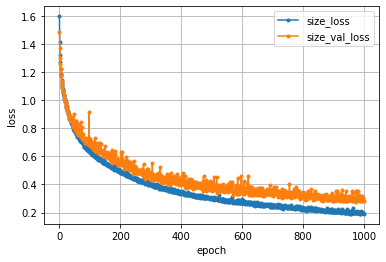

In [108]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

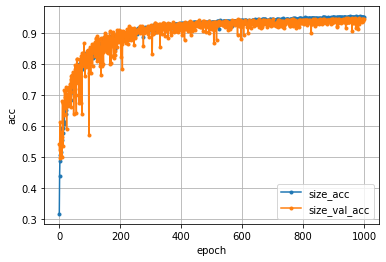

In [109]:
# 学習経過の可視化(大きさ)
size_acc     = size_history.history['accuracy']
size_val_acc = size_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [110]:
#大きさごとの推定精度の確認
size_predict = size_model.predict(size_x_test).argmax(axis=1)
size_answer = size_y_test.argmax(axis=1)
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if size_predict[i] == size_answer[i]:
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if size_predict[i] == size_answer[i]:
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if size_predict[i] == size_answer[i]:
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if size_predict[i] == size_answer[i]:
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if size_predict[i] == size_answer[i]:
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.982532751091703
大きさ2の正答率：0.9399038461538461
大きさ3の正答率：0.9143576826196473
大きさ4の正答率：0.9355608591885441
大きさ5の正答率：0.9525222551928784


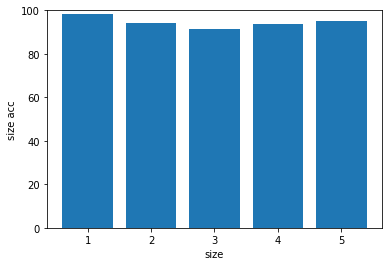

In [18]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([98.3,94.0,91.4,93.6,95.3])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=100, bottom=0)
plt.show()

In [4]:
# 学習(大きさ)
epochs = 4000
batch_size = 128
size_history = size_model.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/4000
8108/8108 [==============================] - 1s 119us/step - loss: 1.5599 - accuracy: 0.3310 - val_loss: 1.4812 - val_accuracy: 0.3774
Epoch 2/4000
8108/8108 [==============================] - 0s 26us/step - loss: 1.3979 - accuracy: 0.4386 - val_loss: 1.4180 - val_accuracy: 0.3897
Epoch 3/4000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3143 - accuracy: 0.4676 - val_loss: 1.3543 - val_accuracy: 0.5491
Epoch 4/4000
8108/8108 [==============================] - 0s 24us/step - loss: 1.2529 - accuracy: 0.4995 - val_loss: 1.3124 - val_accuracy: 0.5106
Epoch 5/4000
8108/8108 [==============================] - 0s 25us/step - loss: 1.2039 - accuracy: 0.5424 - val_loss: 1.2849 - val_accuracy: 0.5279
Epoch 6/4000
8108/8108 [==============================] - 0s 43us/step - loss: 1.1594 - accuracy: 0.5627 - val_loss: 1.2613 - val_accuracy: 0.5007
Epoch 7/4000
8108/8108 [==============================] - 0s 29us/ste

8108/8108 [==============================] - 0s 22us/step - loss: 0.5387 - accuracy: 0.8748 - val_loss: 0.5732 - val_accuracy: 0.8851
Epoch 57/4000
8108/8108 [==============================] - 0s 21us/step - loss: 0.5265 - accuracy: 0.8889 - val_loss: 0.5693 - val_accuracy: 0.8619
Epoch 58/4000
8108/8108 [==============================] - 0s 21us/step - loss: 0.5216 - accuracy: 0.8918 - val_loss: 0.5518 - val_accuracy: 0.8949
Epoch 59/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.5194 - accuracy: 0.8918 - val_loss: 0.5528 - val_accuracy: 0.9038
Epoch 60/4000
8108/8108 [==============================] - 0s 22us/step - loss: 0.5169 - accuracy: 0.8925 - val_loss: 0.5520 - val_accuracy: 0.8821
Epoch 61/4000
8108/8108 [==============================] - 0s 21us/step - loss: 0.5141 - accuracy: 0.8905 - val_loss: 0.5868 - val_accuracy: 0.8337
Epoch 62/4000
8108/8108 [==============================] - 0s 21us/step - loss: 0.5066 - accuracy: 0.8928 - val_loss: 0.5350 -

8108/8108 [==============================] - 0s 24us/step - loss: 0.2897 - accuracy: 0.9313 - val_loss: 0.3316 - val_accuracy: 0.9053
Epoch 167/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.2811 - accuracy: 0.9355 - val_loss: 0.3120 - val_accuracy: 0.9206
Epoch 168/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2866 - accuracy: 0.9317 - val_loss: 0.3075 - val_accuracy: 0.9270
Epoch 169/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2872 - accuracy: 0.9329 - val_loss: 0.3204 - val_accuracy: 0.9309
Epoch 170/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.2928 - accuracy: 0.9287 - val_loss: 0.3231 - val_accuracy: 0.9196
Epoch 171/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.2838 - accuracy: 0.9329 - val_loss: 0.3238 - val_accuracy: 0.9171
Epoch 172/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.2790 - accuracy: 0.9315 - val_loss: 0.

8108/8108 [==============================] - 0s 24us/step - loss: 0.2326 - accuracy: 0.9389 - val_loss: 0.2531 - val_accuracy: 0.9344
Epoch 222/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2394 - accuracy: 0.9401 - val_loss: 0.2424 - val_accuracy: 0.9329
Epoch 223/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2381 - accuracy: 0.9376 - val_loss: 0.2615 - val_accuracy: 0.9364
Epoch 224/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.2401 - accuracy: 0.9361 - val_loss: 0.2753 - val_accuracy: 0.9245
Epoch 225/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2421 - accuracy: 0.9393 - val_loss: 0.2417 - val_accuracy: 0.9354
Epoch 226/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2273 - accuracy: 0.9422 - val_loss: 0.2624 - val_accuracy: 0.9334
Epoch 227/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2278 - accuracy: 0.9404 - val_loss: 0.

8108/8108 [==============================] - 0s 24us/step - loss: 0.1988 - accuracy: 0.9471 - val_loss: 0.2413 - val_accuracy: 0.9299
Epoch 277/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.1990 - accuracy: 0.9467 - val_loss: 0.2227 - val_accuracy: 0.9359
Epoch 278/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1990 - accuracy: 0.9452 - val_loss: 0.2146 - val_accuracy: 0.9393
Epoch 279/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2035 - accuracy: 0.9454 - val_loss: 0.2130 - val_accuracy: 0.9388
Epoch 280/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.1988 - accuracy: 0.9468 - val_loss: 0.2349 - val_accuracy: 0.9324
Epoch 281/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.1989 - accuracy: 0.9462 - val_loss: 0.2135 - val_accuracy: 0.9393
Epoch 282/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2094 - accuracy: 0.9444 - val_loss: 0.

8108/8108 [==============================] - 0s 25us/step - loss: 0.1782 - accuracy: 0.9505 - val_loss: 0.1979 - val_accuracy: 0.9423
Epoch 332/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1825 - accuracy: 0.9491 - val_loss: 0.1973 - val_accuracy: 0.9418
Epoch 333/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.1866 - accuracy: 0.9457 - val_loss: 0.1890 - val_accuracy: 0.9452
Epoch 334/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1831 - accuracy: 0.9482 - val_loss: 0.1874 - val_accuracy: 0.9413
Epoch 335/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1849 - accuracy: 0.9472 - val_loss: 0.2240 - val_accuracy: 0.9359
Epoch 336/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1746 - accuracy: 0.9498 - val_loss: 0.1958 - val_accuracy: 0.9369
Epoch 337/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1825 - accuracy: 0.9493 - val_loss: 0.

8108/8108 [==============================] - 0s 32us/step - loss: 0.1605 - accuracy: 0.9537 - val_loss: 0.1835 - val_accuracy: 0.9423
Epoch 387/4000
8108/8108 [==============================] - 0s 38us/step - loss: 0.1643 - accuracy: 0.9515 - val_loss: 0.1759 - val_accuracy: 0.9447
Epoch 388/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.1599 - accuracy: 0.9514 - val_loss: 0.1792 - val_accuracy: 0.9472
Epoch 389/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.1581 - accuracy: 0.9551 - val_loss: 0.1767 - val_accuracy: 0.9492
Epoch 390/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.1544 - accuracy: 0.9540 - val_loss: 0.1636 - val_accuracy: 0.9502
Epoch 391/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.1542 - accuracy: 0.9556 - val_loss: 0.1717 - val_accuracy: 0.9487
Epoch 392/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.1542 - accuracy: 0.9554 - val_loss: 0.

8108/8108 [==============================] - 0s 25us/step - loss: 0.1409 - accuracy: 0.9573 - val_loss: 0.1725 - val_accuracy: 0.9447
Epoch 442/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1483 - accuracy: 0.9565 - val_loss: 0.1524 - val_accuracy: 0.9531
Epoch 443/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.1402 - accuracy: 0.9581 - val_loss: 0.1639 - val_accuracy: 0.9477
Epoch 444/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1444 - accuracy: 0.9592 - val_loss: 0.1681 - val_accuracy: 0.9492
Epoch 445/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.1511 - accuracy: 0.9555 - val_loss: 0.2013 - val_accuracy: 0.9433
Epoch 446/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.1454 - accuracy: 0.9568 - val_loss: 0.1620 - val_accuracy: 0.9507
Epoch 447/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.1402 - accuracy: 0.9604 - val_loss: 0.

8108/8108 [==============================] - 0s 26us/step - loss: 0.1398 - accuracy: 0.9591 - val_loss: 0.1645 - val_accuracy: 0.9502
Epoch 497/4000
8108/8108 [==============================] - 0s 40us/step - loss: 0.1318 - accuracy: 0.9619 - val_loss: 0.1418 - val_accuracy: 0.9546
Epoch 498/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1285 - accuracy: 0.9604 - val_loss: 0.1486 - val_accuracy: 0.9507
Epoch 499/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1309 - accuracy: 0.9613 - val_loss: 0.1430 - val_accuracy: 0.9551
Epoch 500/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1364 - accuracy: 0.9608 - val_loss: 0.1431 - val_accuracy: 0.9561
Epoch 501/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1296 - accuracy: 0.9618 - val_loss: 0.1439 - val_accuracy: 0.9551
Epoch 502/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1328 - accuracy: 0.9611 - val_loss: 0.

8108/8108 [==============================] - 0s 25us/step - loss: 0.1215 - accuracy: 0.9636 - val_loss: 0.1408 - val_accuracy: 0.9551
Epoch 552/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1241 - accuracy: 0.9620 - val_loss: 0.1374 - val_accuracy: 0.9546
Epoch 553/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.1170 - accuracy: 0.9648 - val_loss: 0.1674 - val_accuracy: 0.9472
Epoch 554/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.1172 - accuracy: 0.9647 - val_loss: 0.1435 - val_accuracy: 0.9556
Epoch 555/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.1168 - accuracy: 0.9631 - val_loss: 0.1623 - val_accuracy: 0.9497
Epoch 556/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.1210 - accuracy: 0.9625 - val_loss: 0.1421 - val_accuracy: 0.9526
Epoch 557/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.1201 - accuracy: 0.9642 - val_loss: 0.

8108/8108 [==============================] - 0s 23us/step - loss: 0.1115 - accuracy: 0.9665 - val_loss: 0.1317 - val_accuracy: 0.9591
Epoch 607/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.1108 - accuracy: 0.9655 - val_loss: 0.1332 - val_accuracy: 0.9576
Epoch 608/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.1187 - accuracy: 0.9648 - val_loss: 0.1283 - val_accuracy: 0.9595
Epoch 609/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.1044 - accuracy: 0.9694 - val_loss: 0.1370 - val_accuracy: 0.9591
Epoch 610/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.1121 - accuracy: 0.9644 - val_loss: 0.1302 - val_accuracy: 0.9595
Epoch 611/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.1160 - accuracy: 0.9644 - val_loss: 0.1500 - val_accuracy: 0.9497
Epoch 612/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.1134 - accuracy: 0.9639 - val_loss: 0.

8108/8108 [==============================] - 0s 23us/step - loss: 0.1114 - accuracy: 0.9657 - val_loss: 0.1468 - val_accuracy: 0.9546
Epoch 662/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.1099 - accuracy: 0.9658 - val_loss: 0.1480 - val_accuracy: 0.9536
Epoch 663/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.1038 - accuracy: 0.9672 - val_loss: 0.1468 - val_accuracy: 0.9546
Epoch 664/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.1005 - accuracy: 0.9700 - val_loss: 0.1460 - val_accuracy: 0.9571
Epoch 665/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.1092 - accuracy: 0.9674 - val_loss: 0.1324 - val_accuracy: 0.9605
Epoch 666/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.1086 - accuracy: 0.9673 - val_loss: 0.1188 - val_accuracy: 0.9625
Epoch 667/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0948 - accuracy: 0.9709 - val_loss: 0.

8108/8108 [==============================] - 0s 24us/step - loss: 0.0958 - accuracy: 0.9697 - val_loss: 0.1228 - val_accuracy: 0.9635
Epoch 717/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0983 - accuracy: 0.9711 - val_loss: 0.1238 - val_accuracy: 0.9605
Epoch 718/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0982 - accuracy: 0.9689 - val_loss: 0.1245 - val_accuracy: 0.9615
Epoch 719/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0932 - accuracy: 0.9721 - val_loss: 0.1238 - val_accuracy: 0.9605
Epoch 720/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0954 - accuracy: 0.9685 - val_loss: 0.1303 - val_accuracy: 0.9595
Epoch 721/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0954 - accuracy: 0.9706 - val_loss: 0.1350 - val_accuracy: 0.9605
Epoch 722/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0939 - accuracy: 0.9693 - val_loss: 0.

8108/8108 [==============================] - 0s 26us/step - loss: 0.0893 - accuracy: 0.9713 - val_loss: 0.1582 - val_accuracy: 0.9595
Epoch 772/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.0904 - accuracy: 0.9727 - val_loss: 0.1159 - val_accuracy: 0.9630
Epoch 773/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0879 - accuracy: 0.9730 - val_loss: 0.1370 - val_accuracy: 0.9536
Epoch 774/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.0903 - accuracy: 0.9709 - val_loss: 0.1236 - val_accuracy: 0.9576
Epoch 775/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0886 - accuracy: 0.9710 - val_loss: 0.1205 - val_accuracy: 0.9625
Epoch 776/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.0882 - accuracy: 0.9730 - val_loss: 0.1307 - val_accuracy: 0.9561
Epoch 777/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0900 - accuracy: 0.9729 - val_loss: 0.

8108/8108 [==============================] - 0s 28us/step - loss: 0.0899 - accuracy: 0.9725 - val_loss: 0.1145 - val_accuracy: 0.9615
Epoch 827/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.0804 - accuracy: 0.9766 - val_loss: 0.1286 - val_accuracy: 0.9610
Epoch 828/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.0873 - accuracy: 0.9741 - val_loss: 0.1070 - val_accuracy: 0.9635
Epoch 829/4000
8108/8108 [==============================] - 0s 34us/step - loss: 0.0794 - accuracy: 0.9742 - val_loss: 0.1091 - val_accuracy: 0.9630
Epoch 830/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.0787 - accuracy: 0.9746 - val_loss: 0.1260 - val_accuracy: 0.9650
Epoch 831/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.0857 - accuracy: 0.9734 - val_loss: 0.1111 - val_accuracy: 0.9669
Epoch 832/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0995 - accuracy: 0.9698 - val_loss: 0.

8108/8108 [==============================] - 0s 25us/step - loss: 0.0746 - accuracy: 0.9759 - val_loss: 0.0992 - val_accuracy: 0.9689
Epoch 882/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0746 - accuracy: 0.9758 - val_loss: 0.1054 - val_accuracy: 0.9694
Epoch 883/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0779 - accuracy: 0.9752 - val_loss: 0.1178 - val_accuracy: 0.9650
Epoch 884/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0749 - accuracy: 0.9772 - val_loss: 0.1000 - val_accuracy: 0.9655
Epoch 885/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0807 - accuracy: 0.9743 - val_loss: 0.1265 - val_accuracy: 0.9586
Epoch 886/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0788 - accuracy: 0.9740 - val_loss: 0.1121 - val_accuracy: 0.9655
Epoch 887/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0774 - accuracy: 0.9761 - val_loss: 0.

Epoch 936/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0750 - accuracy: 0.9778 - val_loss: 0.1179 - val_accuracy: 0.9650
Epoch 937/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0731 - accuracy: 0.9763 - val_loss: 0.0977 - val_accuracy: 0.9724
Epoch 938/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0722 - accuracy: 0.9767 - val_loss: 0.0985 - val_accuracy: 0.9679
Epoch 939/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0697 - accuracy: 0.9801 - val_loss: 0.1239 - val_accuracy: 0.9615
Epoch 940/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0750 - accuracy: 0.9782 - val_loss: 0.0973 - val_accuracy: 0.9660
Epoch 941/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0815 - accuracy: 0.9758 - val_loss: 0.1225 - val_accuracy: 0.9650
Epoch 942/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0777 - accuracy: 0.9762

Epoch 991/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.0689 - accuracy: 0.9783 - val_loss: 0.0902 - val_accuracy: 0.9714
Epoch 992/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.1097 - val_accuracy: 0.9655
Epoch 993/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0739 - accuracy: 0.9759 - val_loss: 0.1074 - val_accuracy: 0.9684
Epoch 994/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0683 - accuracy: 0.9777 - val_loss: 0.1351 - val_accuracy: 0.9556
Epoch 995/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0783 - accuracy: 0.9748 - val_loss: 0.1036 - val_accuracy: 0.9684
Epoch 996/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0679 - accuracy: 0.9799 - val_loss: 0.0911 - val_accuracy: 0.9704
Epoch 997/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0664 - accuracy: 0.9789

Epoch 1100/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0658 - accuracy: 0.9803 - val_loss: 0.1087 - val_accuracy: 0.9694
Epoch 1101/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0609 - accuracy: 0.9814 - val_loss: 0.0802 - val_accuracy: 0.9739
Epoch 1102/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0693 - accuracy: 0.9787 - val_loss: 0.0970 - val_accuracy: 0.9669
Epoch 1103/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0632 - accuracy: 0.9803 - val_loss: 0.0878 - val_accuracy: 0.9743
Epoch 1104/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0624 - accuracy: 0.9799 - val_loss: 0.0843 - val_accuracy: 0.9748
Epoch 1105/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0547 - accuracy: 0.9842 - val_loss: 0.0801 - val_accuracy: 0.9743
Epoch 1106/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0572 - accuracy:

Epoch 1209/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0660 - accuracy: 0.9803 - val_loss: 0.0982 - val_accuracy: 0.9669
Epoch 1210/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0528 - accuracy: 0.9846 - val_loss: 0.0874 - val_accuracy: 0.9768
Epoch 1211/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0547 - accuracy: 0.9829 - val_loss: 0.0823 - val_accuracy: 0.9704
Epoch 1212/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0643 - accuracy: 0.9793 - val_loss: 0.0775 - val_accuracy: 0.9763
Epoch 1213/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0526 - accuracy: 0.9837 - val_loss: 0.0830 - val_accuracy: 0.9763
Epoch 1214/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0551 - accuracy: 0.9836 - val_loss: 0.0881 - val_accuracy: 0.9739
Epoch 1215/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0520 - accuracy:

8108/8108 [==============================] - 0s 24us/step - loss: 0.0529 - accuracy: 0.9841 - val_loss: 0.0756 - val_accuracy: 0.9758
Epoch 1318/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.0511 - accuracy: 0.9833 - val_loss: 0.0737 - val_accuracy: 0.9793
Epoch 1319/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.0600 - accuracy: 0.9811 - val_loss: 0.0781 - val_accuracy: 0.9808
Epoch 1320/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.0602 - accuracy: 0.9804 - val_loss: 0.0764 - val_accuracy: 0.9768
Epoch 1321/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0495 - accuracy: 0.9851 - val_loss: 0.0839 - val_accuracy: 0.9724
Epoch 1322/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0890 - val_accuracy: 0.9729
Epoch 1323/4000
8108/8108 [==============================] - ETA: 0s - loss: 0.0515 - accuracy: 0.98 - 0s 25us/step 

Epoch 1426/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0550 - accuracy: 0.9848 - val_loss: 0.0764 - val_accuracy: 0.9763
Epoch 1427/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0448 - accuracy: 0.9875 - val_loss: 0.0657 - val_accuracy: 0.9788
Epoch 1428/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0436 - accuracy: 0.9873 - val_loss: 0.0793 - val_accuracy: 0.9743
Epoch 1429/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0516 - accuracy: 0.9853 - val_loss: 0.0715 - val_accuracy: 0.9788
Epoch 1430/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0616 - accuracy: 0.9841 - val_loss: 0.0706 - val_accuracy: 0.9763
Epoch 1431/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0454 - accuracy: 0.9862 - val_loss: 0.0761 - val_accuracy: 0.9739
Epoch 1432/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0437 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.0503 - accuracy: 0.9851 - val_loss: 0.1005 - val_accuracy: 0.9739
Epoch 1481/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0456 - accuracy: 0.9868 - val_loss: 0.0708 - val_accuracy: 0.9793
Epoch 1482/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0474 - accuracy: 0.9867 - val_loss: 0.0666 - val_accuracy: 0.9808
Epoch 1483/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0544 - accuracy: 0.9838 - val_loss: 0.0994 - val_accuracy: 0.9704
Epoch 1484/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0647 - val_accuracy: 0.9817
Epoch 1485/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0792 - val_accuracy: 0.9763
Epoch 1486/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0455 - accuracy: 0.9864 - val_lo

Epoch 1535/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0604 - val_accuracy: 0.9827
Epoch 1536/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0506 - accuracy: 0.9848 - val_loss: 0.0705 - val_accuracy: 0.9783
Epoch 1537/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.0758 - val_accuracy: 0.9773
Epoch 1538/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0478 - accuracy: 0.9859 - val_loss: 0.0601 - val_accuracy: 0.9827
Epoch 1539/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0489 - accuracy: 0.9858 - val_loss: 0.0828 - val_accuracy: 0.9773
Epoch 1540/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0551 - accuracy: 0.9838 - val_loss: 0.0738 - val_accuracy: 0.9808
Epoch 1541/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0515 - accuracy:

Epoch 1644/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.0647 - val_accuracy: 0.9813
Epoch 1645/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.0428 - accuracy: 0.9878 - val_loss: 0.0736 - val_accuracy: 0.9813
Epoch 1646/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0429 - accuracy: 0.9862 - val_loss: 0.0652 - val_accuracy: 0.9808
Epoch 1647/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0561 - val_accuracy: 0.9847
Epoch 1648/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0363 - accuracy: 0.9900 - val_loss: 0.0644 - val_accuracy: 0.9803
Epoch 1649/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.0375 - accuracy: 0.9891 - val_loss: 0.0665 - val_accuracy: 0.9808
Epoch 1650/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0385 - accuracy:

Epoch 1753/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0342 - accuracy: 0.9904 - val_loss: 0.0630 - val_accuracy: 0.9803
Epoch 1754/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0418 - accuracy: 0.9873 - val_loss: 0.0836 - val_accuracy: 0.9739
Epoch 1755/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0438 - accuracy: 0.9868 - val_loss: 0.0601 - val_accuracy: 0.9822
Epoch 1756/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.0497 - accuracy: 0.9843 - val_loss: 0.0567 - val_accuracy: 0.9852
Epoch 1757/4000
8108/8108 [==============================] - 0s 34us/step - loss: 0.0375 - accuracy: 0.9894 - val_loss: 0.0669 - val_accuracy: 0.9813
Epoch 1758/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.0330 - accuracy: 0.9920 - val_loss: 0.0556 - val_accuracy: 0.9832
Epoch 1759/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0340 - accuracy:

Epoch 1862/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0326 - accuracy: 0.9909 - val_loss: 0.0600 - val_accuracy: 0.9817
Epoch 1863/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0365 - accuracy: 0.9896 - val_loss: 0.0581 - val_accuracy: 0.9847
Epoch 1864/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0329 - accuracy: 0.9907 - val_loss: 0.0597 - val_accuracy: 0.9817
Epoch 1865/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0351 - accuracy: 0.9909 - val_loss: 0.0540 - val_accuracy: 0.9837
Epoch 1866/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0297 - accuracy: 0.9915 - val_loss: 0.0572 - val_accuracy: 0.9852
Epoch 1867/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0355 - accuracy: 0.9896 - val_loss: 0.0653 - val_accuracy: 0.9817
Epoch 1868/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0320 - accuracy:

Epoch 1971/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0282 - accuracy: 0.9924 - val_loss: 0.1128 - val_accuracy: 0.9753
Epoch 1972/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0447 - accuracy: 0.9853 - val_loss: 0.0695 - val_accuracy: 0.9788
Epoch 1973/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0389 - accuracy: 0.9889 - val_loss: 0.0645 - val_accuracy: 0.9837
Epoch 1974/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0401 - accuracy: 0.9878 - val_loss: 0.0620 - val_accuracy: 0.9852
Epoch 1975/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0300 - accuracy: 0.9914 - val_loss: 0.0696 - val_accuracy: 0.9822
Epoch 1976/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0440 - accuracy: 0.9868 - val_loss: 0.0647 - val_accuracy: 0.9822
Epoch 1977/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0324 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.0265 - accuracy: 0.9922 - val_loss: 0.0626 - val_accuracy: 0.9872
Epoch 2080/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.0545 - val_accuracy: 0.9862
Epoch 2081/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0287 - accuracy: 0.9927 - val_loss: 0.0610 - val_accuracy: 0.9852
Epoch 2082/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0581 - val_accuracy: 0.9852
Epoch 2083/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0287 - accuracy: 0.9935 - val_loss: 0.0543 - val_accuracy: 0.9847
Epoch 2084/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0331 - accuracy: 0.9904 - val_loss: 0.0643 - val_accuracy: 0.9852
Epoch 2085/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0280 - accuracy: 0.9917 - val_lo

Epoch 2188/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0247 - accuracy: 0.9938 - val_loss: 0.0575 - val_accuracy: 0.9877
Epoch 2189/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0260 - accuracy: 0.9936 - val_loss: 0.0564 - val_accuracy: 0.9857
Epoch 2190/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0338 - accuracy: 0.9904 - val_loss: 0.0695 - val_accuracy: 0.9852
Epoch 2191/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0260 - accuracy: 0.9932 - val_loss: 0.0543 - val_accuracy: 0.9872
Epoch 2192/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0254 - accuracy: 0.9931 - val_loss: 0.0595 - val_accuracy: 0.9857
Epoch 2193/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0361 - accuracy: 0.9899 - val_loss: 0.0614 - val_accuracy: 0.9852
Epoch 2194/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0326 - accuracy:

Epoch 2297/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0235 - accuracy: 0.9937 - val_loss: 0.0576 - val_accuracy: 0.9857
Epoch 2298/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0271 - accuracy: 0.9926 - val_loss: 0.0560 - val_accuracy: 0.9862
Epoch 2299/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0303 - accuracy: 0.9914 - val_loss: 0.0622 - val_accuracy: 0.9847
Epoch 2300/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0369 - accuracy: 0.9878 - val_loss: 0.0624 - val_accuracy: 0.9842
Epoch 2301/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0297 - accuracy: 0.9922 - val_loss: 0.0635 - val_accuracy: 0.9862
Epoch 2302/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0259 - accuracy: 0.9924 - val_loss: 0.0576 - val_accuracy: 0.9857
Epoch 2303/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0217 - accuracy:

Epoch 2406/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0198 - accuracy: 0.9953 - val_loss: 0.0590 - val_accuracy: 0.9867
Epoch 2407/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0252 - accuracy: 0.9933 - val_loss: 0.0659 - val_accuracy: 0.9842
Epoch 2408/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0229 - accuracy: 0.9940 - val_loss: 0.0704 - val_accuracy: 0.9837
Epoch 2409/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0224 - accuracy: 0.9938 - val_loss: 0.0703 - val_accuracy: 0.9813
Epoch 2410/4000
8108/8108 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.99 - 0s 25us/step - loss: 0.0236 - accuracy: 0.9937 - val_loss: 0.0747 - val_accuracy: 0.9827
Epoch 2411/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0218 - accuracy: 0.9946 - val_loss: 0.0605 - val_accuracy: 0.9857
Epoch 2412/4000
8108/8108 [==============================]

Epoch 2515/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0239 - accuracy: 0.9932 - val_loss: 0.0629 - val_accuracy: 0.9862
Epoch 2516/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0236 - accuracy: 0.9935 - val_loss: 0.0563 - val_accuracy: 0.9867
Epoch 2517/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0189 - accuracy: 0.9948 - val_loss: 0.0616 - val_accuracy: 0.9857
Epoch 2518/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0197 - accuracy: 0.9943 - val_loss: 0.0716 - val_accuracy: 0.9837
Epoch 2519/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0217 - accuracy: 0.9938 - val_loss: 0.0673 - val_accuracy: 0.9852
Epoch 2520/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0219 - accuracy: 0.9946 - val_loss: 0.0584 - val_accuracy: 0.9882
Epoch 2521/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0211 - accuracy:

Epoch 2624/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.0201 - accuracy: 0.9942 - val_loss: 0.0568 - val_accuracy: 0.9882
Epoch 2625/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.0169 - accuracy: 0.9953 - val_loss: 0.0589 - val_accuracy: 0.9857
Epoch 2626/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.0170 - accuracy: 0.9962 - val_loss: 0.0661 - val_accuracy: 0.9857
Epoch 2627/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0215 - accuracy: 0.9942 - val_loss: 0.0733 - val_accuracy: 0.9842
Epoch 2628/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.0318 - accuracy: 0.9907 - val_loss: 0.0692 - val_accuracy: 0.9857
Epoch 2629/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0185 - accuracy: 0.9949 - val_loss: 0.0608 - val_accuracy: 0.9867
Epoch 2630/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.0188 - accuracy:

Epoch 2733/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0167 - accuracy: 0.9952 - val_loss: 0.0802 - val_accuracy: 0.9857
Epoch 2734/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0168 - accuracy: 0.9961 - val_loss: 0.0646 - val_accuracy: 0.9872
Epoch 2735/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0183 - accuracy: 0.9952 - val_loss: 0.0765 - val_accuracy: 0.9847
Epoch 2736/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0190 - accuracy: 0.9947 - val_loss: 0.0619 - val_accuracy: 0.9896
Epoch 2737/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0164 - accuracy: 0.9956 - val_loss: 0.0677 - val_accuracy: 0.9862
Epoch 2738/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0194 - accuracy: 0.9947 - val_loss: 0.0790 - val_accuracy: 0.9842
Epoch 2739/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0183 - accuracy:

Epoch 2842/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0159 - accuracy: 0.9958 - val_loss: 0.0644 - val_accuracy: 0.9872
Epoch 2843/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0210 - accuracy: 0.9940 - val_loss: 0.0651 - val_accuracy: 0.9872
Epoch 2844/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0192 - accuracy: 0.9952 - val_loss: 0.0755 - val_accuracy: 0.9852
Epoch 2845/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0620 - val_accuracy: 0.9867
Epoch 2846/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0167 - accuracy: 0.9957 - val_loss: 0.0648 - val_accuracy: 0.9857
Epoch 2847/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0217 - accuracy: 0.9937 - val_loss: 0.0745 - val_accuracy: 0.9847
Epoch 2848/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0171 - accuracy:

Epoch 2951/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0153 - accuracy: 0.9961 - val_loss: 0.0746 - val_accuracy: 0.9862
Epoch 2952/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0153 - accuracy: 0.9967 - val_loss: 0.0735 - val_accuracy: 0.9882
Epoch 2953/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0164 - accuracy: 0.9953 - val_loss: 0.0744 - val_accuracy: 0.9862
Epoch 2954/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0164 - accuracy: 0.9961 - val_loss: 0.0717 - val_accuracy: 0.9862
Epoch 2955/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0175 - accuracy: 0.9954 - val_loss: 0.0728 - val_accuracy: 0.9877
Epoch 2956/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0292 - accuracy: 0.9927 - val_loss: 0.0902 - val_accuracy: 0.9827
Epoch 2957/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0186 - accuracy:

Epoch 3060/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0205 - accuracy: 0.9942 - val_loss: 0.0840 - val_accuracy: 0.9862
Epoch 3061/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0153 - accuracy: 0.9958 - val_loss: 0.0778 - val_accuracy: 0.9887
Epoch 3062/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0131 - accuracy: 0.9973 - val_loss: 0.0858 - val_accuracy: 0.9852
Epoch 3063/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0167 - accuracy: 0.9956 - val_loss: 0.0825 - val_accuracy: 0.9877
Epoch 3064/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.0166 - accuracy: 0.9953 - val_loss: 0.1109 - val_accuracy: 0.9743
Epoch 3065/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.0828 - val_accuracy: 0.9862
Epoch 3066/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0176 - accuracy:

Epoch 3169/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0199 - accuracy: 0.9942 - val_loss: 0.0987 - val_accuracy: 0.9842
Epoch 3170/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0125 - accuracy: 0.9973 - val_loss: 0.0889 - val_accuracy: 0.9877
Epoch 3171/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0134 - accuracy: 0.9965 - val_loss: 0.0855 - val_accuracy: 0.9882
Epoch 3172/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0137 - accuracy: 0.9969 - val_loss: 0.0881 - val_accuracy: 0.9887
Epoch 3173/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.0800 - val_accuracy: 0.9857
Epoch 3174/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.0834 - val_accuracy: 0.9867
Epoch 3175/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0133 - accuracy:

Epoch 3278/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.0167 - accuracy: 0.9957 - val_loss: 0.0912 - val_accuracy: 0.9872
Epoch 3279/4000
8108/8108 [==============================] - 0s 40us/step - loss: 0.0145 - accuracy: 0.9961 - val_loss: 0.0965 - val_accuracy: 0.9862
Epoch 3280/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.1035 - val_accuracy: 0.9857
Epoch 3281/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0131 - accuracy: 0.9964 - val_loss: 0.0880 - val_accuracy: 0.9882
Epoch 3282/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.0905 - val_accuracy: 0.9887
Epoch 3283/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0126 - accuracy: 0.9963 - val_loss: 0.0907 - val_accuracy: 0.9877
Epoch 3284/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0168 - accuracy:

8108/8108 [==============================] - 0s 26us/step - loss: 0.0171 - accuracy: 0.9962 - val_loss: 0.0990 - val_accuracy: 0.9852
Epoch 3387/4000
8108/8108 [==============================] - 0s 43us/step - loss: 0.0144 - accuracy: 0.9965 - val_loss: 0.0902 - val_accuracy: 0.9882
Epoch 3388/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.0130 - accuracy: 0.9970 - val_loss: 0.0870 - val_accuracy: 0.9867
Epoch 3389/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.1012 - val_accuracy: 0.9842
Epoch 3390/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0163 - accuracy: 0.9961 - val_loss: 0.0985 - val_accuracy: 0.9877
Epoch 3391/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0179 - accuracy: 0.9952 - val_loss: 0.0965 - val_accuracy: 0.9862
Epoch 3392/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0161 - accuracy: 0.9958 - val_lo

Epoch 3441/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0148 - accuracy: 0.9959 - val_loss: 0.0927 - val_accuracy: 0.9887
Epoch 3442/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.1010 - val_accuracy: 0.9862
Epoch 3443/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0117 - accuracy: 0.9972 - val_loss: 0.0947 - val_accuracy: 0.9852
Epoch 3444/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0127 - accuracy: 0.9967 - val_loss: 0.0908 - val_accuracy: 0.9887
Epoch 3445/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0125 - accuracy: 0.9974 - val_loss: 0.0922 - val_accuracy: 0.9872
Epoch 3446/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0131 - accuracy: 0.9965 - val_loss: 0.0976 - val_accuracy: 0.9877
Epoch 3447/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0222 - accuracy:

Epoch 3550/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.0152 - accuracy: 0.9957 - val_loss: 0.1067 - val_accuracy: 0.9832
Epoch 3551/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.0124 - accuracy: 0.9965 - val_loss: 0.1116 - val_accuracy: 0.9867
Epoch 3552/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0205 - accuracy: 0.9949 - val_loss: 0.0981 - val_accuracy: 0.9872
Epoch 3553/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0192 - accuracy: 0.9948 - val_loss: 0.0949 - val_accuracy: 0.9887
Epoch 3554/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0157 - accuracy: 0.9956 - val_loss: 0.1045 - val_accuracy: 0.9867
Epoch 3555/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0126 - accuracy: 0.9972 - val_loss: 0.1044 - val_accuracy: 0.9852
Epoch 3556/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0102 - accuracy:

Epoch 3659/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0121 - accuracy: 0.9975 - val_loss: 0.1129 - val_accuracy: 0.9862
Epoch 3660/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0150 - accuracy: 0.9958 - val_loss: 0.1150 - val_accuracy: 0.9877
Epoch 3661/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.0112 - accuracy: 0.9972 - val_loss: 0.1117 - val_accuracy: 0.9862
Epoch 3662/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0125 - accuracy: 0.9973 - val_loss: 0.1085 - val_accuracy: 0.9872
Epoch 3663/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.0097 - accuracy: 0.9980 - val_loss: 0.1104 - val_accuracy: 0.9872
Epoch 3664/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.0126 - accuracy: 0.9964 - val_loss: 0.1099 - val_accuracy: 0.9882
Epoch 3665/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.0183 - accuracy:

Epoch 3768/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0100 - accuracy: 0.9978 - val_loss: 0.0964 - val_accuracy: 0.9877
Epoch 3769/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0103 - accuracy: 0.9975 - val_loss: 0.0955 - val_accuracy: 0.9877
Epoch 3770/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0102 - accuracy: 0.9977 - val_loss: 0.1076 - val_accuracy: 0.9867
Epoch 3771/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0140 - accuracy: 0.9964 - val_loss: 0.1001 - val_accuracy: 0.9882
Epoch 3772/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0116 - accuracy: 0.9972 - val_loss: 0.0931 - val_accuracy: 0.9882
Epoch 3773/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.1083 - val_accuracy: 0.9867
Epoch 3774/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0136 - accuracy:

Epoch 3877/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0137 - accuracy: 0.9963 - val_loss: 0.1177 - val_accuracy: 0.9872
Epoch 3878/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0147 - accuracy: 0.9965 - val_loss: 0.1098 - val_accuracy: 0.9872
Epoch 3879/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0123 - accuracy: 0.9968 - val_loss: 0.1074 - val_accuracy: 0.9887
Epoch 3880/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0113 - accuracy: 0.9973 - val_loss: 0.1082 - val_accuracy: 0.9857
Epoch 3881/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.0091 - accuracy: 0.9983 - val_loss: 0.1160 - val_accuracy: 0.9867
Epoch 3882/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0106 - accuracy: 0.9975 - val_loss: 0.1175 - val_accuracy: 0.9847
Epoch 3883/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0103 - accuracy:

Epoch 3986/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.0118 - accuracy: 0.9970 - val_loss: 0.1138 - val_accuracy: 0.9872
Epoch 3987/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.0119 - accuracy: 0.9967 - val_loss: 0.1032 - val_accuracy: 0.9867
Epoch 3988/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0110 - accuracy: 0.9970 - val_loss: 0.1157 - val_accuracy: 0.9887
Epoch 3989/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.1168 - val_accuracy: 0.9847
Epoch 3990/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.0104 - accuracy: 0.9979 - val_loss: 0.1187 - val_accuracy: 0.9867
Epoch 3991/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.1159 - val_accuracy: 0.9877
Epoch 3992/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.0118 - accuracy:

In [5]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(size_x_test, size_y_test, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

2027/2027 [==============================] - 0s 35us/step
Test loss: 0.11660346581426184
Test accuracy: 0.984706461429596


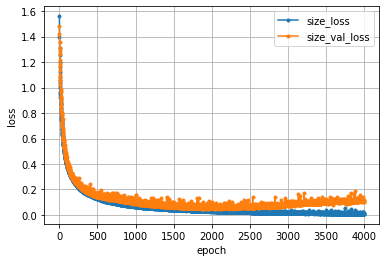

In [6]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

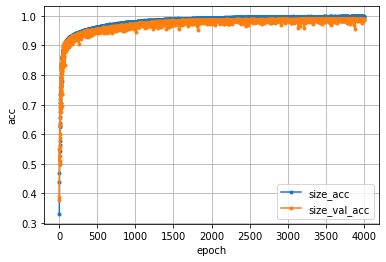

In [7]:
# 学習経過の可視化(大きさ)
size_acc     = size_history.history['accuracy']
size_val_acc = size_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [8]:
#大きさごとの推定精度の確認
size_predict = size_model.predict(size_x_test).argmax(axis=1)
size_answer = size_y_test.argmax(axis=1)
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if size_predict[i] == size_answer[i]:
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if size_predict[i] == size_answer[i]:
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if size_predict[i] == size_answer[i]:
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if size_predict[i] == size_answer[i]:
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if size_predict[i] == size_answer[i]:
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.988558352402746
大きさ2の正答率：0.9928057553956835
大きさ3の正答率：0.9776119402985075
大きさ4の正答率：0.9753086419753086
大きさ5の正答率：0.9890710382513661


In [4]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(25, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [10]:
# 学習(位置)
epochs = 8000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/8000
8108/8108 [==============================] - 0s 47us/step - loss: 3.1178 - accuracy: 0.0850 - val_loss: 3.0057 - val_accuracy: 0.1273
Epoch 2/8000
8108/8108 [==============================] - 0s 29us/step - loss: 2.9924 - accuracy: 0.1283 - val_loss: 2.9215 - val_accuracy: 0.1480
Epoch 3/8000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9045 - accuracy: 0.1574 - val_loss: 2.8266 - val_accuracy: 0.1653
Epoch 4/8000
8108/8108 [==============================] - 0s 29us/step - loss: 2.8391 - accuracy: 0.1666 - val_loss: 2.7804 - val_accuracy: 0.1539
Epoch 5/8000
8108/8108 [==============================] - 0s 29us/step - loss: 2.7804 - accuracy: 0.1838 - val_loss: 2.7172 - val_accuracy: 0.1870
Epoch 6/8000
8108/8108 [==============================] - 0s 30us/step - loss: 2.7313 - accuracy: 0.2000 - val_loss: 2.6744 - val_accuracy: 0.2210
Epoch 7/8000
8108/8108 [==============================] - 0s 30us/step

Epoch 56/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.9975 - accuracy: 0.3853 - val_loss: 1.9741 - val_accuracy: 0.3947
Epoch 57/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.9924 - accuracy: 0.3873 - val_loss: 1.9754 - val_accuracy: 0.3631
Epoch 58/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.9867 - accuracy: 0.3902 - val_loss: 1.9535 - val_accuracy: 0.3952
Epoch 59/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.9887 - accuracy: 0.3939 - val_loss: 1.9298 - val_accuracy: 0.3971
Epoch 60/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.9832 - accuracy: 0.4008 - val_loss: 1.9712 - val_accuracy: 0.3883
Epoch 61/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.9857 - accuracy: 0.3913 - val_loss: 1.9936 - val_accuracy: 0.3636
Epoch 62/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.9843 - accuracy: 0.3891 - val_

8108/8108 [==============================] - 0s 28us/step - loss: 1.7325 - accuracy: 0.4640 - val_loss: 1.7227 - val_accuracy: 0.4667
Epoch 167/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.7341 - accuracy: 0.4499 - val_loss: 1.7087 - val_accuracy: 0.4480
Epoch 168/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.6980 - accuracy: 0.4632 - val_loss: 1.7465 - val_accuracy: 0.4262
Epoch 169/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.7251 - accuracy: 0.4529 - val_loss: 1.6617 - val_accuracy: 0.4578
Epoch 170/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.6943 - accuracy: 0.4666 - val_loss: 1.7055 - val_accuracy: 0.4558
Epoch 171/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.7097 - accuracy: 0.4525 - val_loss: 1.6824 - val_accuracy: 0.4351
Epoch 172/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.7030 - accuracy: 0.4537 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.6426 - accuracy: 0.4674 - val_loss: 1.6583 - val_accuracy: 0.4588
Epoch 222/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6752 - accuracy: 0.4599 - val_loss: 1.5917 - val_accuracy: 0.5086
Epoch 223/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.6564 - accuracy: 0.4721 - val_loss: 1.6379 - val_accuracy: 0.4450
Epoch 224/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.6337 - accuracy: 0.4716 - val_loss: 1.6377 - val_accuracy: 0.4771
Epoch 225/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6310 - accuracy: 0.4811 - val_loss: 1.6664 - val_accuracy: 0.4529
Epoch 226/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6526 - accuracy: 0.4640 - val_loss: 1.5751 - val_accuracy: 0.5313
Epoch 227/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.6328 - accuracy: 0.4709 - val_loss: 1.

8108/8108 [==============================] - 0s 37us/step - loss: 1.6129 - accuracy: 0.4652 - val_loss: 1.5383 - val_accuracy: 0.4938
Epoch 277/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5575 - accuracy: 0.4940 - val_loss: 1.5849 - val_accuracy: 0.4874
Epoch 278/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5968 - accuracy: 0.4798 - val_loss: 1.5434 - val_accuracy: 0.5131
Epoch 279/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5805 - accuracy: 0.4920 - val_loss: 1.5262 - val_accuracy: 0.5175
Epoch 280/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5788 - accuracy: 0.4883 - val_loss: 1.5662 - val_accuracy: 0.4938
Epoch 281/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.5821 - accuracy: 0.4831 - val_loss: 1.6176 - val_accuracy: 0.4351
Epoch 282/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.5807 - accuracy: 0.4820 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.5416 - accuracy: 0.4872 - val_loss: 1.5217 - val_accuracy: 0.4869
Epoch 332/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5252 - accuracy: 0.5006 - val_loss: 1.5024 - val_accuracy: 0.5096
Epoch 333/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5181 - accuracy: 0.5059 - val_loss: 1.4865 - val_accuracy: 0.5259
Epoch 334/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5178 - accuracy: 0.5000 - val_loss: 1.5484 - val_accuracy: 0.4993
Epoch 335/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.5153 - accuracy: 0.5015 - val_loss: 1.4872 - val_accuracy: 0.5259
Epoch 336/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5332 - accuracy: 0.4932 - val_loss: 1.5088 - val_accuracy: 0.4983
Epoch 337/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5264 - accuracy: 0.4989 - val_loss: 1.

8108/8108 [==============================] - 0s 33us/step - loss: 1.5081 - accuracy: 0.4954 - val_loss: 1.5122 - val_accuracy: 0.5052
Epoch 387/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.5233 - accuracy: 0.4884 - val_loss: 1.5180 - val_accuracy: 0.4835
Epoch 388/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5009 - accuracy: 0.4996 - val_loss: 1.4767 - val_accuracy: 0.4998
Epoch 389/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4751 - accuracy: 0.5100 - val_loss: 1.4837 - val_accuracy: 0.5220
Epoch 390/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5000 - accuracy: 0.4969 - val_loss: 1.5141 - val_accuracy: 0.5007
Epoch 391/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4817 - accuracy: 0.5047 - val_loss: 1.4534 - val_accuracy: 0.5012
Epoch 392/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4968 - accuracy: 0.4991 - val_loss: 1.

8108/8108 [==============================] - 0s 34us/step - loss: 1.4440 - accuracy: 0.5152 - val_loss: 1.4730 - val_accuracy: 0.4978
Epoch 442/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.4613 - accuracy: 0.5110 - val_loss: 1.4546 - val_accuracy: 0.5318
Epoch 443/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4539 - accuracy: 0.5160 - val_loss: 1.4401 - val_accuracy: 0.5180
Epoch 444/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.4660 - accuracy: 0.5064 - val_loss: 1.4178 - val_accuracy: 0.5422
Epoch 445/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4585 - accuracy: 0.5048 - val_loss: 1.4230 - val_accuracy: 0.5363
Epoch 446/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.4516 - accuracy: 0.5204 - val_loss: 1.4783 - val_accuracy: 0.4795
Epoch 447/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.4635 - accuracy: 0.5090 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.4065 - accuracy: 0.5284 - val_loss: 1.4538 - val_accuracy: 0.5190
Epoch 497/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4205 - accuracy: 0.5201 - val_loss: 1.4104 - val_accuracy: 0.5101
Epoch 498/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4094 - accuracy: 0.5348 - val_loss: 1.4255 - val_accuracy: 0.5195
Epoch 499/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4268 - accuracy: 0.5213 - val_loss: 1.4700 - val_accuracy: 0.5353
Epoch 500/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4328 - accuracy: 0.5179 - val_loss: 1.4437 - val_accuracy: 0.5002
Epoch 501/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4317 - accuracy: 0.5175 - val_loss: 1.4148 - val_accuracy: 0.5298
Epoch 502/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4207 - accuracy: 0.5191 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.3837 - accuracy: 0.5409 - val_loss: 1.4460 - val_accuracy: 0.5254
Epoch 552/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3956 - accuracy: 0.5323 - val_loss: 1.3944 - val_accuracy: 0.5604
Epoch 553/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3848 - accuracy: 0.5398 - val_loss: 1.3426 - val_accuracy: 0.5678
Epoch 554/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3847 - accuracy: 0.5269 - val_loss: 1.3741 - val_accuracy: 0.5328
Epoch 555/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3929 - accuracy: 0.5315 - val_loss: 1.4082 - val_accuracy: 0.5269
Epoch 556/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.4148 - accuracy: 0.5169 - val_loss: 1.4034 - val_accuracy: 0.5205
Epoch 557/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.3794 - accuracy: 0.5295 - val_loss: 1.

8108/8108 [==============================] - 0s 37us/step - loss: 1.3619 - accuracy: 0.5339 - val_loss: 1.4209 - val_accuracy: 0.5047
Epoch 607/8000
8108/8108 [==============================] - 0s 43us/step - loss: 1.3793 - accuracy: 0.5417 - val_loss: 1.4156 - val_accuracy: 0.5432
Epoch 608/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.3760 - accuracy: 0.5374 - val_loss: 1.3458 - val_accuracy: 0.5442
Epoch 609/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.3807 - accuracy: 0.5385 - val_loss: 1.3983 - val_accuracy: 0.5560
Epoch 610/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3678 - accuracy: 0.5292 - val_loss: 1.3710 - val_accuracy: 0.5136
Epoch 611/8000
8108/8108 [==============================] - 0s 40us/step - loss: 1.3452 - accuracy: 0.5439 - val_loss: 1.3500 - val_accuracy: 0.5476
Epoch 612/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3713 - accuracy: 0.5270 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.3694 - accuracy: 0.5287 - val_loss: 1.3386 - val_accuracy: 0.5550
Epoch 662/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3373 - accuracy: 0.5446 - val_loss: 1.3019 - val_accuracy: 0.5688
Epoch 663/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3485 - accuracy: 0.5438 - val_loss: 1.3406 - val_accuracy: 0.5382
Epoch 664/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3685 - accuracy: 0.5257 - val_loss: 1.4099 - val_accuracy: 0.5022
Epoch 665/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3525 - accuracy: 0.5386 - val_loss: 1.3391 - val_accuracy: 0.5599
Epoch 666/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3439 - accuracy: 0.5455 - val_loss: 1.3611 - val_accuracy: 0.5525
Epoch 667/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3346 - accuracy: 0.5459 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.3311 - accuracy: 0.5416 - val_loss: 1.3111 - val_accuracy: 0.5580
Epoch 717/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3469 - accuracy: 0.5421 - val_loss: 1.3990 - val_accuracy: 0.5146
Epoch 718/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3174 - accuracy: 0.5476 - val_loss: 1.3596 - val_accuracy: 0.5200
Epoch 719/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3170 - accuracy: 0.5429 - val_loss: 1.2933 - val_accuracy: 0.5619
Epoch 720/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3131 - accuracy: 0.5583 - val_loss: 1.3027 - val_accuracy: 0.5604
Epoch 721/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3101 - accuracy: 0.5541 - val_loss: 1.3177 - val_accuracy: 0.5427
Epoch 722/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3427 - accuracy: 0.5329 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.3017 - accuracy: 0.5532 - val_loss: 1.3391 - val_accuracy: 0.5501
Epoch 772/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2949 - accuracy: 0.5527 - val_loss: 1.2957 - val_accuracy: 0.5516
Epoch 773/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3226 - accuracy: 0.5424 - val_loss: 1.3130 - val_accuracy: 0.5530
Epoch 774/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3104 - accuracy: 0.5470 - val_loss: 1.3465 - val_accuracy: 0.5274
Epoch 775/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2888 - accuracy: 0.5577 - val_loss: 1.3142 - val_accuracy: 0.5289
Epoch 776/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3015 - accuracy: 0.5512 - val_loss: 1.2703 - val_accuracy: 0.5511
Epoch 777/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3174 - accuracy: 0.5565 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.3026 - accuracy: 0.5582 - val_loss: 1.3207 - val_accuracy: 0.5525
Epoch 827/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3043 - accuracy: 0.5475 - val_loss: 1.3344 - val_accuracy: 0.5570
Epoch 828/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3084 - accuracy: 0.5434 - val_loss: 1.2727 - val_accuracy: 0.5585
Epoch 829/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2959 - accuracy: 0.5496 - val_loss: 1.3212 - val_accuracy: 0.5318
Epoch 830/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2828 - accuracy: 0.5555 - val_loss: 1.3069 - val_accuracy: 0.5442
Epoch 831/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2732 - accuracy: 0.5585 - val_loss: 1.3826 - val_accuracy: 0.5136
Epoch 832/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2961 - accuracy: 0.5528 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.2689 - accuracy: 0.5652 - val_loss: 1.2937 - val_accuracy: 0.5718
Epoch 882/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2511 - accuracy: 0.5657 - val_loss: 1.2223 - val_accuracy: 0.5826
Epoch 883/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2666 - accuracy: 0.5577 - val_loss: 1.2772 - val_accuracy: 0.5861
Epoch 884/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2902 - accuracy: 0.5493 - val_loss: 1.3241 - val_accuracy: 0.5146
Epoch 885/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2897 - accuracy: 0.5525 - val_loss: 1.2458 - val_accuracy: 0.5733
Epoch 886/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2674 - accuracy: 0.5659 - val_loss: 1.3134 - val_accuracy: 0.5333
Epoch 887/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2852 - accuracy: 0.5535 - val_loss: 1.

8108/8108 [==============================] - 0s 28us/step - loss: 1.2565 - accuracy: 0.5693 - val_loss: 1.3191 - val_accuracy: 0.5234
Epoch 937/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2826 - accuracy: 0.5545 - val_loss: 1.2344 - val_accuracy: 0.5797
Epoch 938/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2475 - accuracy: 0.5683 - val_loss: 1.2566 - val_accuracy: 0.5678
Epoch 939/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2447 - accuracy: 0.5696 - val_loss: 1.2020 - val_accuracy: 0.6058
Epoch 940/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2471 - accuracy: 0.5703 - val_loss: 1.2458 - val_accuracy: 0.5742
Epoch 941/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2482 - accuracy: 0.5662 - val_loss: 1.2287 - val_accuracy: 0.5713
Epoch 942/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2856 - accuracy: 0.5446 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.2357 - accuracy: 0.5783 - val_loss: 1.2672 - val_accuracy: 0.5397
Epoch 992/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2434 - accuracy: 0.5582 - val_loss: 1.3094 - val_accuracy: 0.5422
Epoch 993/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2414 - accuracy: 0.5654 - val_loss: 1.2186 - val_accuracy: 0.5900
Epoch 994/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2249 - accuracy: 0.5784 - val_loss: 1.2738 - val_accuracy: 0.5506
Epoch 995/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2462 - accuracy: 0.5608 - val_loss: 1.2468 - val_accuracy: 0.5594
Epoch 996/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2395 - accuracy: 0.5696 - val_loss: 1.2432 - val_accuracy: 0.5757
Epoch 997/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2308 - accuracy: 0.5682 - val_loss: 1.

Epoch 1046/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2155 - accuracy: 0.5720 - val_loss: 1.2720 - val_accuracy: 0.5673
Epoch 1047/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.2784 - accuracy: 0.5458 - val_loss: 1.2263 - val_accuracy: 0.5664
Epoch 1048/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2235 - accuracy: 0.5739 - val_loss: 1.1985 - val_accuracy: 0.6014
Epoch 1049/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2329 - accuracy: 0.5660 - val_loss: 1.2458 - val_accuracy: 0.5619
Epoch 1050/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2471 - accuracy: 0.5641 - val_loss: 1.2865 - val_accuracy: 0.5698
Epoch 1051/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.2199 - accuracy: 0.5741 - val_loss: 1.2115 - val_accuracy: 0.5964
Epoch 1052/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.2493 - accuracy:

Epoch 1155/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2061 - accuracy: 0.5698 - val_loss: 1.1866 - val_accuracy: 0.6029
Epoch 1156/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1939 - accuracy: 0.5852 - val_loss: 1.2354 - val_accuracy: 0.6063
Epoch 1157/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1996 - accuracy: 0.5799 - val_loss: 1.2492 - val_accuracy: 0.5491
Epoch 1158/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2106 - accuracy: 0.5633 - val_loss: 1.2038 - val_accuracy: 0.5866
Epoch 1159/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1988 - accuracy: 0.5778 - val_loss: 1.2482 - val_accuracy: 0.5664
Epoch 1160/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2106 - accuracy: 0.5671 - val_loss: 1.2543 - val_accuracy: 0.5289
Epoch 1161/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1976 - accuracy:

Epoch 1264/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1881 - accuracy: 0.5812 - val_loss: 1.2223 - val_accuracy: 0.5545
Epoch 1265/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1744 - accuracy: 0.5860 - val_loss: 1.2011 - val_accuracy: 0.6127
Epoch 1266/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1823 - accuracy: 0.5855 - val_loss: 1.2083 - val_accuracy: 0.5668
Epoch 1267/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1747 - accuracy: 0.5907 - val_loss: 1.1500 - val_accuracy: 0.5984
Epoch 1268/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1728 - accuracy: 0.5830 - val_loss: 1.2031 - val_accuracy: 0.5900
Epoch 1269/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1702 - accuracy: 0.5929 - val_loss: 1.1755 - val_accuracy: 0.6068
Epoch 1270/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1833 - accuracy:

Epoch 1373/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1967 - accuracy: 0.5744 - val_loss: 1.2274 - val_accuracy: 0.5673
Epoch 1374/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1431 - accuracy: 0.5973 - val_loss: 1.1905 - val_accuracy: 0.5792
Epoch 1375/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1707 - accuracy: 0.5840 - val_loss: 1.2500 - val_accuracy: 0.5619
Epoch 1376/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1795 - accuracy: 0.5826 - val_loss: 1.1830 - val_accuracy: 0.5807
Epoch 1377/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1606 - accuracy: 0.5866 - val_loss: 1.2264 - val_accuracy: 0.5925
Epoch 1378/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1876 - accuracy: 0.5825 - val_loss: 1.1633 - val_accuracy: 0.5999
Epoch 1379/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1571 - accuracy:

Epoch 1482/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1312 - accuracy: 0.5988 - val_loss: 1.1842 - val_accuracy: 0.5738
Epoch 1483/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1361 - accuracy: 0.5987 - val_loss: 1.1317 - val_accuracy: 0.6009
Epoch 1484/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1669 - accuracy: 0.5840 - val_loss: 1.1618 - val_accuracy: 0.5866
Epoch 1485/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1303 - accuracy: 0.5976 - val_loss: 1.1421 - val_accuracy: 0.6024
Epoch 1486/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1485 - accuracy: 0.5845 - val_loss: 1.1762 - val_accuracy: 0.5999
Epoch 1487/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1541 - accuracy: 0.5910 - val_loss: 1.1917 - val_accuracy: 0.5950
Epoch 1488/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1469 - accuracy:

Epoch 1591/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1374 - accuracy: 0.5911 - val_loss: 1.1616 - val_accuracy: 0.5693
Epoch 1592/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1345 - accuracy: 0.6009 - val_loss: 1.2601 - val_accuracy: 0.5599
Epoch 1593/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1255 - accuracy: 0.5992 - val_loss: 1.1364 - val_accuracy: 0.5851
Epoch 1594/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1317 - accuracy: 0.5929 - val_loss: 1.1606 - val_accuracy: 0.5659
Epoch 1595/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1263 - accuracy: 0.5981 - val_loss: 1.1125 - val_accuracy: 0.6009
Epoch 1596/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1395 - accuracy: 0.5888 - val_loss: 1.0905 - val_accuracy: 0.6221
Epoch 1597/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1218 - accuracy:

Epoch 1700/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1219 - accuracy: 0.5983 - val_loss: 1.2275 - val_accuracy: 0.5713
Epoch 1701/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1063 - accuracy: 0.6050 - val_loss: 1.1188 - val_accuracy: 0.5950
Epoch 1702/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1154 - accuracy: 0.5948 - val_loss: 1.1529 - val_accuracy: 0.5910
Epoch 1703/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1164 - accuracy: 0.6005 - val_loss: 1.1445 - val_accuracy: 0.5728
Epoch 1704/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1076 - accuracy: 0.6035 - val_loss: 1.0988 - val_accuracy: 0.5984
Epoch 1705/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1193 - accuracy: 0.5950 - val_loss: 1.1578 - val_accuracy: 0.5664
Epoch 1706/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1342 - accuracy:

Epoch 1809/8000
8108/8108 [==============================] - 0s 40us/step - loss: 1.1028 - accuracy: 0.6027 - val_loss: 1.0836 - val_accuracy: 0.6260
Epoch 1810/8000
8108/8108 [==============================] - 0s 42us/step - loss: 1.0793 - accuracy: 0.6172 - val_loss: 1.1952 - val_accuracy: 0.5659
Epoch 1811/8000
8108/8108 [==============================] - 0s 46us/step - loss: 1.1432 - accuracy: 0.5871 - val_loss: 1.0976 - val_accuracy: 0.6186
Epoch 1812/8000
8108/8108 [==============================] - 0s 45us/step - loss: 1.1103 - accuracy: 0.5929 - val_loss: 1.1105 - val_accuracy: 0.6285
Epoch 1813/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0982 - accuracy: 0.6008 - val_loss: 1.1201 - val_accuracy: 0.6009
Epoch 1814/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1309 - accuracy: 0.5994 - val_loss: 1.1283 - val_accuracy: 0.5876
Epoch 1815/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1047 - accuracy:

Epoch 1918/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1126 - accuracy: 0.5973 - val_loss: 1.1730 - val_accuracy: 0.5742
Epoch 1919/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1072 - accuracy: 0.5999 - val_loss: 1.0752 - val_accuracy: 0.5950
Epoch 1920/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0856 - accuracy: 0.6152 - val_loss: 1.0657 - val_accuracy: 0.6404
Epoch 1921/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0869 - accuracy: 0.6082 - val_loss: 1.1252 - val_accuracy: 0.5876
Epoch 1922/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1096 - accuracy: 0.5914 - val_loss: 1.1326 - val_accuracy: 0.5767
Epoch 1923/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1189 - accuracy: 0.6005 - val_loss: 1.0984 - val_accuracy: 0.6073
Epoch 1924/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0877 - accuracy:

Epoch 2027/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0582 - accuracy: 0.6175 - val_loss: 1.0589 - val_accuracy: 0.5945
Epoch 2028/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0731 - accuracy: 0.6146 - val_loss: 1.0950 - val_accuracy: 0.6147
Epoch 2029/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0632 - accuracy: 0.6132 - val_loss: 1.0893 - val_accuracy: 0.6399
Epoch 2030/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0809 - accuracy: 0.6133 - val_loss: 1.1443 - val_accuracy: 0.5935
Epoch 2031/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0803 - accuracy: 0.6124 - val_loss: 1.0813 - val_accuracy: 0.6408
Epoch 2032/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0852 - accuracy: 0.6098 - val_loss: 1.0918 - val_accuracy: 0.6280
Epoch 2033/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0728 - accuracy:

Epoch 2136/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0731 - accuracy: 0.6052 - val_loss: 1.1485 - val_accuracy: 0.5881
Epoch 2137/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1027 - accuracy: 0.6018 - val_loss: 1.1042 - val_accuracy: 0.5900
Epoch 2138/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0777 - accuracy: 0.6062 - val_loss: 1.0637 - val_accuracy: 0.6038
Epoch 2139/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.0458 - accuracy: 0.6152 - val_loss: 1.0921 - val_accuracy: 0.6127
Epoch 2140/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.0757 - accuracy: 0.6106 - val_loss: 1.0949 - val_accuracy: 0.5994
Epoch 2141/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0717 - accuracy: 0.6146 - val_loss: 1.1532 - val_accuracy: 0.5807
Epoch 2142/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0553 - accuracy:

Epoch 2245/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0932 - accuracy: 0.6042 - val_loss: 1.1075 - val_accuracy: 0.6182
Epoch 2246/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0832 - accuracy: 0.6040 - val_loss: 1.0945 - val_accuracy: 0.5915
Epoch 2247/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1135 - accuracy: 0.5990 - val_loss: 1.1162 - val_accuracy: 0.5836
Epoch 2248/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0343 - accuracy: 0.6304 - val_loss: 1.0171 - val_accuracy: 0.6280
Epoch 2249/8000
8108/8108 [==============================] - 0s 47us/step - loss: 1.0514 - accuracy: 0.6243 - val_loss: 1.0871 - val_accuracy: 0.6058
Epoch 2250/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0657 - accuracy: 0.6100 - val_loss: 1.0970 - val_accuracy: 0.6024
Epoch 2251/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0535 - accuracy:

8108/8108 [==============================] - 0s 34us/step - loss: 1.0604 - accuracy: 0.6145 - val_loss: 1.1224 - val_accuracy: 0.6098
Epoch 2354/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0378 - accuracy: 0.6243 - val_loss: 1.0763 - val_accuracy: 0.5984
Epoch 2355/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0506 - accuracy: 0.6193 - val_loss: 1.0466 - val_accuracy: 0.6256
Epoch 2356/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0375 - accuracy: 0.6243 - val_loss: 1.0556 - val_accuracy: 0.6142
Epoch 2357/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0483 - accuracy: 0.6217 - val_loss: 1.0940 - val_accuracy: 0.6029
Epoch 2358/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0517 - accuracy: 0.6158 - val_loss: 1.0573 - val_accuracy: 0.6137
Epoch 2359/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0566 - accuracy: 0.6141 - val_lo

Epoch 2408/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0468 - accuracy: 0.6157 - val_loss: 1.0939 - val_accuracy: 0.6034
Epoch 2409/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0143 - accuracy: 0.6338 - val_loss: 1.0291 - val_accuracy: 0.6359
Epoch 2410/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0237 - accuracy: 0.6346 - val_loss: 1.0960 - val_accuracy: 0.5782
Epoch 2411/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0452 - accuracy: 0.6154 - val_loss: 1.0654 - val_accuracy: 0.6063
Epoch 2412/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0765 - accuracy: 0.6030 - val_loss: 1.1754 - val_accuracy: 0.5886
Epoch 2413/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0886 - accuracy: 0.6068 - val_loss: 1.1472 - val_accuracy: 0.5920
Epoch 2414/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0558 - accuracy:

Epoch 2517/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0439 - accuracy: 0.6199 - val_loss: 1.0716 - val_accuracy: 0.6167
Epoch 2518/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0269 - accuracy: 0.6289 - val_loss: 1.0764 - val_accuracy: 0.6206
Epoch 2519/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0199 - accuracy: 0.6327 - val_loss: 1.0465 - val_accuracy: 0.6098
Epoch 2520/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0171 - accuracy: 0.6296 - val_loss: 1.0969 - val_accuracy: 0.6147
Epoch 2521/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0527 - accuracy: 0.6264 - val_loss: 1.0561 - val_accuracy: 0.6438
Epoch 2522/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0089 - accuracy: 0.6347 - val_loss: 1.0849 - val_accuracy: 0.5984
Epoch 2523/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0369 - accuracy:

Epoch 2626/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0053 - accuracy: 0.6339 - val_loss: 1.0367 - val_accuracy: 0.6177
Epoch 2627/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0240 - accuracy: 0.6280 - val_loss: 1.0974 - val_accuracy: 0.5964
Epoch 2628/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0263 - accuracy: 0.6214 - val_loss: 1.0295 - val_accuracy: 0.6265
Epoch 2629/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0121 - accuracy: 0.6289 - val_loss: 1.1018 - val_accuracy: 0.5905
Epoch 2630/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0179 - accuracy: 0.6273 - val_loss: 0.9912 - val_accuracy: 0.6325
Epoch 2631/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0391 - accuracy: 0.6158 - val_loss: 1.0953 - val_accuracy: 0.6182
Epoch 2632/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0485 - accuracy:

Epoch 2735/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0148 - accuracy: 0.6300 - val_loss: 1.0171 - val_accuracy: 0.6290
Epoch 2736/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0355 - accuracy: 0.6148 - val_loss: 1.0361 - val_accuracy: 0.6206
Epoch 2737/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0154 - accuracy: 0.6237 - val_loss: 1.0422 - val_accuracy: 0.6152
Epoch 2738/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0205 - accuracy: 0.6222 - val_loss: 1.0795 - val_accuracy: 0.6058
Epoch 2739/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9930 - accuracy: 0.6416 - val_loss: 1.0092 - val_accuracy: 0.6374
Epoch 2740/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0163 - accuracy: 0.6277 - val_loss: 1.0104 - val_accuracy: 0.6270
Epoch 2741/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0263 - accuracy:

Epoch 2844/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0145 - accuracy: 0.6325 - val_loss: 1.0475 - val_accuracy: 0.6196
Epoch 2845/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9943 - accuracy: 0.6428 - val_loss: 1.0144 - val_accuracy: 0.6191
Epoch 2846/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0058 - accuracy: 0.6331 - val_loss: 0.9993 - val_accuracy: 0.6492
Epoch 2847/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9933 - accuracy: 0.6392 - val_loss: 1.0942 - val_accuracy: 0.6290
Epoch 2848/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9975 - accuracy: 0.6379 - val_loss: 1.0325 - val_accuracy: 0.6423
Epoch 2849/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0051 - accuracy: 0.6325 - val_loss: 1.0020 - val_accuracy: 0.6512
Epoch 2850/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0143 - accuracy:

Epoch 2953/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0364 - accuracy: 0.6195 - val_loss: 0.9967 - val_accuracy: 0.6280
Epoch 2954/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9955 - accuracy: 0.6334 - val_loss: 1.0104 - val_accuracy: 0.6399
Epoch 2955/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9951 - accuracy: 0.6395 - val_loss: 1.1288 - val_accuracy: 0.5930
Epoch 2956/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9949 - accuracy: 0.6380 - val_loss: 1.0006 - val_accuracy: 0.6675
Epoch 2957/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9927 - accuracy: 0.6375 - val_loss: 1.0319 - val_accuracy: 0.6325
Epoch 2958/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9887 - accuracy: 0.6383 - val_loss: 1.0458 - val_accuracy: 0.5900
Epoch 2959/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0060 - accuracy:

Epoch 3062/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9745 - accuracy: 0.6425 - val_loss: 0.9850 - val_accuracy: 0.6221
Epoch 3063/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0031 - accuracy: 0.6320 - val_loss: 1.0208 - val_accuracy: 0.6561
Epoch 3064/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0158 - accuracy: 0.6285 - val_loss: 0.9930 - val_accuracy: 0.6330
Epoch 3065/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9893 - accuracy: 0.6322 - val_loss: 0.9907 - val_accuracy: 0.6482
Epoch 3066/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9827 - accuracy: 0.6427 - val_loss: 0.9500 - val_accuracy: 0.6542
Epoch 3067/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9639 - accuracy: 0.6485 - val_loss: 1.0122 - val_accuracy: 0.6428
Epoch 3068/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0162 - accuracy:

Epoch 3171/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9869 - accuracy: 0.6363 - val_loss: 1.0365 - val_accuracy: 0.6157
Epoch 3172/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9705 - accuracy: 0.6460 - val_loss: 0.9581 - val_accuracy: 0.6695
Epoch 3173/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9816 - accuracy: 0.6412 - val_loss: 1.0396 - val_accuracy: 0.6453
Epoch 3174/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9853 - accuracy: 0.6371 - val_loss: 1.0721 - val_accuracy: 0.6172
Epoch 3175/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0179 - accuracy: 0.6267 - val_loss: 0.9654 - val_accuracy: 0.6744
Epoch 3176/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9808 - accuracy: 0.6397 - val_loss: 0.9950 - val_accuracy: 0.6389
Epoch 3177/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0221 - accuracy:

Epoch 3280/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9817 - accuracy: 0.6429 - val_loss: 1.0506 - val_accuracy: 0.5994
Epoch 3281/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9610 - accuracy: 0.6455 - val_loss: 1.0374 - val_accuracy: 0.6201
Epoch 3282/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9988 - accuracy: 0.6246 - val_loss: 0.9850 - val_accuracy: 0.6384
Epoch 3283/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9896 - accuracy: 0.6396 - val_loss: 1.0158 - val_accuracy: 0.6147
Epoch 3284/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9688 - accuracy: 0.6437 - val_loss: 1.0323 - val_accuracy: 0.6256
Epoch 3285/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9682 - accuracy: 0.6443 - val_loss: 1.0112 - val_accuracy: 0.6374
Epoch 3286/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9800 - accuracy:

Epoch 3389/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9806 - accuracy: 0.6379 - val_loss: 1.0296 - val_accuracy: 0.6389
Epoch 3390/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9809 - accuracy: 0.6417 - val_loss: 1.0147 - val_accuracy: 0.6246
Epoch 3391/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9826 - accuracy: 0.6379 - val_loss: 0.9394 - val_accuracy: 0.6670
Epoch 3392/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9568 - accuracy: 0.6485 - val_loss: 0.9976 - val_accuracy: 0.6265
Epoch 3393/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9710 - accuracy: 0.6402 - val_loss: 0.9664 - val_accuracy: 0.6685
Epoch 3394/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9732 - accuracy: 0.6444 - val_loss: 0.9774 - val_accuracy: 0.6270
Epoch 3395/8000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9917 - accuracy:

Epoch 3498/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9699 - accuracy: 0.6406 - val_loss: 0.9537 - val_accuracy: 0.6478
Epoch 3499/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9436 - accuracy: 0.6497 - val_loss: 0.9790 - val_accuracy: 0.6369
Epoch 3500/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9582 - accuracy: 0.6503 - val_loss: 1.0558 - val_accuracy: 0.6270
Epoch 3501/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9698 - accuracy: 0.6351 - val_loss: 1.0375 - val_accuracy: 0.6260
Epoch 3502/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9662 - accuracy: 0.6448 - val_loss: 0.9696 - val_accuracy: 0.6468
Epoch 3503/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9588 - accuracy: 0.6439 - val_loss: 0.9594 - val_accuracy: 0.6487
Epoch 3504/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9532 - accuracy:

Epoch 3607/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9320 - accuracy: 0.6626 - val_loss: 0.9705 - val_accuracy: 0.6369
Epoch 3608/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9686 - accuracy: 0.6391 - val_loss: 1.0030 - val_accuracy: 0.6315
Epoch 3609/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9607 - accuracy: 0.6460 - val_loss: 1.0300 - val_accuracy: 0.6117
Epoch 3610/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9590 - accuracy: 0.6505 - val_loss: 0.9716 - val_accuracy: 0.6581
Epoch 3611/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9498 - accuracy: 0.6439 - val_loss: 1.0044 - val_accuracy: 0.6132
Epoch 3612/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9671 - accuracy: 0.6428 - val_loss: 1.0075 - val_accuracy: 0.6443
Epoch 3613/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9480 - accuracy:

Epoch 3716/8000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9431 - accuracy: 0.6545 - val_loss: 1.0723 - val_accuracy: 0.6068
Epoch 3717/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9600 - accuracy: 0.6476 - val_loss: 0.9835 - val_accuracy: 0.6330
Epoch 3718/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9449 - accuracy: 0.6537 - val_loss: 0.9614 - val_accuracy: 0.6621
Epoch 3719/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9361 - accuracy: 0.6585 - val_loss: 0.9977 - val_accuracy: 0.6527
Epoch 3720/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9405 - accuracy: 0.6566 - val_loss: 0.9895 - val_accuracy: 0.6507
Epoch 3721/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9479 - accuracy: 0.6494 - val_loss: 0.9619 - val_accuracy: 0.6596
Epoch 3722/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9913 - accuracy:

Epoch 3825/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9375 - accuracy: 0.6576 - val_loss: 0.9510 - val_accuracy: 0.6616
Epoch 3826/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9716 - accuracy: 0.6429 - val_loss: 0.9508 - val_accuracy: 0.6996
Epoch 3827/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9383 - accuracy: 0.6550 - val_loss: 1.0178 - val_accuracy: 0.6315
Epoch 3828/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9360 - accuracy: 0.6587 - val_loss: 1.0385 - val_accuracy: 0.6053
Epoch 3829/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9626 - accuracy: 0.6397 - val_loss: 0.9608 - val_accuracy: 0.6547
Epoch 3830/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9322 - accuracy: 0.6558 - val_loss: 1.0048 - val_accuracy: 0.6334
Epoch 3831/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9426 - accuracy:

Epoch 3934/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9504 - accuracy: 0.6518 - val_loss: 0.9217 - val_accuracy: 0.6926
Epoch 3935/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9265 - accuracy: 0.6585 - val_loss: 1.0170 - val_accuracy: 0.6389
Epoch 3936/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9468 - accuracy: 0.6442 - val_loss: 1.0060 - val_accuracy: 0.6339
Epoch 3937/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9404 - accuracy: 0.6545 - val_loss: 0.9782 - val_accuracy: 0.6285
Epoch 3938/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9563 - accuracy: 0.6390 - val_loss: 1.0507 - val_accuracy: 0.6009
Epoch 3939/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9370 - accuracy: 0.6524 - val_loss: 1.0251 - val_accuracy: 0.5945
Epoch 3940/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9407 - accuracy:

Epoch 4043/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9394 - accuracy: 0.6495 - val_loss: 1.0167 - val_accuracy: 0.6260
Epoch 4044/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9572 - accuracy: 0.6415 - val_loss: 0.9804 - val_accuracy: 0.6364
Epoch 4045/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9392 - accuracy: 0.6563 - val_loss: 0.9206 - val_accuracy: 0.6754
Epoch 4046/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9655 - accuracy: 0.6454 - val_loss: 1.0118 - val_accuracy: 0.6221
Epoch 4047/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9571 - accuracy: 0.6485 - val_loss: 1.0224 - val_accuracy: 0.6497
Epoch 4048/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9401 - accuracy: 0.6512 - val_loss: 0.9513 - val_accuracy: 0.6640
Epoch 4049/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9381 - accuracy:

Epoch 4152/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9229 - accuracy: 0.6508 - val_loss: 0.9288 - val_accuracy: 0.6532
Epoch 4153/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9475 - accuracy: 0.6473 - val_loss: 0.9220 - val_accuracy: 0.6788
Epoch 4154/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9306 - accuracy: 0.6580 - val_loss: 1.1212 - val_accuracy: 0.5816
Epoch 4155/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9622 - accuracy: 0.6502 - val_loss: 0.9097 - val_accuracy: 0.6547
Epoch 4156/8000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9348 - accuracy: 0.6512 - val_loss: 0.9781 - val_accuracy: 0.6655
Epoch 4157/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9483 - accuracy: 0.6497 - val_loss: 0.9649 - val_accuracy: 0.6566
Epoch 4158/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9359 - accuracy:

Epoch 4261/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9376 - accuracy: 0.6508 - val_loss: 0.9585 - val_accuracy: 0.6571
Epoch 4262/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9068 - accuracy: 0.6656 - val_loss: 0.9629 - val_accuracy: 0.6487
Epoch 4263/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9138 - accuracy: 0.6619 - val_loss: 0.9546 - val_accuracy: 0.6680
Epoch 4264/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9406 - accuracy: 0.6470 - val_loss: 0.9712 - val_accuracy: 0.6497
Epoch 4265/8000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9253 - accuracy: 0.6597 - val_loss: 0.9275 - val_accuracy: 0.6645
Epoch 4266/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9232 - accuracy: 0.6581 - val_loss: 0.9612 - val_accuracy: 0.6492
Epoch 4267/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9194 - accuracy:

Epoch 4370/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9493 - accuracy: 0.6436 - val_loss: 1.0218 - val_accuracy: 0.6334
Epoch 4371/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9373 - accuracy: 0.6576 - val_loss: 0.9011 - val_accuracy: 0.6872
Epoch 4372/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9007 - accuracy: 0.6708 - val_loss: 1.0277 - val_accuracy: 0.6098
Epoch 4373/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9307 - accuracy: 0.6480 - val_loss: 1.0324 - val_accuracy: 0.5999
Epoch 4374/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9345 - accuracy: 0.6462 - val_loss: 1.0286 - val_accuracy: 0.6285
Epoch 4375/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9484 - accuracy: 0.6460 - val_loss: 0.9921 - val_accuracy: 0.6325
Epoch 4376/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9368 - accuracy:

Epoch 4479/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9172 - accuracy: 0.6593 - val_loss: 1.0217 - val_accuracy: 0.6320
Epoch 4480/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9119 - accuracy: 0.6644 - val_loss: 0.9262 - val_accuracy: 0.6675
Epoch 4481/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9179 - accuracy: 0.6670 - val_loss: 0.9686 - val_accuracy: 0.6571
Epoch 4482/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9199 - accuracy: 0.6556 - val_loss: 0.9704 - val_accuracy: 0.6443
Epoch 4483/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9315 - accuracy: 0.6524 - val_loss: 0.9054 - val_accuracy: 0.6813
Epoch 4484/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9081 - accuracy: 0.6629 - val_loss: 0.9735 - val_accuracy: 0.6359
Epoch 4485/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9098 - accuracy:

Epoch 4588/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9266 - accuracy: 0.6570 - val_loss: 0.9668 - val_accuracy: 0.6561
Epoch 4589/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9114 - accuracy: 0.6602 - val_loss: 0.9315 - val_accuracy: 0.6418
Epoch 4590/8000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9013 - accuracy: 0.6664 - val_loss: 0.9850 - val_accuracy: 0.6611
Epoch 4591/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9288 - accuracy: 0.6529 - val_loss: 1.0356 - val_accuracy: 0.6236
Epoch 4592/8000
8108/8108 [==============================] - 0s 40us/step - loss: 0.9077 - accuracy: 0.6648 - val_loss: 0.9487 - val_accuracy: 0.6700
Epoch 4593/8000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9300 - accuracy: 0.6605 - val_loss: 1.0216 - val_accuracy: 0.6492
Epoch 4594/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9537 - accuracy:

Epoch 4697/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9164 - accuracy: 0.6614 - val_loss: 0.9460 - val_accuracy: 0.6611
Epoch 4698/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8843 - accuracy: 0.6749 - val_loss: 0.9313 - val_accuracy: 0.6660
Epoch 4699/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8862 - accuracy: 0.6667 - val_loss: 0.9583 - val_accuracy: 0.6611
Epoch 4700/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9257 - accuracy: 0.6570 - val_loss: 0.9393 - val_accuracy: 0.6759
Epoch 4701/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8971 - accuracy: 0.6684 - val_loss: 0.9013 - val_accuracy: 0.6783
Epoch 4702/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8983 - accuracy: 0.6722 - val_loss: 0.9806 - val_accuracy: 0.6561
Epoch 4703/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8889 - accuracy:

Epoch 4806/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9014 - accuracy: 0.6684 - val_loss: 0.9519 - val_accuracy: 0.6517
Epoch 4807/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8957 - accuracy: 0.6664 - val_loss: 0.9452 - val_accuracy: 0.6527
Epoch 4808/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9103 - accuracy: 0.6681 - val_loss: 0.9945 - val_accuracy: 0.6408
Epoch 4809/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9413 - accuracy: 0.6522 - val_loss: 0.9013 - val_accuracy: 0.6931
Epoch 4810/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9088 - accuracy: 0.6618 - val_loss: 0.9295 - val_accuracy: 0.6818
Epoch 4811/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8911 - accuracy: 0.6687 - val_loss: 1.0187 - val_accuracy: 0.6177
Epoch 4812/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9171 - accuracy:

Epoch 4915/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9014 - accuracy: 0.6637 - val_loss: 0.9280 - val_accuracy: 0.6645
Epoch 4916/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8991 - accuracy: 0.6677 - val_loss: 0.9446 - val_accuracy: 0.6769
Epoch 4917/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8956 - accuracy: 0.6712 - val_loss: 0.9621 - val_accuracy: 0.6542
Epoch 4918/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9004 - accuracy: 0.6714 - val_loss: 0.9772 - val_accuracy: 0.6334
Epoch 4919/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9031 - accuracy: 0.6611 - val_loss: 0.9903 - val_accuracy: 0.6537
Epoch 4920/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9083 - accuracy: 0.6600 - val_loss: 0.9261 - val_accuracy: 0.6685
Epoch 4921/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8999 - accuracy:

Epoch 5024/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9211 - accuracy: 0.6528 - val_loss: 0.9346 - val_accuracy: 0.6482
Epoch 5025/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9069 - accuracy: 0.6561 - val_loss: 0.9827 - val_accuracy: 0.6453
Epoch 5026/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8832 - accuracy: 0.6733 - val_loss: 1.0139 - val_accuracy: 0.6354
Epoch 5027/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9222 - accuracy: 0.6582 - val_loss: 0.9754 - val_accuracy: 0.6300
Epoch 5028/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9041 - accuracy: 0.6691 - val_loss: 0.9390 - val_accuracy: 0.6744
Epoch 5029/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9257 - accuracy: 0.6534 - val_loss: 1.0046 - val_accuracy: 0.6359
Epoch 5030/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9187 - accuracy:

Epoch 5133/8000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8947 - accuracy: 0.6714 - val_loss: 1.0321 - val_accuracy: 0.6112
Epoch 5134/8000
8108/8108 [==============================] - 0s 41us/step - loss: 0.9026 - accuracy: 0.6653 - val_loss: 0.9528 - val_accuracy: 0.6621
Epoch 5135/8000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8993 - accuracy: 0.6656 - val_loss: 0.9408 - val_accuracy: 0.6793
Epoch 5136/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9051 - accuracy: 0.6618 - val_loss: 1.0241 - val_accuracy: 0.6443
Epoch 5137/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8823 - accuracy: 0.6737 - val_loss: 0.9237 - val_accuracy: 0.6833
Epoch 5138/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8858 - accuracy: 0.6716 - val_loss: 0.9270 - val_accuracy: 0.6532
Epoch 5139/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9025 - accuracy:

Epoch 5242/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8977 - accuracy: 0.6643 - val_loss: 0.9584 - val_accuracy: 0.6783
Epoch 5243/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9040 - accuracy: 0.6613 - val_loss: 1.0356 - val_accuracy: 0.6167
Epoch 5244/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9247 - accuracy: 0.6568 - val_loss: 0.9114 - val_accuracy: 0.6630
Epoch 5245/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8806 - accuracy: 0.6709 - val_loss: 0.9701 - val_accuracy: 0.6478
Epoch 5246/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8777 - accuracy: 0.6776 - val_loss: 0.9337 - val_accuracy: 0.6596
Epoch 5247/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9102 - accuracy: 0.6584 - val_loss: 0.9678 - val_accuracy: 0.6571
Epoch 5248/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8929 - accuracy:

Epoch 5351/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8949 - accuracy: 0.6648 - val_loss: 0.9865 - val_accuracy: 0.6260
Epoch 5352/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8956 - accuracy: 0.6711 - val_loss: 0.9040 - val_accuracy: 0.6813
Epoch 5353/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8932 - accuracy: 0.6691 - val_loss: 0.9806 - val_accuracy: 0.6611
Epoch 5354/8000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8654 - accuracy: 0.6834 - val_loss: 0.9099 - val_accuracy: 0.6754
Epoch 5355/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8825 - accuracy: 0.6691 - val_loss: 0.9484 - val_accuracy: 0.6527
Epoch 5356/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9269 - accuracy: 0.6547 - val_loss: 0.9776 - val_accuracy: 0.6251
Epoch 5357/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8626 - accuracy:

Epoch 5460/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8934 - accuracy: 0.6649 - val_loss: 0.9195 - val_accuracy: 0.6714
Epoch 5461/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8904 - accuracy: 0.6698 - val_loss: 1.0025 - val_accuracy: 0.6260
Epoch 5462/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8894 - accuracy: 0.6734 - val_loss: 0.9647 - val_accuracy: 0.6502
Epoch 5463/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8819 - accuracy: 0.6722 - val_loss: 1.0023 - val_accuracy: 0.6236
Epoch 5464/8000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8583 - accuracy: 0.6834 - val_loss: 0.8870 - val_accuracy: 0.6961
Epoch 5465/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8606 - accuracy: 0.6808 - val_loss: 0.8953 - val_accuracy: 0.6744
Epoch 5466/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8989 - accuracy:

Epoch 5569/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8673 - accuracy: 0.6750 - val_loss: 0.9457 - val_accuracy: 0.6596
Epoch 5570/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8642 - accuracy: 0.6797 - val_loss: 0.9774 - val_accuracy: 0.6552
Epoch 5571/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8783 - accuracy: 0.6727 - val_loss: 0.9090 - val_accuracy: 0.6739
Epoch 5572/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9098 - accuracy: 0.6582 - val_loss: 0.8710 - val_accuracy: 0.6862
Epoch 5573/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8942 - accuracy: 0.6722 - val_loss: 1.0004 - val_accuracy: 0.6413
Epoch 5574/8000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9055 - accuracy: 0.6629 - val_loss: 0.8717 - val_accuracy: 0.6852
Epoch 5575/8000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8558 - accuracy:

Epoch 5678/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8819 - accuracy: 0.6691 - val_loss: 0.9581 - val_accuracy: 0.6660
Epoch 5679/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8843 - accuracy: 0.6700 - val_loss: 0.9760 - val_accuracy: 0.6547
Epoch 5680/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8629 - accuracy: 0.6828 - val_loss: 0.9580 - val_accuracy: 0.6482
Epoch 5681/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8742 - accuracy: 0.6732 - val_loss: 0.9834 - val_accuracy: 0.6571
Epoch 5682/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8832 - accuracy: 0.6738 - val_loss: 0.9463 - val_accuracy: 0.6532
Epoch 5683/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8831 - accuracy: 0.6655 - val_loss: 0.9494 - val_accuracy: 0.6359
Epoch 5684/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8710 - accuracy:

Epoch 5787/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8601 - accuracy: 0.6855 - val_loss: 0.8762 - val_accuracy: 0.6744
Epoch 5788/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8640 - accuracy: 0.6724 - val_loss: 0.9001 - val_accuracy: 0.6803
Epoch 5789/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8537 - accuracy: 0.6844 - val_loss: 0.9783 - val_accuracy: 0.6482
Epoch 5790/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8629 - accuracy: 0.6767 - val_loss: 0.9492 - val_accuracy: 0.6443
Epoch 5791/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8810 - accuracy: 0.6745 - val_loss: 0.9837 - val_accuracy: 0.6685
Epoch 5792/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8552 - accuracy: 0.6778 - val_loss: 0.9295 - val_accuracy: 0.6502
Epoch 5793/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8744 - accuracy:

Epoch 5896/8000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8695 - accuracy: 0.6714 - val_loss: 0.9414 - val_accuracy: 0.6596
Epoch 5897/8000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8887 - accuracy: 0.6654 - val_loss: 1.0360 - val_accuracy: 0.6280
Epoch 5898/8000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8823 - accuracy: 0.6708 - val_loss: 0.9299 - val_accuracy: 0.6586
Epoch 5899/8000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8573 - accuracy: 0.6782 - val_loss: 0.9138 - val_accuracy: 0.6838
Epoch 5900/8000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8468 - accuracy: 0.6882 - val_loss: 0.9579 - val_accuracy: 0.6369
Epoch 5901/8000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8677 - accuracy: 0.6791 - val_loss: 0.9480 - val_accuracy: 0.6512
Epoch 5902/8000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8574 - accuracy:

8108/8108 [==============================] - 0s 31us/step - loss: 0.8692 - accuracy: 0.6739 - val_loss: 0.9466 - val_accuracy: 0.6650
Epoch 6005/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8799 - accuracy: 0.6690 - val_loss: 0.9209 - val_accuracy: 0.6552
Epoch 6006/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8864 - accuracy: 0.6635 - val_loss: 0.9455 - val_accuracy: 0.6492
Epoch 6007/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8727 - accuracy: 0.6730 - val_loss: 0.9413 - val_accuracy: 0.6532
Epoch 6008/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8556 - accuracy: 0.6855 - val_loss: 1.0069 - val_accuracy: 0.6532
Epoch 6009/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8622 - accuracy: 0.6849 - val_loss: 0.8869 - val_accuracy: 0.6956
Epoch 6010/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8767 - accuracy: 0.6658 - val_lo

Epoch 6059/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8604 - accuracy: 0.6740 - val_loss: 0.9031 - val_accuracy: 0.6764
Epoch 6060/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8850 - accuracy: 0.6717 - val_loss: 0.9449 - val_accuracy: 0.6566
Epoch 6061/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8876 - accuracy: 0.6670 - val_loss: 0.9431 - val_accuracy: 0.6754
Epoch 6062/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8710 - accuracy: 0.6745 - val_loss: 0.9614 - val_accuracy: 0.6369
Epoch 6063/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8640 - accuracy: 0.6748 - val_loss: 0.8904 - val_accuracy: 0.6552
Epoch 6064/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8584 - accuracy: 0.6765 - val_loss: 0.9412 - val_accuracy: 0.6566
Epoch 6065/8000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8772 - accuracy:

Epoch 6168/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8694 - accuracy: 0.6743 - val_loss: 0.9891 - val_accuracy: 0.6404
Epoch 6169/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8767 - accuracy: 0.6739 - val_loss: 0.9142 - val_accuracy: 0.6690
Epoch 6170/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8733 - accuracy: 0.6688 - val_loss: 0.9344 - val_accuracy: 0.6729
Epoch 6171/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8464 - accuracy: 0.6922 - val_loss: 0.8962 - val_accuracy: 0.6739
Epoch 6172/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8675 - accuracy: 0.6780 - val_loss: 0.8934 - val_accuracy: 0.6956
Epoch 6173/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8853 - accuracy: 0.6718 - val_loss: 0.8858 - val_accuracy: 0.6778
Epoch 6174/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8651 - accuracy:

Epoch 6277/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8627 - accuracy: 0.6767 - val_loss: 0.9254 - val_accuracy: 0.6685
Epoch 6278/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8634 - accuracy: 0.6749 - val_loss: 0.9195 - val_accuracy: 0.6650
Epoch 6279/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8668 - accuracy: 0.6759 - val_loss: 0.9535 - val_accuracy: 0.6754
Epoch 6280/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8890 - accuracy: 0.6687 - val_loss: 0.9210 - val_accuracy: 0.6626
Epoch 6281/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8455 - accuracy: 0.6795 - val_loss: 0.9088 - val_accuracy: 0.6714
Epoch 6282/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8486 - accuracy: 0.6825 - val_loss: 0.9913 - val_accuracy: 0.6448
Epoch 6283/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8718 - accuracy:

Epoch 6386/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8724 - accuracy: 0.6718 - val_loss: 0.8889 - val_accuracy: 0.6823
Epoch 6387/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8763 - accuracy: 0.6677 - val_loss: 0.8665 - val_accuracy: 0.6838
Epoch 6388/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8514 - accuracy: 0.6778 - val_loss: 0.9068 - val_accuracy: 0.6670
Epoch 6389/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8634 - accuracy: 0.6734 - val_loss: 0.9186 - val_accuracy: 0.6394
Epoch 6390/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8537 - accuracy: 0.6822 - val_loss: 0.9004 - val_accuracy: 0.6813
Epoch 6391/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8723 - accuracy: 0.6761 - val_loss: 0.9064 - val_accuracy: 0.6739
Epoch 6392/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8482 - accuracy:

Epoch 6495/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8309 - accuracy: 0.6903 - val_loss: 0.8697 - val_accuracy: 0.7173
Epoch 6496/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8386 - accuracy: 0.6849 - val_loss: 0.9150 - val_accuracy: 0.6556
Epoch 6497/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8846 - accuracy: 0.6781 - val_loss: 0.9389 - val_accuracy: 0.6685
Epoch 6498/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8499 - accuracy: 0.6829 - val_loss: 0.9278 - val_accuracy: 0.6596
Epoch 6499/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8545 - accuracy: 0.6849 - val_loss: 0.9116 - val_accuracy: 0.6616
Epoch 6500/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8513 - accuracy: 0.6818 - val_loss: 0.9346 - val_accuracy: 0.6606
Epoch 6501/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8540 - accuracy:

Epoch 6604/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8482 - accuracy: 0.6796 - val_loss: 0.9268 - val_accuracy: 0.6655
Epoch 6605/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8394 - accuracy: 0.6781 - val_loss: 0.8755 - val_accuracy: 0.6774
Epoch 6606/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8383 - accuracy: 0.6854 - val_loss: 0.8844 - val_accuracy: 0.6764
Epoch 6607/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8453 - accuracy: 0.6864 - val_loss: 0.9577 - val_accuracy: 0.6241
Epoch 6608/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9055 - accuracy: 0.6539 - val_loss: 0.9397 - val_accuracy: 0.6556
Epoch 6609/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8299 - accuracy: 0.6857 - val_loss: 0.8923 - val_accuracy: 0.6655
Epoch 6610/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8559 - accuracy:

Epoch 6713/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8755 - accuracy: 0.6674 - val_loss: 0.9718 - val_accuracy: 0.6517
Epoch 6714/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8599 - accuracy: 0.6790 - val_loss: 0.9479 - val_accuracy: 0.6561
Epoch 6715/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8490 - accuracy: 0.6772 - val_loss: 0.9203 - val_accuracy: 0.6872
Epoch 6716/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8357 - accuracy: 0.6929 - val_loss: 0.9368 - val_accuracy: 0.6512
Epoch 6717/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8521 - accuracy: 0.6771 - val_loss: 0.9103 - val_accuracy: 0.6626
Epoch 6718/8000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8624 - accuracy: 0.6750 - val_loss: 0.8994 - val_accuracy: 0.6818
Epoch 6719/8000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8313 - accuracy:

Epoch 6822/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8430 - accuracy: 0.6851 - val_loss: 0.8648 - val_accuracy: 0.6857
Epoch 6823/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8256 - accuracy: 0.6930 - val_loss: 0.8765 - val_accuracy: 0.6887
Epoch 6824/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8310 - accuracy: 0.6859 - val_loss: 0.8625 - val_accuracy: 0.6946
Epoch 6825/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8369 - accuracy: 0.6904 - val_loss: 0.9235 - val_accuracy: 0.6769
Epoch 6826/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8690 - accuracy: 0.6693 - val_loss: 0.9325 - val_accuracy: 0.6665
Epoch 6827/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8689 - accuracy: 0.6759 - val_loss: 0.9954 - val_accuracy: 0.6315
Epoch 6828/8000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8881 - accuracy:

Epoch 6931/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8412 - accuracy: 0.6828 - val_loss: 0.9007 - val_accuracy: 0.7070
Epoch 6932/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8331 - accuracy: 0.6856 - val_loss: 0.8882 - val_accuracy: 0.7015
Epoch 6933/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8293 - accuracy: 0.6975 - val_loss: 0.8943 - val_accuracy: 0.6793
Epoch 6934/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8206 - accuracy: 0.6915 - val_loss: 0.8840 - val_accuracy: 0.6882
Epoch 6935/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8348 - accuracy: 0.6850 - val_loss: 0.9177 - val_accuracy: 0.6936
Epoch 6936/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8781 - accuracy: 0.6702 - val_loss: 0.9886 - val_accuracy: 0.6458
Epoch 6937/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8561 - accuracy:

Epoch 7040/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8374 - accuracy: 0.6887 - val_loss: 0.9025 - val_accuracy: 0.6808
Epoch 7041/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8482 - accuracy: 0.6798 - val_loss: 0.9153 - val_accuracy: 0.6724
Epoch 7042/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8474 - accuracy: 0.6809 - val_loss: 0.9573 - val_accuracy: 0.6566
Epoch 7043/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8699 - accuracy: 0.6701 - val_loss: 0.9300 - val_accuracy: 0.6917
Epoch 7044/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8502 - accuracy: 0.6797 - val_loss: 0.9183 - val_accuracy: 0.6981
Epoch 7045/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8491 - accuracy: 0.6841 - val_loss: 0.9132 - val_accuracy: 0.6670
Epoch 7046/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8414 - accuracy:

Epoch 7149/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8193 - accuracy: 0.6957 - val_loss: 0.9399 - val_accuracy: 0.6621
Epoch 7150/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8323 - accuracy: 0.6845 - val_loss: 0.8538 - val_accuracy: 0.7035
Epoch 7151/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8348 - accuracy: 0.6841 - val_loss: 0.8867 - val_accuracy: 0.6887
Epoch 7152/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8417 - accuracy: 0.6876 - val_loss: 0.9108 - val_accuracy: 0.6655
Epoch 7153/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8234 - accuracy: 0.6951 - val_loss: 0.8809 - val_accuracy: 0.6704
Epoch 7154/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8449 - accuracy: 0.6876 - val_loss: 0.9428 - val_accuracy: 0.6497
Epoch 7155/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8442 - accuracy:

Epoch 7258/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8381 - accuracy: 0.6856 - val_loss: 0.8991 - val_accuracy: 0.6961
Epoch 7259/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8390 - accuracy: 0.6849 - val_loss: 0.9745 - val_accuracy: 0.6502
Epoch 7260/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8398 - accuracy: 0.6799 - val_loss: 0.9019 - val_accuracy: 0.6724
Epoch 7261/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8267 - accuracy: 0.6856 - val_loss: 0.9175 - val_accuracy: 0.7000
Epoch 7262/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8544 - accuracy: 0.6801 - val_loss: 0.8781 - val_accuracy: 0.7060
Epoch 7263/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8592 - accuracy: 0.6815 - val_loss: 0.9115 - val_accuracy: 0.6887
Epoch 7264/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8540 - accuracy:

Epoch 7367/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8481 - accuracy: 0.6785 - val_loss: 0.9017 - val_accuracy: 0.6616
Epoch 7368/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8442 - accuracy: 0.6822 - val_loss: 0.9030 - val_accuracy: 0.6744
Epoch 7369/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8240 - accuracy: 0.6869 - val_loss: 0.9088 - val_accuracy: 0.6793
Epoch 7370/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8347 - accuracy: 0.6836 - val_loss: 0.8829 - val_accuracy: 0.6778
Epoch 7371/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8227 - accuracy: 0.6963 - val_loss: 0.9231 - val_accuracy: 0.6685
Epoch 7372/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8449 - accuracy: 0.6867 - val_loss: 0.9143 - val_accuracy: 0.6690
Epoch 7373/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8458 - accuracy:

Epoch 7476/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8435 - accuracy: 0.6886 - val_loss: 0.9313 - val_accuracy: 0.6675
Epoch 7477/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8556 - accuracy: 0.6756 - val_loss: 0.9288 - val_accuracy: 0.6616
Epoch 7478/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8487 - accuracy: 0.6807 - val_loss: 0.9158 - val_accuracy: 0.6645
Epoch 7479/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8261 - accuracy: 0.6909 - val_loss: 0.9313 - val_accuracy: 0.6709
Epoch 7480/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8383 - accuracy: 0.6838 - val_loss: 0.8848 - val_accuracy: 0.7040
Epoch 7481/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8435 - accuracy: 0.6806 - val_loss: 0.9011 - val_accuracy: 0.6818
Epoch 7482/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8631 - accuracy:

Epoch 7585/8000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8278 - accuracy: 0.6859 - val_loss: 0.9014 - val_accuracy: 0.6700
Epoch 7586/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8470 - accuracy: 0.6813 - val_loss: 0.8847 - val_accuracy: 0.6828
Epoch 7587/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8513 - accuracy: 0.6803 - val_loss: 0.9148 - val_accuracy: 0.7000
Epoch 7588/8000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8485 - accuracy: 0.6823 - val_loss: 0.9647 - val_accuracy: 0.6670
Epoch 7589/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8420 - accuracy: 0.6904 - val_loss: 0.9533 - val_accuracy: 0.6611
Epoch 7590/8000
8108/8108 [==============================] - 0s 43us/step - loss: 0.8338 - accuracy: 0.6893 - val_loss: 0.8790 - val_accuracy: 0.6833
Epoch 7591/8000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8233 - accuracy:

Epoch 7694/8000
8108/8108 [==============================] - 0s 42us/step - loss: 0.8429 - accuracy: 0.6770 - val_loss: 0.9204 - val_accuracy: 0.6418
Epoch 7695/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8045 - accuracy: 0.6961 - val_loss: 0.8785 - val_accuracy: 0.6966
Epoch 7696/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8350 - accuracy: 0.6907 - val_loss: 0.9448 - val_accuracy: 0.6453
Epoch 7697/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8607 - accuracy: 0.6772 - val_loss: 0.8995 - val_accuracy: 0.6675
Epoch 7698/8000
8108/8108 [==============================] - 0s 44us/step - loss: 0.8247 - accuracy: 0.6935 - val_loss: 0.8841 - val_accuracy: 0.6724
Epoch 7699/8000
8108/8108 [==============================] - 0s 45us/step - loss: 0.8502 - accuracy: 0.6807 - val_loss: 0.9569 - val_accuracy: 0.6640
Epoch 7700/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8438 - accuracy:

Epoch 7803/8000
8108/8108 [==============================] - 0s 25us/step - loss: 0.8153 - accuracy: 0.6963 - val_loss: 0.8668 - val_accuracy: 0.7070
Epoch 7804/8000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8330 - accuracy: 0.6855 - val_loss: 0.8880 - val_accuracy: 0.6813
Epoch 7805/8000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8296 - accuracy: 0.6892 - val_loss: 0.9621 - val_accuracy: 0.6729
Epoch 7806/8000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8232 - accuracy: 0.6896 - val_loss: 0.8542 - val_accuracy: 0.6981
Epoch 7807/8000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8221 - accuracy: 0.6896 - val_loss: 0.9252 - val_accuracy: 0.6749
Epoch 7808/8000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8350 - accuracy: 0.6856 - val_loss: 0.8905 - val_accuracy: 0.6739
Epoch 7809/8000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8118 - accuracy:

Epoch 7912/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8377 - accuracy: 0.6849 - val_loss: 0.9459 - val_accuracy: 0.6571
Epoch 7913/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8404 - accuracy: 0.6880 - val_loss: 0.9614 - val_accuracy: 0.6561
Epoch 7914/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8454 - accuracy: 0.6850 - val_loss: 0.8846 - val_accuracy: 0.6922
Epoch 7915/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8100 - accuracy: 0.6914 - val_loss: 0.8615 - val_accuracy: 0.7079
Epoch 7916/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8215 - accuracy: 0.6894 - val_loss: 0.8908 - val_accuracy: 0.6695
Epoch 7917/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8140 - accuracy: 0.6951 - val_loss: 0.8974 - val_accuracy: 0.6808
Epoch 7918/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8234 - accuracy:

In [12]:
# モデルの評価(位置)
position_score = position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

2027/2027 [==============================] - 0s 39us/step
Test loss: 0.9537404973811567
Test accuracy: 0.6778490543365479


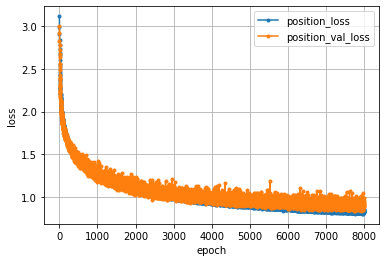

In [13]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

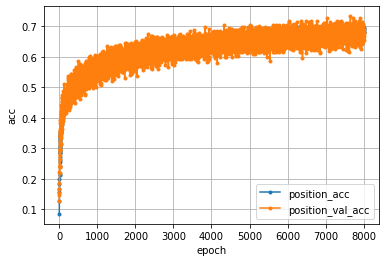

In [14]:
# 学習経過の可視化(位置)
position_acc     = position_history.history['accuracy']
position_val_acc = position_history.history['val_accuracy']

nb_epoch = len(position_acc)
plt.plot(range(nb_epoch), position_acc,     marker='.', label='position_acc')
plt.plot(range(nb_epoch), position_val_acc, marker='.', label='position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [92]:
#位置ごとの推定精度の確認
position_predict = position_model.predict(position_x_test).argmax(axis=1)
position_x_test = position_x_test.reshape(-1, 50)
position_one_data = position_one_data.tolist()
position_two_data = position_two_data.tolist()
position_three_data = position_three_data.tolist()
position_four_data = position_four_data.tolist()
position_five_data = position_five_data.tolist()
position_x_test = position_x_test.tolist()
position_answer = position_y_test.argmax(axis=1)
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(position_predict)):
    if position_x_test[i] in (position_one_data):
        one_total = one_total + 1
        if position_predict[i] == position_answer[i]:
            one_ok = one_ok + 1
    if position_x_test[i] in (position_two_data):
        two_total = two_total + 1
        if position_predict[i] == position_answer[i]:
            two_ok = two_ok + 1
    if position_x_test[i] in (position_three_data):
        three_total = three_total + 1
        if position_predict[i] == position_answer[i]:
            three_ok = three_ok + 1
    if position_x_test[i] in (position_four_data):
        four_total = four_total + 1
        if position_predict[i] == position_answer[i]:
            four_ok = four_ok + 1
    if position_x_test[i] in (position_five_data):
        five_total = five_total + 1
        if position_predict[i] == position_answer[i]:
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.4441860465116279
大きさ2の正答率：0.65
大きさ3の正答率：0.7311557788944724
大きさ4の正答率：0.8019559902200489
大きさ5の正答率：0.8324324324324325


In [99]:
# 学習(位置)
epochs = 15000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/15000
8108/8108 [==============================] - 0s 44us/step - loss: 3.1152 - accuracy: 0.0918 - val_loss: 2.9965 - val_accuracy: 0.1184
Epoch 2/15000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9875 - accuracy: 0.1325 - val_loss: 2.9053 - val_accuracy: 0.1426
Epoch 3/15000
8108/8108 [==============================] - 0s 30us/step - loss: 2.8970 - accuracy: 0.1511 - val_loss: 2.8400 - val_accuracy: 0.1658
Epoch 4/15000
8108/8108 [==============================] - 0s 32us/step - loss: 2.8345 - accuracy: 0.1721 - val_loss: 2.7576 - val_accuracy: 0.1880
Epoch 5/15000
8108/8108 [==============================] - 0s 30us/step - loss: 2.7821 - accuracy: 0.1721 - val_loss: 2.7293 - val_accuracy: 0.2037
Epoch 6/15000
8108/8108 [==============================] - 0s 31us/step - loss: 2.7280 - accuracy: 0.1986 - val_loss: 2.6865 - val_accuracy: 0.2077
Epoch 7/15000
8108/8108 [==============================] - 0s 32

Epoch 56/15000
8108/8108 [==============================] - 0s 36us/step - loss: 2.0346 - accuracy: 0.3789 - val_loss: 2.0458 - val_accuracy: 0.3330
Epoch 57/15000
8108/8108 [==============================] - 0s 29us/step - loss: 2.0239 - accuracy: 0.3817 - val_loss: 2.0511 - val_accuracy: 0.3833
Epoch 58/15000
8108/8108 [==============================] - 0s 36us/step - loss: 2.0271 - accuracy: 0.3841 - val_loss: 2.0470 - val_accuracy: 0.3508
Epoch 59/15000
8108/8108 [==============================] - 0s 35us/step - loss: 2.0035 - accuracy: 0.3886 - val_loss: 2.0148 - val_accuracy: 0.3705
Epoch 60/15000
8108/8108 [==============================] - 0s 35us/step - loss: 2.0053 - accuracy: 0.3867 - val_loss: 2.0149 - val_accuracy: 0.3833
Epoch 61/15000
8108/8108 [==============================] - 0s 39us/step - loss: 2.0105 - accuracy: 0.3886 - val_loss: 1.9564 - val_accuracy: 0.3942
Epoch 62/15000
8108/8108 [==============================] - 0s 39us/step - loss: 1.9969 - accuracy: 0.3834

Epoch 111/15000
8108/8108 [==============================] - 0s 37us/step - loss: 1.8364 - accuracy: 0.4241 - val_loss: 1.8147 - val_accuracy: 0.4628
Epoch 112/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.8203 - accuracy: 0.4412 - val_loss: 1.8252 - val_accuracy: 0.4080
Epoch 113/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.8320 - accuracy: 0.4369 - val_loss: 1.8558 - val_accuracy: 0.4100
Epoch 114/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.8346 - accuracy: 0.4272 - val_loss: 1.8433 - val_accuracy: 0.4050
Epoch 115/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.8299 - accuracy: 0.4329 - val_loss: 1.9192 - val_accuracy: 0.3996
Epoch 116/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8364 - accuracy: 0.4286 - val_loss: 1.8067 - val_accuracy: 0.4499
Epoch 117/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.8229 - accuracy:

Epoch 220/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6575 - accuracy: 0.4587 - val_loss: 1.6611 - val_accuracy: 0.4568
Epoch 221/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6467 - accuracy: 0.4646 - val_loss: 1.6808 - val_accuracy: 0.4445
Epoch 222/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6484 - accuracy: 0.4750 - val_loss: 1.6428 - val_accuracy: 0.4662
Epoch 223/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6469 - accuracy: 0.4665 - val_loss: 1.6821 - val_accuracy: 0.4450
Epoch 224/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6641 - accuracy: 0.4583 - val_loss: 1.6340 - val_accuracy: 0.4889
Epoch 225/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6313 - accuracy: 0.4798 - val_loss: 1.6964 - val_accuracy: 0.4637
Epoch 226/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6467 - accuracy:

Epoch 329/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5275 - accuracy: 0.4942 - val_loss: 1.5037 - val_accuracy: 0.5002
Epoch 330/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.5448 - accuracy: 0.4854 - val_loss: 1.5453 - val_accuracy: 0.4874
Epoch 331/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5467 - accuracy: 0.4872 - val_loss: 1.5180 - val_accuracy: 0.5185
Epoch 332/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.5474 - accuracy: 0.4926 - val_loss: 1.5209 - val_accuracy: 0.5017
Epoch 333/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.5549 - accuracy: 0.4842 - val_loss: 1.5418 - val_accuracy: 0.4820
Epoch 334/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.5309 - accuracy: 0.4899 - val_loss: 1.5537 - val_accuracy: 0.4524
Epoch 335/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5301 - accuracy:

Epoch 438/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.4504 - accuracy: 0.5170 - val_loss: 1.4849 - val_accuracy: 0.5032
Epoch 439/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4692 - accuracy: 0.5054 - val_loss: 1.4874 - val_accuracy: 0.4854
Epoch 440/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.4769 - accuracy: 0.5069 - val_loss: 1.5072 - val_accuracy: 0.4988
Epoch 441/15000
8108/8108 [==============================] - 0s 44us/step - loss: 1.4612 - accuracy: 0.5065 - val_loss: 1.4893 - val_accuracy: 0.5002
Epoch 442/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.4400 - accuracy: 0.5118 - val_loss: 1.4598 - val_accuracy: 0.4938
Epoch 443/15000
8108/8108 [==============================] - 0s 43us/step - loss: 1.4254 - accuracy: 0.5268 - val_loss: 1.4686 - val_accuracy: 0.5136
Epoch 444/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4533 - accuracy:

Epoch 547/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.4159 - accuracy: 0.5176 - val_loss: 1.3982 - val_accuracy: 0.5442
Epoch 548/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3771 - accuracy: 0.5307 - val_loss: 1.4664 - val_accuracy: 0.4756
Epoch 549/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4003 - accuracy: 0.5247 - val_loss: 1.3714 - val_accuracy: 0.5555
Epoch 550/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.3861 - accuracy: 0.5333 - val_loss: 1.4049 - val_accuracy: 0.5007
Epoch 551/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4116 - accuracy: 0.5167 - val_loss: 1.3790 - val_accuracy: 0.5170
Epoch 552/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3813 - accuracy: 0.5281 - val_loss: 1.3565 - val_accuracy: 0.5294
Epoch 553/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3908 - accuracy:

Epoch 656/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.3625 - accuracy: 0.5327 - val_loss: 1.4109 - val_accuracy: 0.5022
Epoch 657/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.3688 - accuracy: 0.5223 - val_loss: 1.3550 - val_accuracy: 0.5333
Epoch 658/15000
8108/8108 [==============================] - 0s 44us/step - loss: 1.3558 - accuracy: 0.5326 - val_loss: 1.3681 - val_accuracy: 0.5150
Epoch 659/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3209 - accuracy: 0.5461 - val_loss: 1.3648 - val_accuracy: 0.5387
Epoch 660/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3362 - accuracy: 0.5465 - val_loss: 1.3149 - val_accuracy: 0.5481
Epoch 661/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3533 - accuracy: 0.5366 - val_loss: 1.4052 - val_accuracy: 0.5062
Epoch 662/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3516 - accuracy:

Epoch 765/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.3392 - accuracy: 0.5361 - val_loss: 1.3615 - val_accuracy: 0.5239
Epoch 766/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.3102 - accuracy: 0.5464 - val_loss: 1.2642 - val_accuracy: 0.5570
Epoch 767/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3380 - accuracy: 0.5326 - val_loss: 1.3377 - val_accuracy: 0.5254
Epoch 768/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3356 - accuracy: 0.5364 - val_loss: 1.3287 - val_accuracy: 0.5091
Epoch 769/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3225 - accuracy: 0.5470 - val_loss: 1.3139 - val_accuracy: 0.5254
Epoch 770/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3264 - accuracy: 0.5442 - val_loss: 1.3009 - val_accuracy: 0.5466
Epoch 771/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3211 - accuracy:

Epoch 874/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2930 - accuracy: 0.5529 - val_loss: 1.2680 - val_accuracy: 0.5708
Epoch 875/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2891 - accuracy: 0.5559 - val_loss: 1.3083 - val_accuracy: 0.5456
Epoch 876/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2899 - accuracy: 0.5548 - val_loss: 1.3056 - val_accuracy: 0.5358
Epoch 877/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2924 - accuracy: 0.5472 - val_loss: 1.3458 - val_accuracy: 0.5249
Epoch 878/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2832 - accuracy: 0.5559 - val_loss: 1.3123 - val_accuracy: 0.5338
Epoch 879/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2784 - accuracy: 0.5577 - val_loss: 1.3034 - val_accuracy: 0.5506
Epoch 880/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2668 - accuracy:

Epoch 983/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2649 - accuracy: 0.5585 - val_loss: 1.3205 - val_accuracy: 0.5466
Epoch 984/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2850 - accuracy: 0.5456 - val_loss: 1.2902 - val_accuracy: 0.5629
Epoch 985/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2637 - accuracy: 0.5523 - val_loss: 1.2066 - val_accuracy: 0.5619
Epoch 986/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2560 - accuracy: 0.5645 - val_loss: 1.2174 - val_accuracy: 0.5777
Epoch 987/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2339 - accuracy: 0.5734 - val_loss: 1.3464 - val_accuracy: 0.5372
Epoch 988/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2944 - accuracy: 0.5540 - val_loss: 1.3234 - val_accuracy: 0.5175
Epoch 989/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2462 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 1.2389 - accuracy: 0.5607 - val_loss: 1.2527 - val_accuracy: 0.5580
Epoch 1092/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2391 - accuracy: 0.5597 - val_loss: 1.3482 - val_accuracy: 0.5234
Epoch 1093/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2674 - accuracy: 0.5578 - val_loss: 1.1937 - val_accuracy: 0.5550
Epoch 1094/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2332 - accuracy: 0.5673 - val_loss: 1.2231 - val_accuracy: 0.5668
Epoch 1095/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2116 - accuracy: 0.5702 - val_loss: 1.2250 - val_accuracy: 0.5698
Epoch 1096/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.2224 - accuracy: 0.5631 - val_loss: 1.2298 - val_accuracy: 0.5733
Epoch 1097/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2272 - accuracy: 0.5714 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1906 - accuracy: 0.5856 - val_loss: 1.2953 - val_accuracy: 0.5348
Epoch 1200/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2200 - accuracy: 0.5680 - val_loss: 1.2336 - val_accuracy: 0.5565
Epoch 1201/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1986 - accuracy: 0.5804 - val_loss: 1.2255 - val_accuracy: 0.5506
Epoch 1202/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.2076 - accuracy: 0.5752 - val_loss: 1.2910 - val_accuracy: 0.5742
Epoch 1203/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2123 - accuracy: 0.5702 - val_loss: 1.2138 - val_accuracy: 0.5802
Epoch 1204/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2056 - accuracy: 0.5726 - val_loss: 1.2151 - val_accuracy: 0.5895
Epoch 1205/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2273 - accuracy: 0.5670 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1976 - accuracy: 0.5703 - val_loss: 1.2382 - val_accuracy: 0.5437
Epoch 1308/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1753 - accuracy: 0.5851 - val_loss: 1.1461 - val_accuracy: 0.6147
Epoch 1309/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1800 - accuracy: 0.5844 - val_loss: 1.2039 - val_accuracy: 0.5678
Epoch 1310/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1858 - accuracy: 0.5788 - val_loss: 1.2487 - val_accuracy: 0.5407
Epoch 1311/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2160 - accuracy: 0.5676 - val_loss: 1.2555 - val_accuracy: 0.5718
Epoch 1312/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2007 - accuracy: 0.5765 - val_loss: 1.1885 - val_accuracy: 0.5728
Epoch 1313/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1844 - accuracy: 0.5837 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.1663 - accuracy: 0.5872 - val_loss: 1.1820 - val_accuracy: 0.5634
Epoch 1416/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1904 - accuracy: 0.5775 - val_loss: 1.1936 - val_accuracy: 0.5688
Epoch 1417/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1851 - accuracy: 0.5849 - val_loss: 1.1573 - val_accuracy: 0.5925
Epoch 1418/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1738 - accuracy: 0.5907 - val_loss: 1.2372 - val_accuracy: 0.5456
Epoch 1419/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1958 - accuracy: 0.5754 - val_loss: 1.2177 - val_accuracy: 0.5693
Epoch 1420/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1710 - accuracy: 0.5867 - val_loss: 1.1494 - val_accuracy: 0.5925
Epoch 1421/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1596 - accuracy: 0.5904 - 

8108/8108 [==============================] - 0s 34us/step - loss: 1.1370 - accuracy: 0.6031 - val_loss: 1.1388 - val_accuracy: 0.6073
Epoch 1524/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1678 - accuracy: 0.5866 - val_loss: 1.1748 - val_accuracy: 0.6167
Epoch 1525/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1635 - accuracy: 0.5895 - val_loss: 1.2040 - val_accuracy: 0.5960
Epoch 1526/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1673 - accuracy: 0.5877 - val_loss: 1.1447 - val_accuracy: 0.6132
Epoch 1527/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1519 - accuracy: 0.5899 - val_loss: 1.1975 - val_accuracy: 0.5614
Epoch 1528/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1495 - accuracy: 0.5888 - val_loss: 1.1720 - val_accuracy: 0.5984
Epoch 1529/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1439 - accuracy: 0.5952 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1257 - accuracy: 0.6034 - val_loss: 1.1584 - val_accuracy: 0.5728
Epoch 1632/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1370 - accuracy: 0.5904 - val_loss: 1.1756 - val_accuracy: 0.5821
Epoch 1633/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1318 - accuracy: 0.6010 - val_loss: 1.2143 - val_accuracy: 0.5664
Epoch 1634/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1704 - accuracy: 0.5816 - val_loss: 1.1443 - val_accuracy: 0.5945
Epoch 1635/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1375 - accuracy: 0.5858 - val_loss: 1.2149 - val_accuracy: 0.5580
Epoch 1636/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1560 - accuracy: 0.5851 - val_loss: 1.1798 - val_accuracy: 0.5752
Epoch 1637/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1519 - accuracy: 0.5888 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.1744 - accuracy: 0.5792 - val_loss: 1.1525 - val_accuracy: 0.5846
Epoch 1740/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1388 - accuracy: 0.5916 - val_loss: 1.1268 - val_accuracy: 0.5797
Epoch 1741/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1198 - accuracy: 0.6056 - val_loss: 1.1155 - val_accuracy: 0.6014
Epoch 1742/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1357 - accuracy: 0.5971 - val_loss: 1.1189 - val_accuracy: 0.6172
Epoch 1743/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1423 - accuracy: 0.5894 - val_loss: 1.2140 - val_accuracy: 0.5866
Epoch 1744/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1469 - accuracy: 0.5902 - val_loss: 1.1003 - val_accuracy: 0.6127
Epoch 1745/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1501 - accuracy: 0.5942 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1332 - accuracy: 0.5936 - val_loss: 1.2039 - val_accuracy: 0.5555
Epoch 1848/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1474 - accuracy: 0.5872 - val_loss: 1.0796 - val_accuracy: 0.6512
Epoch 1849/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1143 - accuracy: 0.6008 - val_loss: 1.1262 - val_accuracy: 0.5836
Epoch 1850/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1162 - accuracy: 0.6021 - val_loss: 1.1292 - val_accuracy: 0.6019
Epoch 1851/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.1230 - accuracy: 0.5963 - val_loss: 1.1409 - val_accuracy: 0.6098
Epoch 1852/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1120 - accuracy: 0.6026 - val_loss: 1.1402 - val_accuracy: 0.5994
Epoch 1853/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.1005 - accuracy: 0.6130 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1197 - accuracy: 0.5968 - val_loss: 1.1362 - val_accuracy: 0.5782
Epoch 1902/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1013 - accuracy: 0.6079 - val_loss: 1.1017 - val_accuracy: 0.6162
Epoch 1903/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1117 - accuracy: 0.5961 - val_loss: 1.1161 - val_accuracy: 0.6186
Epoch 1904/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1495 - accuracy: 0.5873 - val_loss: 1.1302 - val_accuracy: 0.5905
Epoch 1905/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1097 - accuracy: 0.6004 - val_loss: 1.1026 - val_accuracy: 0.5999
Epoch 1906/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1155 - accuracy: 0.6009 - val_loss: 1.0864 - val_accuracy: 0.6389
Epoch 1907/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1090 - accuracy: 0.5999 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0836 - accuracy: 0.6137 - val_loss: 1.1346 - val_accuracy: 0.5777
Epoch 2010/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0935 - accuracy: 0.6088 - val_loss: 1.1678 - val_accuracy: 0.5910
Epoch 2011/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1234 - accuracy: 0.6010 - val_loss: 1.1775 - val_accuracy: 0.5703
Epoch 2012/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1327 - accuracy: 0.5944 - val_loss: 1.1088 - val_accuracy: 0.6221
Epoch 2013/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0929 - accuracy: 0.6101 - val_loss: 1.0947 - val_accuracy: 0.6108
Epoch 2014/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0828 - accuracy: 0.6121 - val_loss: 1.1015 - val_accuracy: 0.5920
Epoch 2015/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0859 - accuracy: 0.6085 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0965 - accuracy: 0.6038 - val_loss: 1.1124 - val_accuracy: 0.5733
Epoch 2118/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0774 - accuracy: 0.6085 - val_loss: 1.1292 - val_accuracy: 0.5950
Epoch 2119/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0782 - accuracy: 0.6104 - val_loss: 1.1225 - val_accuracy: 0.6019
Epoch 2120/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1221 - accuracy: 0.5960 - val_loss: 1.1120 - val_accuracy: 0.5960
Epoch 2121/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0639 - accuracy: 0.6196 - val_loss: 1.0959 - val_accuracy: 0.6043
Epoch 2122/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0890 - accuracy: 0.6042 - val_loss: 1.1507 - val_accuracy: 0.5826
Epoch 2123/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0768 - accuracy: 0.6156 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.0724 - accuracy: 0.6141 - val_loss: 1.1461 - val_accuracy: 0.6177
Epoch 2172/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0705 - accuracy: 0.6164 - val_loss: 1.1630 - val_accuracy: 0.5747
Epoch 2173/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0737 - accuracy: 0.6154 - val_loss: 1.1006 - val_accuracy: 0.5945
Epoch 2174/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0886 - accuracy: 0.6111 - val_loss: 1.0884 - val_accuracy: 0.5861
Epoch 2175/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0721 - accuracy: 0.6196 - val_loss: 1.0786 - val_accuracy: 0.6251
Epoch 2176/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0661 - accuracy: 0.6235 - val_loss: 1.0847 - val_accuracy: 0.6063
Epoch 2177/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0654 - accuracy: 0.6196 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.0509 - accuracy: 0.6270 - val_loss: 1.1036 - val_accuracy: 0.5969
Epoch 2280/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0646 - accuracy: 0.6185 - val_loss: 1.1380 - val_accuracy: 0.6147
Epoch 2281/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0678 - accuracy: 0.6145 - val_loss: 1.1314 - val_accuracy: 0.5945
Epoch 2282/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0706 - accuracy: 0.6105 - val_loss: 1.1265 - val_accuracy: 0.6103
Epoch 2283/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0671 - accuracy: 0.6216 - val_loss: 1.0652 - val_accuracy: 0.6300
Epoch 2284/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0716 - accuracy: 0.6191 - val_loss: 1.0974 - val_accuracy: 0.5974
Epoch 2285/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0796 - accuracy: 0.6059 - 

8108/8108 [==============================] - 0s 32us/step - loss: 1.0554 - accuracy: 0.6156 - val_loss: 1.1685 - val_accuracy: 0.6137
Epoch 2388/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0828 - accuracy: 0.6077 - val_loss: 1.2165 - val_accuracy: 0.5580
Epoch 2389/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0626 - accuracy: 0.6138 - val_loss: 1.0810 - val_accuracy: 0.6053
Epoch 2390/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0958 - accuracy: 0.6047 - val_loss: 1.0689 - val_accuracy: 0.6325
Epoch 2391/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0649 - accuracy: 0.6148 - val_loss: 1.0628 - val_accuracy: 0.6078
Epoch 2392/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0874 - accuracy: 0.6088 - val_loss: 1.1569 - val_accuracy: 0.5964
Epoch 2393/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0574 - accuracy: 0.6220 - 

8108/8108 [==============================] - 0s 29us/step - loss: 1.0617 - accuracy: 0.6140 - val_loss: 1.0629 - val_accuracy: 0.6221
Epoch 2496/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0580 - accuracy: 0.6219 - val_loss: 1.0574 - val_accuracy: 0.6260
Epoch 2497/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0614 - accuracy: 0.6136 - val_loss: 1.1108 - val_accuracy: 0.5920
Epoch 2498/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0555 - accuracy: 0.6136 - val_loss: 1.1243 - val_accuracy: 0.5876
Epoch 2499/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0465 - accuracy: 0.6198 - val_loss: 1.1159 - val_accuracy: 0.5831
Epoch 2500/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0667 - accuracy: 0.6103 - val_loss: 1.1040 - val_accuracy: 0.6053
Epoch 2501/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0525 - accuracy: 0.6212 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.0587 - accuracy: 0.6199 - val_loss: 1.0808 - val_accuracy: 0.6137
Epoch 2604/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0465 - accuracy: 0.6180 - val_loss: 1.1146 - val_accuracy: 0.6098
Epoch 2605/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0877 - accuracy: 0.6142 - val_loss: 1.1256 - val_accuracy: 0.5910
Epoch 2606/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0454 - accuracy: 0.6199 - val_loss: 1.0375 - val_accuracy: 0.6256
Epoch 2607/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0325 - accuracy: 0.6309 - val_loss: 1.0528 - val_accuracy: 0.6246
Epoch 2608/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0307 - accuracy: 0.6233 - val_loss: 1.0329 - val_accuracy: 0.6285
Epoch 2609/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0467 - accuracy: 0.6248 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.0353 - accuracy: 0.6215 - val_loss: 1.0745 - val_accuracy: 0.6305
Epoch 2712/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0345 - accuracy: 0.6253 - val_loss: 1.1313 - val_accuracy: 0.5802
Epoch 2713/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0606 - accuracy: 0.6148 - val_loss: 1.2323 - val_accuracy: 0.5412
Epoch 2714/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0391 - accuracy: 0.6196 - val_loss: 1.0604 - val_accuracy: 0.6246
Epoch 2715/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0202 - accuracy: 0.6295 - val_loss: 1.0221 - val_accuracy: 0.6561
Epoch 2716/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0163 - accuracy: 0.6348 - val_loss: 1.0291 - val_accuracy: 0.6374
Epoch 2717/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0255 - accuracy: 0.6304 - 

8108/8108 [==============================] - 0s 29us/step - loss: 1.0429 - accuracy: 0.6194 - val_loss: 1.1165 - val_accuracy: 0.5960
Epoch 2820/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0385 - accuracy: 0.6204 - val_loss: 1.0574 - val_accuracy: 0.6088
Epoch 2821/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0134 - accuracy: 0.6260 - val_loss: 1.0737 - val_accuracy: 0.6231
Epoch 2822/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0221 - accuracy: 0.6240 - val_loss: 1.0619 - val_accuracy: 0.6191
Epoch 2823/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0224 - accuracy: 0.6297 - val_loss: 1.0624 - val_accuracy: 0.6048
Epoch 2824/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0179 - accuracy: 0.6352 - val_loss: 1.0867 - val_accuracy: 0.6162
Epoch 2825/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0104 - accuracy: 0.6327 - 

8108/8108 [==============================] - 0s 29us/step - loss: 1.0416 - accuracy: 0.6180 - val_loss: 1.0644 - val_accuracy: 0.6418
Epoch 2928/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0248 - accuracy: 0.6193 - val_loss: 1.0632 - val_accuracy: 0.6038
Epoch 2929/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9954 - accuracy: 0.6464 - val_loss: 1.1000 - val_accuracy: 0.6132
Epoch 2930/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0457 - accuracy: 0.6185 - val_loss: 1.0272 - val_accuracy: 0.6290
Epoch 2931/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0211 - accuracy: 0.6243 - val_loss: 1.0570 - val_accuracy: 0.6147
Epoch 2932/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0343 - accuracy: 0.6231 - val_loss: 1.0357 - val_accuracy: 0.6167
Epoch 2933/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0213 - accuracy: 0.6333 - 

8108/8108 [==============================] - 0s 28us/step - loss: 1.0197 - accuracy: 0.6279 - val_loss: 1.0751 - val_accuracy: 0.6330
Epoch 3036/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0004 - accuracy: 0.6385 - val_loss: 1.0449 - val_accuracy: 0.6443
Epoch 3037/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0134 - accuracy: 0.6291 - val_loss: 1.0697 - val_accuracy: 0.6117
Epoch 3038/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0316 - accuracy: 0.6274 - val_loss: 1.0425 - val_accuracy: 0.6098
Epoch 3039/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9891 - accuracy: 0.6426 - val_loss: 1.0996 - val_accuracy: 0.6063
Epoch 3040/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0057 - accuracy: 0.6326 - val_loss: 1.0653 - val_accuracy: 0.6310
Epoch 3041/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0079 - accuracy: 0.6297 - 

8108/8108 [==============================] - 0s 39us/step - loss: 1.0142 - accuracy: 0.6295 - val_loss: 1.0373 - val_accuracy: 0.6399
Epoch 3144/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9799 - accuracy: 0.6448 - val_loss: 1.0891 - val_accuracy: 0.6226
Epoch 3145/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0108 - accuracy: 0.6305 - val_loss: 1.0906 - val_accuracy: 0.6103
Epoch 3146/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0099 - accuracy: 0.6315 - val_loss: 1.0697 - val_accuracy: 0.6305
Epoch 3147/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0104 - accuracy: 0.6388 - val_loss: 1.0178 - val_accuracy: 0.6433
Epoch 3148/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9977 - accuracy: 0.6325 - val_loss: 0.9917 - val_accuracy: 0.6640
Epoch 3149/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9902 - accuracy: 0.6437 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9839 - accuracy: 0.6391 - val_loss: 1.0236 - val_accuracy: 0.6458
Epoch 3252/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9806 - accuracy: 0.6455 - val_loss: 1.0786 - val_accuracy: 0.6112
Epoch 3253/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9982 - accuracy: 0.6352 - val_loss: 1.0993 - val_accuracy: 0.6029
Epoch 3254/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9809 - accuracy: 0.6397 - val_loss: 1.0596 - val_accuracy: 0.6108
Epoch 3255/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9880 - accuracy: 0.6407 - val_loss: 1.0237 - val_accuracy: 0.6497
Epoch 3256/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9893 - accuracy: 0.6384 - val_loss: 1.0595 - val_accuracy: 0.6231
Epoch 3257/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0223 - accuracy: 0.6251 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9904 - accuracy: 0.6352 - val_loss: 1.0665 - val_accuracy: 0.6251
Epoch 3360/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0152 - accuracy: 0.6243 - val_loss: 1.0682 - val_accuracy: 0.6270
Epoch 3361/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9896 - accuracy: 0.6428 - val_loss: 1.1240 - val_accuracy: 0.5960
Epoch 3362/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0075 - accuracy: 0.6344 - val_loss: 1.0493 - val_accuracy: 0.6117
Epoch 3363/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0019 - accuracy: 0.6321 - val_loss: 1.0636 - val_accuracy: 0.6418
Epoch 3364/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0042 - accuracy: 0.6325 - val_loss: 1.0956 - val_accuracy: 0.6270
Epoch 3365/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9820 - accuracy: 0.6459 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9810 - accuracy: 0.6396 - val_loss: 1.0602 - val_accuracy: 0.6645
Epoch 3468/15000
8108/8108 [==============================] - 1s 92us/step - loss: 0.9823 - accuracy: 0.6422 - val_loss: 1.0635 - val_accuracy: 0.6236
Epoch 3469/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.9737 - accuracy: 0.6429 - val_loss: 1.0618 - val_accuracy: 0.6512
Epoch 3470/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9910 - accuracy: 0.6407 - val_loss: 1.0485 - val_accuracy: 0.6285
Epoch 3471/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0029 - accuracy: 0.6333 - val_loss: 1.0879 - val_accuracy: 0.6117
Epoch 3472/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9999 - accuracy: 0.6318 - val_loss: 1.1482 - val_accuracy: 0.5945
Epoch 3473/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9890 - accuracy: 0.6323 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.9845 - accuracy: 0.6373 - val_loss: 1.0357 - val_accuracy: 0.6399
Epoch 3576/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9870 - accuracy: 0.6346 - val_loss: 1.1364 - val_accuracy: 0.6260
Epoch 3577/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9861 - accuracy: 0.6358 - val_loss: 1.0641 - val_accuracy: 0.6315
Epoch 3578/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9862 - accuracy: 0.6404 - val_loss: 1.0629 - val_accuracy: 0.6389
Epoch 3579/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9827 - accuracy: 0.6370 - val_loss: 1.0764 - val_accuracy: 0.6201
Epoch 3580/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9766 - accuracy: 0.6399 - val_loss: 1.0749 - val_accuracy: 0.6280
Epoch 3581/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9906 - accuracy: 0.6347 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.9906 - accuracy: 0.6406 - val_loss: 1.0775 - val_accuracy: 0.6330
Epoch 3684/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9868 - accuracy: 0.6375 - val_loss: 1.0565 - val_accuracy: 0.6379
Epoch 3685/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9629 - accuracy: 0.6552 - val_loss: 1.1003 - val_accuracy: 0.6142
Epoch 3686/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9644 - accuracy: 0.6479 - val_loss: 1.0069 - val_accuracy: 0.6714
Epoch 3687/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9716 - accuracy: 0.6412 - val_loss: 1.1062 - val_accuracy: 0.6093
Epoch 3688/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9764 - accuracy: 0.6418 - val_loss: 1.1067 - val_accuracy: 0.6137
Epoch 3689/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9904 - accuracy: 0.6309 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9702 - accuracy: 0.6474 - val_loss: 1.1106 - val_accuracy: 0.6389
Epoch 3792/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9547 - accuracy: 0.6505 - val_loss: 1.0326 - val_accuracy: 0.6408
Epoch 3793/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9492 - accuracy: 0.6560 - val_loss: 1.0364 - val_accuracy: 0.6433
Epoch 3794/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9694 - accuracy: 0.6434 - val_loss: 1.0685 - val_accuracy: 0.6157
Epoch 3795/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9522 - accuracy: 0.6533 - val_loss: 1.0212 - val_accuracy: 0.6448
Epoch 3796/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9544 - accuracy: 0.6549 - val_loss: 1.0165 - val_accuracy: 0.6566
Epoch 3797/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9574 - accuracy: 0.6568 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.9521 - accuracy: 0.6526 - val_loss: 1.0369 - val_accuracy: 0.6463
Epoch 3900/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9596 - accuracy: 0.6533 - val_loss: 1.0668 - val_accuracy: 0.6196
Epoch 3901/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9549 - accuracy: 0.6506 - val_loss: 1.1244 - val_accuracy: 0.6073
Epoch 3902/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9731 - accuracy: 0.6375 - val_loss: 1.0774 - val_accuracy: 0.6320
Epoch 3903/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9640 - accuracy: 0.6459 - val_loss: 1.0791 - val_accuracy: 0.6098
Epoch 3904/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9676 - accuracy: 0.6433 - val_loss: 1.1138 - val_accuracy: 0.6433
Epoch 3905/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9404 - accuracy: 0.6560 - 

8108/8108 [==============================] - 0s 43us/step - loss: 0.9398 - accuracy: 0.6561 - val_loss: 1.1787 - val_accuracy: 0.6216
Epoch 4008/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9748 - accuracy: 0.6422 - val_loss: 1.0556 - val_accuracy: 0.6211
Epoch 4009/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9493 - accuracy: 0.6463 - val_loss: 1.0859 - val_accuracy: 0.6305
Epoch 4010/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9485 - accuracy: 0.6543 - val_loss: 1.0260 - val_accuracy: 0.6408
Epoch 4011/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9414 - accuracy: 0.6592 - val_loss: 1.0519 - val_accuracy: 0.6305
Epoch 4012/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9364 - accuracy: 0.6545 - val_loss: 1.0750 - val_accuracy: 0.6527
Epoch 4013/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9531 - accuracy: 0.6506 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.9372 - accuracy: 0.6522 - val_loss: 1.0729 - val_accuracy: 0.6413
Epoch 4116/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9438 - accuracy: 0.6554 - val_loss: 1.0292 - val_accuracy: 0.6552
Epoch 4117/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.9541 - accuracy: 0.6536 - val_loss: 1.0333 - val_accuracy: 0.6571
Epoch 4118/15000
8108/8108 [==============================] - 1s 62us/step - loss: 0.9345 - accuracy: 0.6608 - val_loss: 1.1132 - val_accuracy: 0.6201
Epoch 4119/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9377 - accuracy: 0.6574 - val_loss: 1.0636 - val_accuracy: 0.6482
Epoch 4120/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9459 - accuracy: 0.6533 - val_loss: 1.0291 - val_accuracy: 0.6635
Epoch 4121/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9253 - accuracy: 0.6564 - 

8108/8108 [==============================] - 0s 35us/step - loss: 0.9417 - accuracy: 0.6528 - val_loss: 1.0486 - val_accuracy: 0.6724
Epoch 4224/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9350 - accuracy: 0.6556 - val_loss: 1.0883 - val_accuracy: 0.6280
Epoch 4225/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9760 - accuracy: 0.6396 - val_loss: 1.0444 - val_accuracy: 0.6478
Epoch 4226/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9372 - accuracy: 0.6559 - val_loss: 1.0460 - val_accuracy: 0.6231
Epoch 4227/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9386 - accuracy: 0.6549 - val_loss: 1.0926 - val_accuracy: 0.6241
Epoch 4228/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9693 - accuracy: 0.6465 - val_loss: 1.0455 - val_accuracy: 0.6497
Epoch 4229/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9640 - accuracy: 0.6442 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.9374 - accuracy: 0.6519 - val_loss: 1.0400 - val_accuracy: 0.6571
Epoch 4332/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9441 - accuracy: 0.6512 - val_loss: 1.0645 - val_accuracy: 0.6389
Epoch 4333/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9440 - accuracy: 0.6597 - val_loss: 1.0889 - val_accuracy: 0.6349
Epoch 4334/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9390 - accuracy: 0.6515 - val_loss: 1.1092 - val_accuracy: 0.6172
Epoch 4335/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.9543 - accuracy: 0.6528 - val_loss: 1.0539 - val_accuracy: 0.6502
Epoch 4336/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9229 - accuracy: 0.6613 - val_loss: 1.0215 - val_accuracy: 0.6660
Epoch 4337/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9234 - accuracy: 0.6590 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9198 - accuracy: 0.6555 - val_loss: 1.0630 - val_accuracy: 0.6310
Epoch 4440/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9471 - accuracy: 0.6479 - val_loss: 1.0684 - val_accuracy: 0.6507
Epoch 4441/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9395 - accuracy: 0.6500 - val_loss: 1.1081 - val_accuracy: 0.6167
Epoch 4442/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9438 - accuracy: 0.6553 - val_loss: 1.0606 - val_accuracy: 0.6507
Epoch 4443/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9164 - accuracy: 0.6630 - val_loss: 1.0823 - val_accuracy: 0.6389
Epoch 4444/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9202 - accuracy: 0.6560 - val_loss: 1.0646 - val_accuracy: 0.6354
Epoch 4445/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9383 - accuracy: 0.6524 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.9137 - accuracy: 0.6626 - val_loss: 1.0422 - val_accuracy: 0.6522
Epoch 4548/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9275 - accuracy: 0.6585 - val_loss: 1.0440 - val_accuracy: 0.6552
Epoch 4549/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9467 - accuracy: 0.6478 - val_loss: 1.0351 - val_accuracy: 0.6428
Epoch 4550/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9288 - accuracy: 0.6538 - val_loss: 1.0668 - val_accuracy: 0.6413
Epoch 4551/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9376 - accuracy: 0.6528 - val_loss: 1.0669 - val_accuracy: 0.6270
Epoch 4552/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9214 - accuracy: 0.6598 - val_loss: 1.0090 - val_accuracy: 0.6931
Epoch 4553/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9150 - accuracy: 0.6614 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9296 - accuracy: 0.6606 - val_loss: 1.0632 - val_accuracy: 0.6423
Epoch 4656/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.9328 - accuracy: 0.6616 - val_loss: 1.0896 - val_accuracy: 0.6354
Epoch 4657/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9356 - accuracy: 0.6592 - val_loss: 1.0113 - val_accuracy: 0.6798
Epoch 4658/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.9227 - accuracy: 0.6642 - val_loss: 1.0652 - val_accuracy: 0.6379
Epoch 4659/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.9187 - accuracy: 0.6617 - val_loss: 1.0221 - val_accuracy: 0.6596
Epoch 4660/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.9272 - accuracy: 0.6528 - val_loss: 1.0449 - val_accuracy: 0.6724
Epoch 4661/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9332 - accuracy: 0.6534 - 

8108/8108 [==============================] - 0s 33us/step - loss: 0.9117 - accuracy: 0.6617 - val_loss: 1.0368 - val_accuracy: 0.6433
Epoch 4764/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9146 - accuracy: 0.6614 - val_loss: 1.0182 - val_accuracy: 0.6601
Epoch 4765/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9139 - accuracy: 0.6676 - val_loss: 1.0726 - val_accuracy: 0.6394
Epoch 4766/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9286 - accuracy: 0.6532 - val_loss: 1.1136 - val_accuracy: 0.6177
Epoch 4767/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9267 - accuracy: 0.6512 - val_loss: 1.0267 - val_accuracy: 0.6714
Epoch 4768/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9221 - accuracy: 0.6647 - val_loss: 1.0884 - val_accuracy: 0.6221
Epoch 4769/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9436 - accuracy: 0.6459 - 

8108/8108 [==============================] - 0s 33us/step - loss: 0.9323 - accuracy: 0.6605 - val_loss: 1.0938 - val_accuracy: 0.6275
Epoch 4872/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9205 - accuracy: 0.6624 - val_loss: 1.0752 - val_accuracy: 0.6522
Epoch 4873/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9114 - accuracy: 0.6613 - val_loss: 1.0467 - val_accuracy: 0.6675
Epoch 4874/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9053 - accuracy: 0.6665 - val_loss: 1.0604 - val_accuracy: 0.6428
Epoch 4875/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9075 - accuracy: 0.6703 - val_loss: 1.0568 - val_accuracy: 0.6542
Epoch 4876/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9185 - accuracy: 0.6661 - val_loss: 1.0244 - val_accuracy: 0.6527
Epoch 4877/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9068 - accuracy: 0.6675 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.9261 - accuracy: 0.6573 - val_loss: 1.0411 - val_accuracy: 0.6487
Epoch 4980/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9058 - accuracy: 0.6645 - val_loss: 1.0320 - val_accuracy: 0.6660
Epoch 4981/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9094 - accuracy: 0.6617 - val_loss: 1.0496 - val_accuracy: 0.6764
Epoch 4982/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8967 - accuracy: 0.6714 - val_loss: 1.0652 - val_accuracy: 0.6522
Epoch 4983/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9120 - accuracy: 0.6618 - val_loss: 1.0798 - val_accuracy: 0.6630
Epoch 4984/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9367 - accuracy: 0.6513 - val_loss: 1.0814 - val_accuracy: 0.6246
Epoch 4985/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9191 - accuracy: 0.6566 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8975 - accuracy: 0.6644 - val_loss: 1.0769 - val_accuracy: 0.6542
Epoch 5088/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8868 - accuracy: 0.6746 - val_loss: 1.0046 - val_accuracy: 0.6719
Epoch 5089/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8925 - accuracy: 0.6717 - val_loss: 1.0644 - val_accuracy: 0.6458
Epoch 5090/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8916 - accuracy: 0.6741 - val_loss: 1.0311 - val_accuracy: 0.6571
Epoch 5091/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9175 - accuracy: 0.6563 - val_loss: 1.0339 - val_accuracy: 0.6532
Epoch 5092/15000
8108/8108 [==============================] - 0s 48us/step - loss: 0.9155 - accuracy: 0.6559 - val_loss: 1.0481 - val_accuracy: 0.6685
Epoch 5093/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.9151 - accuracy: 0.6561 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.9153 - accuracy: 0.6630 - val_loss: 1.0915 - val_accuracy: 0.6379
Epoch 5196/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9224 - accuracy: 0.6561 - val_loss: 1.0067 - val_accuracy: 0.6774
Epoch 5197/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9162 - accuracy: 0.6597 - val_loss: 1.1319 - val_accuracy: 0.6458
Epoch 5198/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9134 - accuracy: 0.6575 - val_loss: 1.0228 - val_accuracy: 0.6690
Epoch 5199/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8871 - accuracy: 0.6745 - val_loss: 1.0176 - val_accuracy: 0.6502
Epoch 5200/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8891 - accuracy: 0.6700 - val_loss: 1.0499 - val_accuracy: 0.6502
Epoch 5201/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8850 - accuracy: 0.6764 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.9132 - accuracy: 0.6553 - val_loss: 1.0754 - val_accuracy: 0.6640
Epoch 5304/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9119 - accuracy: 0.6629 - val_loss: 1.1167 - val_accuracy: 0.6256
Epoch 5305/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8816 - accuracy: 0.6785 - val_loss: 1.0192 - val_accuracy: 0.6640
Epoch 5306/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8914 - accuracy: 0.6692 - val_loss: 1.1029 - val_accuracy: 0.6157
Epoch 5307/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9146 - accuracy: 0.6587 - val_loss: 1.0705 - val_accuracy: 0.6537
Epoch 5308/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8969 - accuracy: 0.6690 - val_loss: 1.0267 - val_accuracy: 0.6862
Epoch 5309/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9009 - accuracy: 0.6628 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.8893 - accuracy: 0.6667 - val_loss: 1.0566 - val_accuracy: 0.6492
Epoch 5412/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8912 - accuracy: 0.6732 - val_loss: 1.0274 - val_accuracy: 0.6709
Epoch 5413/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8996 - accuracy: 0.6637 - val_loss: 1.0345 - val_accuracy: 0.6626
Epoch 5414/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8842 - accuracy: 0.6755 - val_loss: 1.0887 - val_accuracy: 0.6384
Epoch 5415/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8956 - accuracy: 0.6672 - val_loss: 1.0582 - val_accuracy: 0.6413
Epoch 5416/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9492 - accuracy: 0.6485 - val_loss: 1.1160 - val_accuracy: 0.6418
Epoch 5417/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9082 - accuracy: 0.6669 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.8986 - accuracy: 0.6671 - val_loss: 1.1019 - val_accuracy: 0.6231
Epoch 5520/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9035 - accuracy: 0.6633 - val_loss: 1.0555 - val_accuracy: 0.6611
Epoch 5521/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8941 - accuracy: 0.6666 - val_loss: 1.0116 - val_accuracy: 0.6670
Epoch 5522/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8958 - accuracy: 0.6675 - val_loss: 1.0586 - val_accuracy: 0.6231
Epoch 5523/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9059 - accuracy: 0.6601 - val_loss: 1.0330 - val_accuracy: 0.6601
Epoch 5524/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9001 - accuracy: 0.6692 - val_loss: 1.0568 - val_accuracy: 0.6492
Epoch 5525/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8819 - accuracy: 0.6760 - 

8108/8108 [==============================] - 0s 33us/step - loss: 0.8859 - accuracy: 0.6727 - val_loss: 1.0549 - val_accuracy: 0.6566
Epoch 5628/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9121 - accuracy: 0.6545 - val_loss: 1.0466 - val_accuracy: 0.6379
Epoch 5629/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8796 - accuracy: 0.6769 - val_loss: 1.0060 - val_accuracy: 0.6931
Epoch 5630/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9177 - accuracy: 0.6610 - val_loss: 1.1074 - val_accuracy: 0.6300
Epoch 5631/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9098 - accuracy: 0.6672 - val_loss: 1.1092 - val_accuracy: 0.6334
Epoch 5632/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8767 - accuracy: 0.6764 - val_loss: 1.0273 - val_accuracy: 0.6537
Epoch 5633/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8702 - accuracy: 0.6759 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.8838 - accuracy: 0.6797 - val_loss: 1.0292 - val_accuracy: 0.6788
Epoch 5736/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8710 - accuracy: 0.6834 - val_loss: 1.0686 - val_accuracy: 0.6650
Epoch 5737/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8875 - accuracy: 0.6740 - val_loss: 1.0851 - val_accuracy: 0.6468
Epoch 5738/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8822 - accuracy: 0.6758 - val_loss: 1.0262 - val_accuracy: 0.6857
Epoch 5739/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8826 - accuracy: 0.6686 - val_loss: 1.0720 - val_accuracy: 0.6418
Epoch 5740/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9038 - accuracy: 0.6607 - val_loss: 1.0655 - val_accuracy: 0.6532
Epoch 5741/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9007 - accuracy: 0.6654 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.9046 - accuracy: 0.6661 - val_loss: 1.1310 - val_accuracy: 0.6428
Epoch 5844/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8871 - accuracy: 0.6701 - val_loss: 1.0228 - val_accuracy: 0.6704
Epoch 5845/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8681 - accuracy: 0.6745 - val_loss: 1.0464 - val_accuracy: 0.6532
Epoch 5846/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8751 - accuracy: 0.6753 - val_loss: 1.0212 - val_accuracy: 0.6601
Epoch 5847/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8806 - accuracy: 0.6685 - val_loss: 1.0416 - val_accuracy: 0.6492
Epoch 5848/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8808 - accuracy: 0.6743 - val_loss: 1.0667 - val_accuracy: 0.6556
Epoch 5849/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8830 - accuracy: 0.6722 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.8688 - accuracy: 0.6828 - val_loss: 1.0151 - val_accuracy: 0.6695
Epoch 5952/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8783 - accuracy: 0.6706 - val_loss: 1.0451 - val_accuracy: 0.6640
Epoch 5953/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8525 - accuracy: 0.6889 - val_loss: 1.0328 - val_accuracy: 0.6591
Epoch 5954/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8889 - accuracy: 0.6716 - val_loss: 1.0989 - val_accuracy: 0.6626
Epoch 5955/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8813 - accuracy: 0.6760 - val_loss: 1.1033 - val_accuracy: 0.6547
Epoch 5956/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8816 - accuracy: 0.6750 - val_loss: 1.0196 - val_accuracy: 0.6783
Epoch 5957/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8674 - accuracy: 0.6818 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.8820 - accuracy: 0.6807 - val_loss: 1.1051 - val_accuracy: 0.6201
Epoch 6060/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8665 - accuracy: 0.6764 - val_loss: 1.0350 - val_accuracy: 0.6537
Epoch 6061/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8848 - accuracy: 0.6685 - val_loss: 1.0717 - val_accuracy: 0.6650
Epoch 6062/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8927 - accuracy: 0.6675 - val_loss: 1.0494 - val_accuracy: 0.6571
Epoch 6063/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8438 - accuracy: 0.6896 - val_loss: 1.0505 - val_accuracy: 0.6729
Epoch 6064/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8694 - accuracy: 0.6796 - val_loss: 1.0587 - val_accuracy: 0.6670
Epoch 6065/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8822 - accuracy: 0.6676 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.8842 - accuracy: 0.6663 - val_loss: 1.1075 - val_accuracy: 0.6418
Epoch 6168/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8827 - accuracy: 0.6745 - val_loss: 1.0468 - val_accuracy: 0.6769
Epoch 6169/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8787 - accuracy: 0.6762 - val_loss: 1.0716 - val_accuracy: 0.6364
Epoch 6170/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8868 - accuracy: 0.6660 - val_loss: 1.0508 - val_accuracy: 0.6527
Epoch 6171/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8760 - accuracy: 0.6735 - val_loss: 1.0393 - val_accuracy: 0.6463
Epoch 6172/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8702 - accuracy: 0.6791 - val_loss: 1.0502 - val_accuracy: 0.6744
Epoch 6173/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8535 - accuracy: 0.6880 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.8903 - accuracy: 0.6684 - val_loss: 1.0066 - val_accuracy: 0.6630
Epoch 6276/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8599 - accuracy: 0.6782 - val_loss: 1.0969 - val_accuracy: 0.6344
Epoch 6277/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8603 - accuracy: 0.6802 - val_loss: 1.0361 - val_accuracy: 0.6670
Epoch 6278/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8743 - accuracy: 0.6760 - val_loss: 1.0775 - val_accuracy: 0.6552
Epoch 6279/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8680 - accuracy: 0.6782 - val_loss: 1.0885 - val_accuracy: 0.6478
Epoch 6280/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8745 - accuracy: 0.6762 - val_loss: 1.0429 - val_accuracy: 0.6576
Epoch 6281/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8874 - accuracy: 0.6628 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.8847 - accuracy: 0.6714 - val_loss: 1.0810 - val_accuracy: 0.6487
Epoch 6384/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8755 - accuracy: 0.6716 - val_loss: 1.0723 - val_accuracy: 0.6586
Epoch 6385/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8708 - accuracy: 0.6829 - val_loss: 1.0797 - val_accuracy: 0.6517
Epoch 6386/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8699 - accuracy: 0.6798 - val_loss: 1.1521 - val_accuracy: 0.6418
Epoch 6387/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8862 - accuracy: 0.6732 - val_loss: 0.9920 - val_accuracy: 0.6778
Epoch 6388/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8492 - accuracy: 0.6902 - val_loss: 1.0170 - val_accuracy: 0.6976
Epoch 6389/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8632 - accuracy: 0.6817 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.8818 - accuracy: 0.6754 - val_loss: 1.0320 - val_accuracy: 0.6778
Epoch 6492/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8726 - accuracy: 0.6761 - val_loss: 0.9914 - val_accuracy: 0.6936
Epoch 6493/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8688 - accuracy: 0.6739 - val_loss: 1.0115 - val_accuracy: 0.6759
Epoch 6494/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8584 - accuracy: 0.6802 - val_loss: 1.0854 - val_accuracy: 0.6626
Epoch 6495/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8716 - accuracy: 0.6770 - val_loss: 1.0296 - val_accuracy: 0.6739
Epoch 6496/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8811 - accuracy: 0.6721 - val_loss: 1.0211 - val_accuracy: 0.6769
Epoch 6497/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8629 - accuracy: 0.6761 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.8439 - accuracy: 0.6818 - val_loss: 1.0462 - val_accuracy: 0.6468
Epoch 6600/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8635 - accuracy: 0.6812 - val_loss: 0.9947 - val_accuracy: 0.7020
Epoch 6601/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8863 - accuracy: 0.6723 - val_loss: 1.1075 - val_accuracy: 0.6334
Epoch 6602/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8657 - accuracy: 0.6877 - val_loss: 1.0964 - val_accuracy: 0.6295
Epoch 6603/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8667 - accuracy: 0.6809 - val_loss: 1.0467 - val_accuracy: 0.6517
Epoch 6604/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8829 - accuracy: 0.6778 - val_loss: 1.0753 - val_accuracy: 0.6433
Epoch 6605/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8522 - accuracy: 0.6813 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8643 - accuracy: 0.6739 - val_loss: 1.0378 - val_accuracy: 0.6606
Epoch 6708/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8571 - accuracy: 0.6827 - val_loss: 1.0446 - val_accuracy: 0.6734
Epoch 6709/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8781 - accuracy: 0.6656 - val_loss: 1.0324 - val_accuracy: 0.6704
Epoch 6710/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8622 - accuracy: 0.6829 - val_loss: 1.0583 - val_accuracy: 0.6561
Epoch 6711/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8793 - accuracy: 0.6672 - val_loss: 1.0503 - val_accuracy: 0.6542
Epoch 6712/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8704 - accuracy: 0.6744 - val_loss: 1.0460 - val_accuracy: 0.6507
Epoch 6713/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8769 - accuracy: 0.6645 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.8748 - accuracy: 0.6737 - val_loss: 1.0760 - val_accuracy: 0.6650
Epoch 6816/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8753 - accuracy: 0.6749 - val_loss: 1.0298 - val_accuracy: 0.6788
Epoch 6817/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8479 - accuracy: 0.6859 - val_loss: 1.0596 - val_accuracy: 0.6275
Epoch 6818/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8609 - accuracy: 0.6793 - val_loss: 1.0642 - val_accuracy: 0.6739
Epoch 6819/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8754 - accuracy: 0.6745 - val_loss: 1.0138 - val_accuracy: 0.6818
Epoch 6820/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8502 - accuracy: 0.6827 - val_loss: 1.0298 - val_accuracy: 0.6626
Epoch 6821/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8549 - accuracy: 0.6795 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8446 - accuracy: 0.6815 - val_loss: 1.0224 - val_accuracy: 0.6680
Epoch 6924/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8439 - accuracy: 0.6880 - val_loss: 1.0815 - val_accuracy: 0.6566
Epoch 6925/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8468 - accuracy: 0.6823 - val_loss: 1.0406 - val_accuracy: 0.6695
Epoch 6926/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8478 - accuracy: 0.6843 - val_loss: 1.0113 - val_accuracy: 0.6892
Epoch 6927/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8369 - accuracy: 0.6951 - val_loss: 1.0673 - val_accuracy: 0.6502
Epoch 6928/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8669 - accuracy: 0.6713 - val_loss: 1.0572 - val_accuracy: 0.6601
Epoch 6929/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8500 - accuracy: 0.6846 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8442 - accuracy: 0.6860 - val_loss: 1.0079 - val_accuracy: 0.6882
Epoch 7032/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8382 - accuracy: 0.6914 - val_loss: 1.0098 - val_accuracy: 0.6813
Epoch 7033/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8389 - accuracy: 0.6870 - val_loss: 1.0467 - val_accuracy: 0.6655
Epoch 7034/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8513 - accuracy: 0.6840 - val_loss: 1.1004 - val_accuracy: 0.6482
Epoch 7035/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8768 - accuracy: 0.6660 - val_loss: 1.0142 - val_accuracy: 0.6818
Epoch 7036/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8563 - accuracy: 0.6814 - val_loss: 1.0825 - val_accuracy: 0.6453
Epoch 7037/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8590 - accuracy: 0.6832 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.8496 - accuracy: 0.6877 - val_loss: 1.0554 - val_accuracy: 0.6695
Epoch 7140/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8618 - accuracy: 0.6803 - val_loss: 1.0643 - val_accuracy: 0.6769
Epoch 7141/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8462 - accuracy: 0.6854 - val_loss: 1.0277 - val_accuracy: 0.6660
Epoch 7142/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8613 - accuracy: 0.6803 - val_loss: 1.0420 - val_accuracy: 0.6591
Epoch 7143/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8598 - accuracy: 0.6759 - val_loss: 0.9947 - val_accuracy: 0.6946
Epoch 7144/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8492 - accuracy: 0.6798 - val_loss: 1.0795 - val_accuracy: 0.6650
Epoch 7145/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8547 - accuracy: 0.6836 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8741 - accuracy: 0.6744 - val_loss: 1.0322 - val_accuracy: 0.6744
Epoch 7248/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8468 - accuracy: 0.6840 - val_loss: 1.0489 - val_accuracy: 0.6650
Epoch 7249/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8532 - accuracy: 0.6767 - val_loss: 1.1281 - val_accuracy: 0.6448
Epoch 7250/15000
8108/8108 [==============================] - 0s 52us/step - loss: 0.8674 - accuracy: 0.6704 - val_loss: 1.1316 - val_accuracy: 0.6374
Epoch 7251/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8607 - accuracy: 0.6777 - val_loss: 1.0153 - val_accuracy: 0.6892
Epoch 7252/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8421 - accuracy: 0.6889 - val_loss: 1.0133 - val_accuracy: 0.6700
Epoch 7253/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8539 - accuracy: 0.6792 - 

8108/8108 [==============================] - 0s 33us/step - loss: 0.8569 - accuracy: 0.6852 - val_loss: 1.0791 - val_accuracy: 0.6507
Epoch 7356/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8384 - accuracy: 0.6841 - val_loss: 1.0404 - val_accuracy: 0.6695
Epoch 7357/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8701 - accuracy: 0.6738 - val_loss: 1.0230 - val_accuracy: 0.6956
Epoch 7358/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8333 - accuracy: 0.6914 - val_loss: 1.0453 - val_accuracy: 0.6566
Epoch 7359/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8327 - accuracy: 0.6870 - val_loss: 1.0267 - val_accuracy: 0.6670
Epoch 7360/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8601 - accuracy: 0.6791 - val_loss: 1.0492 - val_accuracy: 0.6759
Epoch 7361/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8375 - accuracy: 0.6896 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.8405 - accuracy: 0.6846 - val_loss: 1.0463 - val_accuracy: 0.6877
Epoch 7464/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8552 - accuracy: 0.6791 - val_loss: 1.0252 - val_accuracy: 0.6951
Epoch 7465/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8357 - accuracy: 0.6909 - val_loss: 1.1190 - val_accuracy: 0.6275
Epoch 7466/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8665 - accuracy: 0.6740 - val_loss: 1.0111 - val_accuracy: 0.6877
Epoch 7467/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8439 - accuracy: 0.6832 - val_loss: 1.0285 - val_accuracy: 0.6857
Epoch 7468/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8571 - accuracy: 0.6746 - val_loss: 1.0609 - val_accuracy: 0.6556
Epoch 7469/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8441 - accuracy: 0.6823 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8207 - accuracy: 0.6980 - val_loss: 1.0124 - val_accuracy: 0.6882
Epoch 7572/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8347 - accuracy: 0.6864 - val_loss: 1.0281 - val_accuracy: 0.6626
Epoch 7573/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8385 - accuracy: 0.6861 - val_loss: 1.0254 - val_accuracy: 0.6744
Epoch 7574/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8310 - accuracy: 0.6971 - val_loss: 1.0355 - val_accuracy: 0.6482
Epoch 7575/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8412 - accuracy: 0.6901 - val_loss: 1.0193 - val_accuracy: 0.7005
Epoch 7576/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8654 - accuracy: 0.6745 - val_loss: 1.0211 - val_accuracy: 0.6991
Epoch 7577/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8402 - accuracy: 0.6904 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.8301 - accuracy: 0.6918 - val_loss: 1.0143 - val_accuracy: 0.7148
Epoch 7680/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8274 - accuracy: 0.6947 - val_loss: 0.9943 - val_accuracy: 0.7015
Epoch 7681/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8360 - accuracy: 0.6877 - val_loss: 1.0479 - val_accuracy: 0.6700
Epoch 7682/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8488 - accuracy: 0.6803 - val_loss: 1.0484 - val_accuracy: 0.6621
Epoch 7683/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8239 - accuracy: 0.6920 - val_loss: 1.0300 - val_accuracy: 0.6744
Epoch 7684/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8298 - accuracy: 0.6886 - val_loss: 1.0122 - val_accuracy: 0.6956
Epoch 7685/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8203 - accuracy: 0.6891 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8379 - accuracy: 0.6848 - val_loss: 1.0459 - val_accuracy: 0.6838
Epoch 7788/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8349 - accuracy: 0.6894 - val_loss: 1.0177 - val_accuracy: 0.6552
Epoch 7789/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8306 - accuracy: 0.6913 - val_loss: 1.0565 - val_accuracy: 0.6774
Epoch 7790/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8497 - accuracy: 0.6792 - val_loss: 1.0445 - val_accuracy: 0.6670
Epoch 7791/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8480 - accuracy: 0.6851 - val_loss: 1.0928 - val_accuracy: 0.6482
Epoch 7792/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8486 - accuracy: 0.6832 - val_loss: 1.0085 - val_accuracy: 0.7025
Epoch 7793/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8310 - accuracy: 0.6904 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8202 - accuracy: 0.6962 - val_loss: 1.0404 - val_accuracy: 0.6670
Epoch 7896/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8271 - accuracy: 0.6904 - val_loss: 1.0370 - val_accuracy: 0.6749
Epoch 7897/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8318 - accuracy: 0.6925 - val_loss: 1.0770 - val_accuracy: 0.6364
Epoch 7898/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8344 - accuracy: 0.6880 - val_loss: 1.0957 - val_accuracy: 0.6468
Epoch 7899/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8413 - accuracy: 0.6845 - val_loss: 1.0276 - val_accuracy: 0.6813
Epoch 7900/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8345 - accuracy: 0.6887 - val_loss: 1.0134 - val_accuracy: 0.6704
Epoch 7901/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8357 - accuracy: 0.6820 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8204 - accuracy: 0.6930 - val_loss: 1.0438 - val_accuracy: 0.6714
Epoch 8004/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8333 - accuracy: 0.6930 - val_loss: 1.0082 - val_accuracy: 0.6882
Epoch 8005/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8414 - accuracy: 0.6844 - val_loss: 1.0389 - val_accuracy: 0.6754
Epoch 8006/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8431 - accuracy: 0.6867 - val_loss: 1.0431 - val_accuracy: 0.6606
Epoch 8007/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8407 - accuracy: 0.6850 - val_loss: 1.0137 - val_accuracy: 0.7070
Epoch 8008/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8131 - accuracy: 0.6983 - val_loss: 1.0102 - val_accuracy: 0.6946
Epoch 8009/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8441 - accuracy: 0.6801 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.8201 - accuracy: 0.6896 - val_loss: 1.0286 - val_accuracy: 0.6744
Epoch 8112/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8563 - accuracy: 0.6793 - val_loss: 1.0047 - val_accuracy: 0.6818
Epoch 8113/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8173 - accuracy: 0.6945 - val_loss: 1.0626 - val_accuracy: 0.6418
Epoch 8114/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8360 - accuracy: 0.6877 - val_loss: 0.9985 - val_accuracy: 0.6966
Epoch 8115/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8427 - accuracy: 0.6833 - val_loss: 1.0210 - val_accuracy: 0.7000
Epoch 8116/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8292 - accuracy: 0.6904 - val_loss: 1.0218 - val_accuracy: 0.6892
Epoch 8117/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8233 - accuracy: 0.6933 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.8250 - accuracy: 0.6939 - val_loss: 1.0434 - val_accuracy: 0.6734
Epoch 8220/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8150 - accuracy: 0.6973 - val_loss: 1.0565 - val_accuracy: 0.6709
Epoch 8221/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8227 - accuracy: 0.6959 - val_loss: 1.1094 - val_accuracy: 0.6601
Epoch 8222/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8116 - accuracy: 0.6914 - val_loss: 1.0791 - val_accuracy: 0.6892
Epoch 8223/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8220 - accuracy: 0.6975 - val_loss: 1.1149 - val_accuracy: 0.6502
Epoch 8224/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8390 - accuracy: 0.6956 - val_loss: 1.0736 - val_accuracy: 0.6626
Epoch 8225/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8236 - accuracy: 0.6947 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8425 - accuracy: 0.6870 - val_loss: 1.1081 - val_accuracy: 0.6527
Epoch 8328/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8314 - accuracy: 0.6928 - val_loss: 0.9905 - val_accuracy: 0.7099
Epoch 8329/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8093 - accuracy: 0.7000 - val_loss: 1.0227 - val_accuracy: 0.6818
Epoch 8330/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8345 - accuracy: 0.6846 - val_loss: 1.0536 - val_accuracy: 0.6630
Epoch 8331/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8238 - accuracy: 0.6877 - val_loss: 1.0123 - val_accuracy: 0.6917
Epoch 8332/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8356 - accuracy: 0.6880 - val_loss: 1.0258 - val_accuracy: 0.6857
Epoch 8333/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8118 - accuracy: 0.7009 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8214 - accuracy: 0.6920 - val_loss: 1.0235 - val_accuracy: 0.6951
Epoch 8436/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8222 - accuracy: 0.7014 - val_loss: 1.0753 - val_accuracy: 0.6749
Epoch 8437/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8410 - accuracy: 0.6825 - val_loss: 1.0281 - val_accuracy: 0.6922
Epoch 8438/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8204 - accuracy: 0.6982 - val_loss: 1.1076 - val_accuracy: 0.6310
Epoch 8439/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8353 - accuracy: 0.6896 - val_loss: 1.0208 - val_accuracy: 0.6897
Epoch 8440/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8189 - accuracy: 0.6971 - val_loss: 1.0297 - val_accuracy: 0.6848
Epoch 8441/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8195 - accuracy: 0.6883 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.8305 - accuracy: 0.6887 - val_loss: 1.0216 - val_accuracy: 0.6966
Epoch 8544/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8280 - accuracy: 0.6912 - val_loss: 1.0506 - val_accuracy: 0.6852
Epoch 8545/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8031 - accuracy: 0.7049 - val_loss: 1.0231 - val_accuracy: 0.6976
Epoch 8546/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8248 - accuracy: 0.6893 - val_loss: 1.0042 - val_accuracy: 0.6813
Epoch 8547/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8210 - accuracy: 0.6946 - val_loss: 0.9833 - val_accuracy: 0.7287
Epoch 8548/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8298 - accuracy: 0.6898 - val_loss: 0.9910 - val_accuracy: 0.7163
Epoch 8549/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8127 - accuracy: 0.6966 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8236 - accuracy: 0.6931 - val_loss: 1.0609 - val_accuracy: 0.6566
Epoch 8652/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8284 - accuracy: 0.6933 - val_loss: 1.0182 - val_accuracy: 0.7030
Epoch 8653/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8315 - accuracy: 0.6872 - val_loss: 1.0419 - val_accuracy: 0.6833
Epoch 8654/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8282 - accuracy: 0.6924 - val_loss: 1.1545 - val_accuracy: 0.6463
Epoch 8655/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8286 - accuracy: 0.6898 - val_loss: 1.0535 - val_accuracy: 0.6867
Epoch 8656/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8346 - accuracy: 0.6824 - val_loss: 1.0599 - val_accuracy: 0.6788
Epoch 8657/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8180 - accuracy: 0.6945 - 

8108/8108 [==============================] - 0s 41us/step - loss: 0.8199 - accuracy: 0.6968 - val_loss: 1.0339 - val_accuracy: 0.7040
Epoch 8760/15000
8108/8108 [==============================] - 0s 51us/step - loss: 0.8178 - accuracy: 0.6936 - val_loss: 1.0393 - val_accuracy: 0.6887
Epoch 8761/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8091 - accuracy: 0.6963 - val_loss: 1.0857 - val_accuracy: 0.6473
Epoch 8762/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8098 - accuracy: 0.6908 - val_loss: 1.0446 - val_accuracy: 0.6788
Epoch 8763/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8094 - accuracy: 0.6975 - val_loss: 1.0245 - val_accuracy: 0.7134
Epoch 8764/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8152 - accuracy: 0.6925 - val_loss: 1.0230 - val_accuracy: 0.6867
Epoch 8765/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8207 - accuracy: 0.6903 - 

8108/8108 [==============================] - 0s 38us/step - loss: 0.7994 - accuracy: 0.7039 - val_loss: 1.0076 - val_accuracy: 0.7094
Epoch 8868/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8114 - accuracy: 0.6959 - val_loss: 1.0283 - val_accuracy: 0.6852
Epoch 8869/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8119 - accuracy: 0.6968 - val_loss: 1.0269 - val_accuracy: 0.6917
Epoch 8870/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8071 - accuracy: 0.7008 - val_loss: 1.0386 - val_accuracy: 0.6867
Epoch 8871/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8017 - accuracy: 0.6996 - val_loss: 1.0143 - val_accuracy: 0.7129
Epoch 8872/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8368 - accuracy: 0.6898 - val_loss: 1.0497 - val_accuracy: 0.6823
Epoch 8873/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8078 - accuracy: 0.6972 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.7968 - accuracy: 0.7026 - val_loss: 1.0257 - val_accuracy: 0.6946
Epoch 8976/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8195 - accuracy: 0.6943 - val_loss: 1.0841 - val_accuracy: 0.6724
Epoch 8977/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8335 - accuracy: 0.6881 - val_loss: 1.0901 - val_accuracy: 0.6537
Epoch 8978/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8154 - accuracy: 0.6988 - val_loss: 1.1299 - val_accuracy: 0.6408
Epoch 8979/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8110 - accuracy: 0.6922 - val_loss: 1.0603 - val_accuracy: 0.6729
Epoch 8980/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8118 - accuracy: 0.6997 - val_loss: 1.0917 - val_accuracy: 0.6438
Epoch 8981/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8594 - accuracy: 0.6755 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.8256 - accuracy: 0.6864 - val_loss: 1.0458 - val_accuracy: 0.6862
Epoch 9084/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8191 - accuracy: 0.6923 - val_loss: 1.0457 - val_accuracy: 0.6759
Epoch 9085/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8101 - accuracy: 0.6951 - val_loss: 1.0695 - val_accuracy: 0.6808
Epoch 9086/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8045 - accuracy: 0.6978 - val_loss: 1.0116 - val_accuracy: 0.7104
Epoch 9087/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7888 - accuracy: 0.7079 - val_loss: 1.0700 - val_accuracy: 0.6798
Epoch 9088/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8245 - accuracy: 0.6983 - val_loss: 1.0137 - val_accuracy: 0.6867
Epoch 9089/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8015 - accuracy: 0.6996 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8082 - accuracy: 0.6976 - val_loss: 1.1028 - val_accuracy: 0.6793
Epoch 9192/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8191 - accuracy: 0.6963 - val_loss: 1.0258 - val_accuracy: 0.6828
Epoch 9193/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8120 - accuracy: 0.7055 - val_loss: 1.0537 - val_accuracy: 0.6887
Epoch 9194/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7935 - accuracy: 0.7049 - val_loss: 1.0475 - val_accuracy: 0.6941
Epoch 9195/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8046 - accuracy: 0.6993 - val_loss: 1.0567 - val_accuracy: 0.7000
Epoch 9196/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8287 - accuracy: 0.6902 - val_loss: 1.1217 - val_accuracy: 0.6458
Epoch 9197/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8127 - accuracy: 0.6936 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8104 - accuracy: 0.6961 - val_loss: 1.0405 - val_accuracy: 0.6877
Epoch 9300/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8231 - accuracy: 0.6873 - val_loss: 1.0404 - val_accuracy: 0.6926
Epoch 9301/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8038 - accuracy: 0.7041 - val_loss: 1.0733 - val_accuracy: 0.6996
Epoch 9302/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8028 - accuracy: 0.7009 - val_loss: 1.0384 - val_accuracy: 0.7035
Epoch 9303/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8142 - accuracy: 0.6936 - val_loss: 1.1113 - val_accuracy: 0.6788
Epoch 9304/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8440 - accuracy: 0.6811 - val_loss: 1.1407 - val_accuracy: 0.6404
Epoch 9305/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8188 - accuracy: 0.6883 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8124 - accuracy: 0.7005 - val_loss: 1.0291 - val_accuracy: 0.6902
Epoch 9408/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8005 - accuracy: 0.7003 - val_loss: 1.0852 - val_accuracy: 0.6650
Epoch 9409/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8286 - accuracy: 0.6855 - val_loss: 1.0777 - val_accuracy: 0.6788
Epoch 9410/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8213 - accuracy: 0.6934 - val_loss: 1.1181 - val_accuracy: 0.6596
Epoch 9411/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8476 - accuracy: 0.6859 - val_loss: 1.1107 - val_accuracy: 0.6744
Epoch 9412/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7947 - accuracy: 0.7035 - val_loss: 1.0544 - val_accuracy: 0.6917
Epoch 9413/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8041 - accuracy: 0.6915 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8175 - accuracy: 0.6962 - val_loss: 1.0670 - val_accuracy: 0.6749
Epoch 9516/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8126 - accuracy: 0.6878 - val_loss: 1.0903 - val_accuracy: 0.6685
Epoch 9517/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7919 - accuracy: 0.7081 - val_loss: 1.0269 - val_accuracy: 0.7035
Epoch 9518/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8178 - accuracy: 0.6855 - val_loss: 1.0892 - val_accuracy: 0.6571
Epoch 9519/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8153 - accuracy: 0.6930 - val_loss: 1.0604 - val_accuracy: 0.6897
Epoch 9520/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8073 - accuracy: 0.7013 - val_loss: 1.0685 - val_accuracy: 0.6833
Epoch 9521/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7957 - accuracy: 0.7047 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.8086 - accuracy: 0.6998 - val_loss: 1.0776 - val_accuracy: 0.6764
Epoch 9624/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8077 - accuracy: 0.6962 - val_loss: 1.0797 - val_accuracy: 0.6729
Epoch 9625/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8051 - accuracy: 0.6961 - val_loss: 1.0403 - val_accuracy: 0.7025
Epoch 9626/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8109 - accuracy: 0.6935 - val_loss: 1.0340 - val_accuracy: 0.7163
Epoch 9627/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8178 - accuracy: 0.6908 - val_loss: 1.0811 - val_accuracy: 0.6749
Epoch 9628/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8080 - accuracy: 0.6962 - val_loss: 1.0411 - val_accuracy: 0.6719
Epoch 9629/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8139 - accuracy: 0.6960 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.8345 - accuracy: 0.6827 - val_loss: 1.0540 - val_accuracy: 0.6739
Epoch 9732/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8169 - accuracy: 0.6925 - val_loss: 1.0414 - val_accuracy: 0.6912
Epoch 9733/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8134 - accuracy: 0.6957 - val_loss: 1.0529 - val_accuracy: 0.6892
Epoch 9734/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8075 - accuracy: 0.7044 - val_loss: 1.0516 - val_accuracy: 0.6769
Epoch 9735/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8126 - accuracy: 0.6955 - val_loss: 1.0460 - val_accuracy: 0.7015
Epoch 9736/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7947 - accuracy: 0.7024 - val_loss: 1.0928 - val_accuracy: 0.7040
Epoch 9737/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8043 - accuracy: 0.6988 - 

8108/8108 [==============================] - 0s 36us/step - loss: 0.7918 - accuracy: 0.7004 - val_loss: 1.0565 - val_accuracy: 0.6981
Epoch 9840/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8447 - accuracy: 0.6843 - val_loss: 1.1090 - val_accuracy: 0.6566
Epoch 9841/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8082 - accuracy: 0.6940 - val_loss: 1.1150 - val_accuracy: 0.6566
Epoch 9842/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8115 - accuracy: 0.6962 - val_loss: 1.1599 - val_accuracy: 0.6468
Epoch 9843/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8065 - accuracy: 0.7009 - val_loss: 1.0976 - val_accuracy: 0.6680
Epoch 9844/15000
8108/8108 [==============================] - 0s 43us/step - loss: 0.7821 - accuracy: 0.7108 - val_loss: 1.0708 - val_accuracy: 0.6996
Epoch 9845/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7933 - accuracy: 0.7083 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.7993 - accuracy: 0.7034 - val_loss: 1.0036 - val_accuracy: 0.7208
Epoch 9948/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7813 - accuracy: 0.7116 - val_loss: 1.0582 - val_accuracy: 0.6922
Epoch 9949/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7971 - accuracy: 0.7002 - val_loss: 1.0922 - val_accuracy: 0.6922
Epoch 9950/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8016 - accuracy: 0.7109 - val_loss: 1.0413 - val_accuracy: 0.6887
Epoch 9951/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7869 - accuracy: 0.7009 - val_loss: 1.0614 - val_accuracy: 0.7237
Epoch 9952/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8243 - accuracy: 0.6918 - val_loss: 1.0651 - val_accuracy: 0.6887
Epoch 9953/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8064 - accuracy: 0.6971 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.7845 - accuracy: 0.7086 - val_loss: 1.0581 - val_accuracy: 0.7163
Epoch 10056/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8060 - accuracy: 0.6999 - val_loss: 1.0680 - val_accuracy: 0.6759
Epoch 10057/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7967 - accuracy: 0.6999 - val_loss: 1.0610 - val_accuracy: 0.6877
Epoch 10058/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8013 - accuracy: 0.6991 - val_loss: 1.0666 - val_accuracy: 0.6818
Epoch 10059/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8058 - accuracy: 0.7046 - val_loss: 1.0399 - val_accuracy: 0.6931
Epoch 10060/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7793 - accuracy: 0.7094 - val_loss: 1.0448 - val_accuracy: 0.6946
Epoch 10061/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7897 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7780 - accuracy: 0.7074 - val_loss: 1.0745 - val_accuracy: 0.6798
Epoch 10110/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8136 - accuracy: 0.6931 - val_loss: 1.1057 - val_accuracy: 0.6532
Epoch 10111/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8005 - accuracy: 0.6996 - val_loss: 1.0916 - val_accuracy: 0.6774
Epoch 10112/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8029 - accuracy: 0.7035 - val_loss: 1.1080 - val_accuracy: 0.6838
Epoch 10113/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8042 - accuracy: 0.7007 - val_loss: 1.0397 - val_accuracy: 0.6926
Epoch 10114/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7751 - accuracy: 0.7121 - val_loss: 1.0945 - val_accuracy: 0.6838
Epoch 10115/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8071 - accuracy: 0.6

8108/8108 [==============================] - 0s 44us/step - loss: 0.7900 - accuracy: 0.7037 - val_loss: 1.1113 - val_accuracy: 0.6611
Epoch 10164/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8161 - accuracy: 0.6924 - val_loss: 1.0877 - val_accuracy: 0.6838
Epoch 10165/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8294 - accuracy: 0.6940 - val_loss: 1.1211 - val_accuracy: 0.6739
Epoch 10166/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8226 - accuracy: 0.6909 - val_loss: 1.0948 - val_accuracy: 0.6700
Epoch 10167/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.7882 - accuracy: 0.7073 - val_loss: 1.0516 - val_accuracy: 0.6892
Epoch 10168/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7736 - accuracy: 0.7153 - val_loss: 1.0655 - val_accuracy: 0.7005
Epoch 10169/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8259 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8080 - accuracy: 0.6955 - val_loss: 1.1025 - val_accuracy: 0.6769
Epoch 10218/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8087 - accuracy: 0.6978 - val_loss: 1.0428 - val_accuracy: 0.7040
Epoch 10219/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7917 - accuracy: 0.7021 - val_loss: 1.0421 - val_accuracy: 0.6936
Epoch 10220/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8005 - accuracy: 0.6988 - val_loss: 1.0518 - val_accuracy: 0.6966
Epoch 10221/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7877 - accuracy: 0.7019 - val_loss: 1.0630 - val_accuracy: 0.6941
Epoch 10222/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8098 - accuracy: 0.7007 - val_loss: 1.1353 - val_accuracy: 0.6566
Epoch 10223/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8049 - accuracy: 0.6

8108/8108 [==============================] - 0s 27us/step - loss: 0.7980 - accuracy: 0.6978 - val_loss: 1.0631 - val_accuracy: 0.6951
Epoch 10272/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7875 - accuracy: 0.7044 - val_loss: 1.0683 - val_accuracy: 0.7035
Epoch 10273/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7813 - accuracy: 0.7109 - val_loss: 1.1174 - val_accuracy: 0.6635
Epoch 10274/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8239 - accuracy: 0.6980 - val_loss: 1.0458 - val_accuracy: 0.7055
Epoch 10275/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7762 - accuracy: 0.7108 - val_loss: 1.1349 - val_accuracy: 0.6867
Epoch 10276/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8144 - accuracy: 0.6944 - val_loss: 1.0479 - val_accuracy: 0.7015
Epoch 10277/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7956 - accuracy: 0.7

Epoch 10325/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8007 - accuracy: 0.6918 - val_loss: 1.1418 - val_accuracy: 0.6458
Epoch 10326/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8053 - accuracy: 0.7018 - val_loss: 1.1404 - val_accuracy: 0.6443
Epoch 10327/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8103 - accuracy: 0.6960 - val_loss: 1.0252 - val_accuracy: 0.7134
Epoch 10328/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7902 - accuracy: 0.7030 - val_loss: 1.0522 - val_accuracy: 0.6991
Epoch 10329/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7850 - accuracy: 0.7067 - val_loss: 1.0851 - val_accuracy: 0.6764
Epoch 10330/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8042 - accuracy: 0.6918 - val_loss: 1.1081 - val_accuracy: 0.6606
Epoch 10331/15000
8108/8108 [==============================] - 0s 25us/step - loss: 0.80

Epoch 10379/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7808 - accuracy: 0.7050 - val_loss: 1.0541 - val_accuracy: 0.7000
Epoch 10380/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8081 - accuracy: 0.6989 - val_loss: 1.1083 - val_accuracy: 0.6843
Epoch 10381/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8014 - accuracy: 0.6944 - val_loss: 1.0463 - val_accuracy: 0.6852
Epoch 10382/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8000 - accuracy: 0.7021 - val_loss: 1.1417 - val_accuracy: 0.6754
Epoch 10383/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7763 - accuracy: 0.7103 - val_loss: 1.0614 - val_accuracy: 0.7045
Epoch 10384/15000
8108/8108 [==============================] - 0s 25us/step - loss: 0.7989 - accuracy: 0.6933 - val_loss: 1.0819 - val_accuracy: 0.6946
Epoch 10385/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.79

Epoch 10433/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7707 - accuracy: 0.7120 - val_loss: 1.1001 - val_accuracy: 0.6754
Epoch 10434/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8015 - accuracy: 0.7018 - val_loss: 1.0906 - val_accuracy: 0.6788
Epoch 10435/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8064 - accuracy: 0.6934 - val_loss: 1.0488 - val_accuracy: 0.7015
Epoch 10436/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8051 - accuracy: 0.7018 - val_loss: 1.0585 - val_accuracy: 0.7351
Epoch 10437/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7916 - accuracy: 0.7089 - val_loss: 1.0813 - val_accuracy: 0.6675
Epoch 10438/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8078 - accuracy: 0.6961 - val_loss: 1.0962 - val_accuracy: 0.6956
Epoch 10439/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.78

Epoch 10487/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7842 - accuracy: 0.7103 - val_loss: 1.0440 - val_accuracy: 0.6941
Epoch 10488/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7855 - accuracy: 0.7045 - val_loss: 1.0434 - val_accuracy: 0.7025
Epoch 10489/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7957 - accuracy: 0.6977 - val_loss: 1.0428 - val_accuracy: 0.6946
Epoch 10490/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7805 - accuracy: 0.7114 - val_loss: 1.0779 - val_accuracy: 0.6946
Epoch 10491/15000
8108/8108 [==============================] - 0s 25us/step - loss: 0.7894 - accuracy: 0.7074 - val_loss: 1.0485 - val_accuracy: 0.6897
Epoch 10492/15000
8108/8108 [==============================] - 0s 25us/step - loss: 0.7965 - accuracy: 0.7026 - val_loss: 1.0763 - val_accuracy: 0.6823
Epoch 10493/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.79

Epoch 10541/15000
8108/8108 [==============================] - 0s 25us/step - loss: 0.7879 - accuracy: 0.7114 - val_loss: 1.0739 - val_accuracy: 0.7025
Epoch 10542/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7789 - accuracy: 0.7081 - val_loss: 1.0642 - val_accuracy: 0.7005
Epoch 10543/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7722 - accuracy: 0.7073 - val_loss: 1.1327 - val_accuracy: 0.6655
Epoch 10544/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8013 - accuracy: 0.7005 - val_loss: 1.1776 - val_accuracy: 0.6497
Epoch 10545/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8274 - accuracy: 0.6910 - val_loss: 1.0637 - val_accuracy: 0.6852
Epoch 10546/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7942 - accuracy: 0.7007 - val_loss: 1.1586 - val_accuracy: 0.6433
Epoch 10547/15000
8108/8108 [==============================] - 0s 25us/step - loss: 0.81

Epoch 10595/15000
8108/8108 [==============================] - 0s 25us/step - loss: 0.7997 - accuracy: 0.7051 - val_loss: 1.0740 - val_accuracy: 0.6912
Epoch 10596/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7796 - accuracy: 0.7074 - val_loss: 1.0696 - val_accuracy: 0.7084
Epoch 10597/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8037 - accuracy: 0.7005 - val_loss: 1.0890 - val_accuracy: 0.7050
Epoch 10598/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7928 - accuracy: 0.7003 - val_loss: 1.0611 - val_accuracy: 0.6823
Epoch 10599/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7819 - accuracy: 0.7102 - val_loss: 1.1001 - val_accuracy: 0.6566
Epoch 10600/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7969 - accuracy: 0.7017 - val_loss: 1.0753 - val_accuracy: 0.6719
Epoch 10601/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.78

Epoch 10649/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7846 - accuracy: 0.7095 - val_loss: 1.0848 - val_accuracy: 0.7060
Epoch 10650/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7818 - accuracy: 0.7097 - val_loss: 1.0599 - val_accuracy: 0.6867
Epoch 10651/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.7841 - accuracy: 0.7061 - val_loss: 1.0909 - val_accuracy: 0.6887
Epoch 10652/15000
8108/8108 [==============================] - 0s 43us/step - loss: 0.7891 - accuracy: 0.7056 - val_loss: 1.1089 - val_accuracy: 0.6774
Epoch 10653/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.7861 - accuracy: 0.7042 - val_loss: 1.0680 - val_accuracy: 0.6996
Epoch 10654/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7735 - accuracy: 0.7114 - val_loss: 1.0760 - val_accuracy: 0.6828
Epoch 10655/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.79

Epoch 10703/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7724 - accuracy: 0.7119 - val_loss: 1.0347 - val_accuracy: 0.7104
Epoch 10704/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7829 - accuracy: 0.7074 - val_loss: 1.1039 - val_accuracy: 0.6926
Epoch 10705/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7811 - accuracy: 0.7062 - val_loss: 1.0564 - val_accuracy: 0.6877
Epoch 10706/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7729 - accuracy: 0.7114 - val_loss: 1.0584 - val_accuracy: 0.6936
Epoch 10707/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7833 - accuracy: 0.7021 - val_loss: 1.0678 - val_accuracy: 0.6936
Epoch 10708/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.7970 - accuracy: 0.7020 - val_loss: 1.1952 - val_accuracy: 0.6453
Epoch 10709/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.79

Epoch 10757/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7735 - accuracy: 0.7134 - val_loss: 1.0927 - val_accuracy: 0.6833
Epoch 10758/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7803 - accuracy: 0.7087 - val_loss: 1.0800 - val_accuracy: 0.6902
Epoch 10759/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7913 - accuracy: 0.7058 - val_loss: 1.0540 - val_accuracy: 0.7005
Epoch 10760/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7914 - accuracy: 0.6983 - val_loss: 1.0512 - val_accuracy: 0.7114
Epoch 10761/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7774 - accuracy: 0.7113 - val_loss: 1.1204 - val_accuracy: 0.6719
Epoch 10762/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8041 - accuracy: 0.7004 - val_loss: 1.0846 - val_accuracy: 0.6828
Epoch 10763/15000
8108/8108 [==============================] - 0s 25us/step - loss: 0.77

Epoch 10811/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7962 - accuracy: 0.7063 - val_loss: 1.0742 - val_accuracy: 0.7070
Epoch 10812/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7834 - accuracy: 0.7130 - val_loss: 1.0946 - val_accuracy: 0.6936
Epoch 10813/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7977 - accuracy: 0.7014 - val_loss: 1.1168 - val_accuracy: 0.6670
Epoch 10814/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8064 - accuracy: 0.7004 - val_loss: 1.0749 - val_accuracy: 0.7000
Epoch 10815/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7960 - accuracy: 0.7031 - val_loss: 1.1234 - val_accuracy: 0.6808
Epoch 10816/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.7874 - accuracy: 0.7070 - val_loss: 1.0722 - val_accuracy: 0.6852
Epoch 10817/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.80

Epoch 10865/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8076 - accuracy: 0.6934 - val_loss: 1.0851 - val_accuracy: 0.6956
Epoch 10866/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7812 - accuracy: 0.7063 - val_loss: 1.0637 - val_accuracy: 0.6981
Epoch 10867/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8007 - accuracy: 0.7015 - val_loss: 1.1321 - val_accuracy: 0.6581
Epoch 10868/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7939 - accuracy: 0.7030 - val_loss: 1.0497 - val_accuracy: 0.7124
Epoch 10869/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7723 - accuracy: 0.7079 - val_loss: 1.1309 - val_accuracy: 0.6680
Epoch 10870/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7830 - accuracy: 0.7115 - val_loss: 1.0663 - val_accuracy: 0.7089
Epoch 10871/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.82

Epoch 10919/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7935 - accuracy: 0.7119 - val_loss: 1.0874 - val_accuracy: 0.7213
Epoch 10920/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7907 - accuracy: 0.7023 - val_loss: 1.0589 - val_accuracy: 0.7035
Epoch 10921/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7831 - accuracy: 0.7044 - val_loss: 1.1581 - val_accuracy: 0.6665
Epoch 10922/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7926 - accuracy: 0.7015 - val_loss: 1.0506 - val_accuracy: 0.7094
Epoch 10923/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7683 - accuracy: 0.7137 - val_loss: 1.0610 - val_accuracy: 0.7060
Epoch 10924/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7654 - accuracy: 0.7093 - val_loss: 1.0767 - val_accuracy: 0.6754
Epoch 10925/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.78

Epoch 10973/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7880 - accuracy: 0.7049 - val_loss: 1.1421 - val_accuracy: 0.6774
Epoch 10974/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7881 - accuracy: 0.7013 - val_loss: 1.1228 - val_accuracy: 0.6640
Epoch 10975/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7994 - accuracy: 0.7002 - val_loss: 1.1379 - val_accuracy: 0.6852
Epoch 10976/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7832 - accuracy: 0.7010 - val_loss: 1.0227 - val_accuracy: 0.7287
Epoch 10977/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8040 - accuracy: 0.6970 - val_loss: 1.0741 - val_accuracy: 0.6744
Epoch 10978/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7863 - accuracy: 0.7071 - val_loss: 1.1485 - val_accuracy: 0.6626
Epoch 10979/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.80

Epoch 11027/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7780 - accuracy: 0.7114 - val_loss: 1.0643 - val_accuracy: 0.6996
Epoch 11028/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7791 - accuracy: 0.7095 - val_loss: 1.0940 - val_accuracy: 0.6818
Epoch 11029/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8008 - accuracy: 0.7052 - val_loss: 1.0970 - val_accuracy: 0.6912
Epoch 11030/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7780 - accuracy: 0.7129 - val_loss: 1.0413 - val_accuracy: 0.7193
Epoch 11031/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7754 - accuracy: 0.7098 - val_loss: 1.1295 - val_accuracy: 0.6744
Epoch 11032/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7856 - accuracy: 0.7068 - val_loss: 1.0623 - val_accuracy: 0.7040
Epoch 11033/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.77

Epoch 11081/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7916 - accuracy: 0.7008 - val_loss: 1.0655 - val_accuracy: 0.6926
Epoch 11082/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7889 - accuracy: 0.7013 - val_loss: 1.0928 - val_accuracy: 0.6660
Epoch 11083/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7844 - accuracy: 0.7088 - val_loss: 1.0929 - val_accuracy: 0.6857
Epoch 11084/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7818 - accuracy: 0.7033 - val_loss: 1.0576 - val_accuracy: 0.7020
Epoch 11085/15000
8108/8108 [==============================] - 0s 47us/step - loss: 0.7871 - accuracy: 0.7097 - val_loss: 1.0679 - val_accuracy: 0.6931
Epoch 11086/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.7795 - accuracy: 0.7073 - val_loss: 1.0832 - val_accuracy: 0.7015
Epoch 11087/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.78

Epoch 11135/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7801 - accuracy: 0.7155 - val_loss: 1.1029 - val_accuracy: 0.6941
Epoch 11136/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7762 - accuracy: 0.7115 - val_loss: 1.0906 - val_accuracy: 0.7099
Epoch 11137/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7678 - accuracy: 0.7130 - val_loss: 1.0633 - val_accuracy: 0.7178
Epoch 11138/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7621 - accuracy: 0.7176 - val_loss: 1.0979 - val_accuracy: 0.6976
Epoch 11139/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7771 - accuracy: 0.7113 - val_loss: 1.1380 - val_accuracy: 0.6754
Epoch 11140/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7827 - accuracy: 0.7094 - val_loss: 1.1064 - val_accuracy: 0.6838
Epoch 11141/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.77

Epoch 11189/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8021 - accuracy: 0.6997 - val_loss: 1.1208 - val_accuracy: 0.6788
Epoch 11190/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.7951 - accuracy: 0.7037 - val_loss: 1.1681 - val_accuracy: 0.6581
Epoch 11191/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7970 - accuracy: 0.6968 - val_loss: 1.0910 - val_accuracy: 0.6897
Epoch 11192/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7573 - accuracy: 0.7142 - val_loss: 1.0746 - val_accuracy: 0.6912
Epoch 11193/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7933 - accuracy: 0.7095 - val_loss: 1.0930 - val_accuracy: 0.6857
Epoch 11194/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7796 - accuracy: 0.7072 - val_loss: 1.0827 - val_accuracy: 0.6956
Epoch 11195/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.79

Epoch 11243/15000
8108/8108 [==============================] - 0s 44us/step - loss: 0.7695 - accuracy: 0.7160 - val_loss: 1.0965 - val_accuracy: 0.6778
Epoch 11244/15000
8108/8108 [==============================] - 0s 44us/step - loss: 0.7673 - accuracy: 0.7140 - val_loss: 1.0686 - val_accuracy: 0.7074
Epoch 11245/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7911 - accuracy: 0.7024 - val_loss: 1.1458 - val_accuracy: 0.6887
Epoch 11246/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7915 - accuracy: 0.7018 - val_loss: 1.0816 - val_accuracy: 0.7070
Epoch 11247/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7739 - accuracy: 0.7132 - val_loss: 1.0859 - val_accuracy: 0.7020
Epoch 11248/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7782 - accuracy: 0.7005 - val_loss: 1.0811 - val_accuracy: 0.7065
Epoch 11249/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.78

Epoch 11297/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.7806 - accuracy: 0.7050 - val_loss: 1.0925 - val_accuracy: 0.6926
Epoch 11298/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.7891 - accuracy: 0.6991 - val_loss: 1.1219 - val_accuracy: 0.6635
Epoch 11299/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.7965 - accuracy: 0.7007 - val_loss: 1.0855 - val_accuracy: 0.7050
Epoch 11300/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7701 - accuracy: 0.7121 - val_loss: 1.0727 - val_accuracy: 0.7208
Epoch 11301/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8226 - accuracy: 0.6889 - val_loss: 1.0810 - val_accuracy: 0.6759
Epoch 11302/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.7867 - accuracy: 0.6988 - val_loss: 1.0474 - val_accuracy: 0.7232
Epoch 11303/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.78

Epoch 11351/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7689 - accuracy: 0.7135 - val_loss: 1.0500 - val_accuracy: 0.7109
Epoch 11352/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.7690 - accuracy: 0.7116 - val_loss: 1.0779 - val_accuracy: 0.7084
Epoch 11353/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7681 - accuracy: 0.7121 - val_loss: 1.1033 - val_accuracy: 0.6764
Epoch 11354/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7817 - accuracy: 0.7047 - val_loss: 1.0602 - val_accuracy: 0.7005
Epoch 11355/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7814 - accuracy: 0.7066 - val_loss: 1.0565 - val_accuracy: 0.7099
Epoch 11356/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7913 - accuracy: 0.7044 - val_loss: 1.0548 - val_accuracy: 0.7134
Epoch 11357/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.76

Epoch 11405/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7703 - accuracy: 0.7136 - val_loss: 1.0509 - val_accuracy: 0.7055
Epoch 11406/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7808 - accuracy: 0.7042 - val_loss: 1.0651 - val_accuracy: 0.7213
Epoch 11407/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7898 - accuracy: 0.7046 - val_loss: 1.0913 - val_accuracy: 0.6922
Epoch 11408/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7834 - accuracy: 0.7093 - val_loss: 1.0804 - val_accuracy: 0.7020
Epoch 11409/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8010 - accuracy: 0.6955 - val_loss: 1.1574 - val_accuracy: 0.6848
Epoch 11410/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7807 - accuracy: 0.7047 - val_loss: 1.0710 - val_accuracy: 0.7015
Epoch 11411/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.77

Epoch 11459/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7615 - accuracy: 0.7222 - val_loss: 1.0519 - val_accuracy: 0.7065
Epoch 11460/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7905 - accuracy: 0.6997 - val_loss: 1.0831 - val_accuracy: 0.6813
Epoch 11461/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7784 - accuracy: 0.7078 - val_loss: 1.0658 - val_accuracy: 0.6971
Epoch 11462/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7807 - accuracy: 0.7074 - val_loss: 1.0665 - val_accuracy: 0.7084
Epoch 11463/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7766 - accuracy: 0.7074 - val_loss: 1.0532 - val_accuracy: 0.7084
Epoch 11464/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7975 - accuracy: 0.7007 - val_loss: 1.1029 - val_accuracy: 0.6685
Epoch 11465/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.80

Epoch 11513/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7680 - accuracy: 0.7134 - val_loss: 1.0627 - val_accuracy: 0.6867
Epoch 11514/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7749 - accuracy: 0.7119 - val_loss: 1.0529 - val_accuracy: 0.7227
Epoch 11515/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7786 - accuracy: 0.7083 - val_loss: 1.0604 - val_accuracy: 0.7153
Epoch 11516/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7796 - accuracy: 0.7073 - val_loss: 1.0708 - val_accuracy: 0.7074
Epoch 11517/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7781 - accuracy: 0.7018 - val_loss: 1.1338 - val_accuracy: 0.6650
Epoch 11518/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7868 - accuracy: 0.7092 - val_loss: 1.0802 - val_accuracy: 0.6931
Epoch 11519/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.77

Epoch 11567/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7661 - accuracy: 0.7161 - val_loss: 1.1529 - val_accuracy: 0.6660
Epoch 11568/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7724 - accuracy: 0.7110 - val_loss: 1.0663 - val_accuracy: 0.7089
Epoch 11569/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7560 - accuracy: 0.7204 - val_loss: 1.0841 - val_accuracy: 0.7025
Epoch 11570/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7757 - accuracy: 0.7071 - val_loss: 1.0500 - val_accuracy: 0.7311
Epoch 11571/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7885 - accuracy: 0.7067 - val_loss: 1.0908 - val_accuracy: 0.6946
Epoch 11572/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7799 - accuracy: 0.7088 - val_loss: 1.0796 - val_accuracy: 0.6917
Epoch 11573/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.75

Epoch 11621/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7909 - accuracy: 0.7067 - val_loss: 1.1093 - val_accuracy: 0.6848
Epoch 11622/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7894 - accuracy: 0.7036 - val_loss: 1.1003 - val_accuracy: 0.7030
Epoch 11623/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7838 - accuracy: 0.7019 - val_loss: 1.1095 - val_accuracy: 0.6956
Epoch 11624/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7892 - accuracy: 0.7067 - val_loss: 1.0910 - val_accuracy: 0.7163
Epoch 11625/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7832 - accuracy: 0.7033 - val_loss: 1.1141 - val_accuracy: 0.6734
Epoch 11626/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7582 - accuracy: 0.7187 - val_loss: 1.1506 - val_accuracy: 0.6719
Epoch 11627/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.75

Epoch 11675/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7767 - accuracy: 0.7139 - val_loss: 1.0998 - val_accuracy: 0.7000
Epoch 11676/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7702 - accuracy: 0.7195 - val_loss: 1.1056 - val_accuracy: 0.6902
Epoch 11677/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7768 - accuracy: 0.7102 - val_loss: 1.1312 - val_accuracy: 0.6877
Epoch 11678/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7809 - accuracy: 0.7089 - val_loss: 1.0412 - val_accuracy: 0.7356
Epoch 11679/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7654 - accuracy: 0.7104 - val_loss: 1.1085 - val_accuracy: 0.7055
Epoch 11680/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7785 - accuracy: 0.7058 - val_loss: 1.1883 - val_accuracy: 0.6468
Epoch 11681/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.79

Epoch 11729/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7808 - accuracy: 0.7042 - val_loss: 1.0595 - val_accuracy: 0.6986
Epoch 11730/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7635 - accuracy: 0.7146 - val_loss: 1.0846 - val_accuracy: 0.7074
Epoch 11731/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7710 - accuracy: 0.7111 - val_loss: 1.1326 - val_accuracy: 0.6986
Epoch 11732/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7865 - accuracy: 0.7077 - val_loss: 1.0797 - val_accuracy: 0.6892
Epoch 11733/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7726 - accuracy: 0.7087 - val_loss: 1.1252 - val_accuracy: 0.6857
Epoch 11734/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7862 - accuracy: 0.7084 - val_loss: 1.0997 - val_accuracy: 0.7015
Epoch 11735/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.77

Epoch 11783/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7718 - accuracy: 0.7113 - val_loss: 1.0484 - val_accuracy: 0.7050
Epoch 11784/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7673 - accuracy: 0.7150 - val_loss: 1.0791 - val_accuracy: 0.7104
Epoch 11785/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7660 - accuracy: 0.7111 - val_loss: 1.0799 - val_accuracy: 0.7198
Epoch 11786/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7640 - accuracy: 0.7145 - val_loss: 1.1777 - val_accuracy: 0.6547
Epoch 11787/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.7706 - accuracy: 0.7084 - val_loss: 1.1366 - val_accuracy: 0.7055
Epoch 11788/15000
8108/8108 [==============================] - 0s 43us/step - loss: 0.7690 - accuracy: 0.7116 - val_loss: 1.1222 - val_accuracy: 0.6729
Epoch 11789/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.76

Epoch 11837/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7617 - accuracy: 0.7243 - val_loss: 1.0600 - val_accuracy: 0.7144
Epoch 11838/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7693 - accuracy: 0.7114 - val_loss: 1.1469 - val_accuracy: 0.6458
Epoch 11839/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7775 - accuracy: 0.7037 - val_loss: 1.0467 - val_accuracy: 0.6976
Epoch 11840/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7886 - accuracy: 0.6971 - val_loss: 1.0692 - val_accuracy: 0.7282
Epoch 11841/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7811 - accuracy: 0.7052 - val_loss: 1.0680 - val_accuracy: 0.7119
Epoch 11842/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7638 - accuracy: 0.7166 - val_loss: 1.0808 - val_accuracy: 0.6996
Epoch 11843/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.75

Epoch 11891/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8008 - accuracy: 0.7002 - val_loss: 1.0924 - val_accuracy: 0.6803
Epoch 11892/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.7561 - accuracy: 0.7188 - val_loss: 1.1090 - val_accuracy: 0.6912
Epoch 11893/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7602 - accuracy: 0.7119 - val_loss: 1.0784 - val_accuracy: 0.7000
Epoch 11894/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7910 - accuracy: 0.7037 - val_loss: 1.0823 - val_accuracy: 0.6931
Epoch 11895/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7738 - accuracy: 0.7092 - val_loss: 1.0767 - val_accuracy: 0.7010
Epoch 11896/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.7635 - accuracy: 0.7130 - val_loss: 1.0778 - val_accuracy: 0.6951
Epoch 11897/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.77

Epoch 11945/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7673 - accuracy: 0.7074 - val_loss: 1.0759 - val_accuracy: 0.7020
Epoch 11946/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7898 - accuracy: 0.7003 - val_loss: 1.0618 - val_accuracy: 0.7267
Epoch 11947/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7691 - accuracy: 0.7116 - val_loss: 1.1039 - val_accuracy: 0.6897
Epoch 11948/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7911 - accuracy: 0.7012 - val_loss: 1.0376 - val_accuracy: 0.7060
Epoch 11949/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7778 - accuracy: 0.7119 - val_loss: 1.0670 - val_accuracy: 0.7015
Epoch 11950/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.7707 - accuracy: 0.7111 - val_loss: 1.0676 - val_accuracy: 0.7094
Epoch 11951/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.75

Epoch 11999/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.7744 - accuracy: 0.7110 - val_loss: 1.1396 - val_accuracy: 0.7050
Epoch 12000/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7881 - accuracy: 0.7018 - val_loss: 1.1180 - val_accuracy: 0.6601
Epoch 12001/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7928 - accuracy: 0.7073 - val_loss: 1.0646 - val_accuracy: 0.7158
Epoch 12002/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.7774 - accuracy: 0.7041 - val_loss: 1.0609 - val_accuracy: 0.6877
Epoch 12003/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7698 - accuracy: 0.7074 - val_loss: 1.1052 - val_accuracy: 0.6912
Epoch 12004/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7692 - accuracy: 0.7156 - val_loss: 1.0875 - val_accuracy: 0.6976
Epoch 12005/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.78

Epoch 12053/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7792 - accuracy: 0.7079 - val_loss: 1.1631 - val_accuracy: 0.6655
Epoch 12054/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8060 - accuracy: 0.6891 - val_loss: 1.1059 - val_accuracy: 0.6828
Epoch 12055/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.7664 - accuracy: 0.7107 - val_loss: 1.0840 - val_accuracy: 0.6976
Epoch 12056/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7513 - accuracy: 0.7183 - val_loss: 1.0734 - val_accuracy: 0.7089
Epoch 12057/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7636 - accuracy: 0.7121 - val_loss: 1.0790 - val_accuracy: 0.6951
Epoch 12058/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7818 - accuracy: 0.7074 - val_loss: 1.1419 - val_accuracy: 0.6867
Epoch 12059/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.79

8108/8108 [==============================] - 0s 28us/step - loss: 0.7808 - accuracy: 0.7008 - val_loss: 1.1332 - val_accuracy: 0.6907
Epoch 12161/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7792 - accuracy: 0.7124 - val_loss: 1.0578 - val_accuracy: 0.7020
Epoch 12162/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7703 - accuracy: 0.7141 - val_loss: 1.0733 - val_accuracy: 0.6818
Epoch 12163/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7657 - accuracy: 0.7139 - val_loss: 1.1203 - val_accuracy: 0.6823
Epoch 12164/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7529 - accuracy: 0.7203 - val_loss: 1.1401 - val_accuracy: 0.6433
Epoch 12165/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.7820 - accuracy: 0.7004 - val_loss: 1.0922 - val_accuracy: 0.6882
Epoch 12166/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7883 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7771 - accuracy: 0.7116 - val_loss: 1.0994 - val_accuracy: 0.6808
Epoch 12215/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7508 - accuracy: 0.7211 - val_loss: 1.1124 - val_accuracy: 0.6926
Epoch 12216/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7617 - accuracy: 0.7110 - val_loss: 1.0905 - val_accuracy: 0.7129
Epoch 12217/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7595 - accuracy: 0.7097 - val_loss: 1.1060 - val_accuracy: 0.6956
Epoch 12218/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7658 - accuracy: 0.7210 - val_loss: 1.0545 - val_accuracy: 0.7050
Epoch 12219/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7793 - accuracy: 0.7010 - val_loss: 1.1071 - val_accuracy: 0.6991
Epoch 12220/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7588 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7815 - accuracy: 0.7105 - val_loss: 1.0742 - val_accuracy: 0.7099
Epoch 12269/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7503 - accuracy: 0.7213 - val_loss: 1.1454 - val_accuracy: 0.6690
Epoch 12270/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7654 - accuracy: 0.7091 - val_loss: 1.1083 - val_accuracy: 0.6902
Epoch 12271/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7623 - accuracy: 0.7188 - val_loss: 1.1429 - val_accuracy: 0.6611
Epoch 12272/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7817 - accuracy: 0.7057 - val_loss: 1.1041 - val_accuracy: 0.7129
Epoch 12273/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7713 - accuracy: 0.7088 - val_loss: 1.0813 - val_accuracy: 0.7089
Epoch 12274/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7578 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7770 - accuracy: 0.7070 - val_loss: 1.1111 - val_accuracy: 0.6907
Epoch 12323/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7714 - accuracy: 0.7067 - val_loss: 1.0666 - val_accuracy: 0.6961
Epoch 12324/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7622 - accuracy: 0.7216 - val_loss: 1.0870 - val_accuracy: 0.6862
Epoch 12325/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7713 - accuracy: 0.7109 - val_loss: 1.1026 - val_accuracy: 0.6986
Epoch 12326/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7702 - accuracy: 0.7081 - val_loss: 1.0704 - val_accuracy: 0.7070
Epoch 12327/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7602 - accuracy: 0.7163 - val_loss: 1.1031 - val_accuracy: 0.6936
Epoch 12328/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7553 - accuracy: 0.7

8108/8108 [==============================] - 0s 28us/step - loss: 0.7645 - accuracy: 0.7129 - val_loss: 1.0810 - val_accuracy: 0.7119
Epoch 12377/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7609 - accuracy: 0.7220 - val_loss: 1.0500 - val_accuracy: 0.7405
Epoch 12378/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7576 - accuracy: 0.7188 - val_loss: 1.0583 - val_accuracy: 0.7124
Epoch 12379/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7546 - accuracy: 0.7155 - val_loss: 1.0669 - val_accuracy: 0.7124
Epoch 12380/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7825 - accuracy: 0.7108 - val_loss: 1.0531 - val_accuracy: 0.7144
Epoch 12381/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7674 - accuracy: 0.7144 - val_loss: 1.1199 - val_accuracy: 0.6897
Epoch 12382/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7653 - accuracy: 0.7

8108/8108 [==============================] - 0s 33us/step - loss: 0.7568 - accuracy: 0.7131 - val_loss: 1.1397 - val_accuracy: 0.6759
Epoch 12431/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7686 - accuracy: 0.7119 - val_loss: 1.0797 - val_accuracy: 0.6941
Epoch 12432/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7610 - accuracy: 0.7134 - val_loss: 1.1662 - val_accuracy: 0.6872
Epoch 12433/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7627 - accuracy: 0.7169 - val_loss: 1.0815 - val_accuracy: 0.7055
Epoch 12434/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7569 - accuracy: 0.7169 - val_loss: 1.0731 - val_accuracy: 0.7074
Epoch 12435/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7520 - accuracy: 0.7165 - val_loss: 1.0725 - val_accuracy: 0.6956
Epoch 12436/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7779 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7597 - accuracy: 0.7177 - val_loss: 1.0722 - val_accuracy: 0.7198
Epoch 12485/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7581 - accuracy: 0.7208 - val_loss: 1.0761 - val_accuracy: 0.7203
Epoch 12486/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7725 - accuracy: 0.7077 - val_loss: 1.1723 - val_accuracy: 0.6616
Epoch 12487/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7615 - accuracy: 0.7184 - val_loss: 1.1158 - val_accuracy: 0.6897
Epoch 12488/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7829 - accuracy: 0.7057 - val_loss: 1.1248 - val_accuracy: 0.6749
Epoch 12489/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.7565 - accuracy: 0.7155 - val_loss: 1.1076 - val_accuracy: 0.7025
Epoch 12490/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.7745 - accuracy: 0.7

8108/8108 [==============================] - 0s 33us/step - loss: 0.7773 - accuracy: 0.7091 - val_loss: 1.0979 - val_accuracy: 0.7109
Epoch 12539/15000
8108/8108 [==============================] - 0s 44us/step - loss: 0.7642 - accuracy: 0.7120 - val_loss: 1.0834 - val_accuracy: 0.7040
Epoch 12540/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.7632 - accuracy: 0.7189 - val_loss: 1.1351 - val_accuracy: 0.6862
Epoch 12541/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.7551 - accuracy: 0.7171 - val_loss: 1.0465 - val_accuracy: 0.7341
Epoch 12542/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.7570 - accuracy: 0.7126 - val_loss: 1.1041 - val_accuracy: 0.6808
Epoch 12543/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.7478 - accuracy: 0.7248 - val_loss: 1.0620 - val_accuracy: 0.7400
Epoch 12544/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.7458 - accuracy: 0.7

8108/8108 [==============================] - 0s 37us/step - loss: 0.7804 - accuracy: 0.7054 - val_loss: 1.1092 - val_accuracy: 0.6857
Epoch 12593/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7809 - accuracy: 0.7066 - val_loss: 1.1227 - val_accuracy: 0.6704
Epoch 12594/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7490 - accuracy: 0.7213 - val_loss: 1.0949 - val_accuracy: 0.6882
Epoch 12595/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7695 - accuracy: 0.7142 - val_loss: 1.0739 - val_accuracy: 0.6917
Epoch 12596/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7670 - accuracy: 0.7134 - val_loss: 1.0780 - val_accuracy: 0.7099
Epoch 12597/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7746 - accuracy: 0.7028 - val_loss: 1.1020 - val_accuracy: 0.6991
Epoch 12598/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7545 - accuracy: 0.7

8108/8108 [==============================] - 0s 32us/step - loss: 0.7726 - accuracy: 0.7076 - val_loss: 1.1004 - val_accuracy: 0.6852
Epoch 12647/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7496 - accuracy: 0.7189 - val_loss: 1.1654 - val_accuracy: 0.6926
Epoch 12648/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7599 - accuracy: 0.7113 - val_loss: 1.1026 - val_accuracy: 0.7010
Epoch 12649/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.7686 - accuracy: 0.7151 - val_loss: 1.1513 - val_accuracy: 0.6665
Epoch 12650/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.7744 - accuracy: 0.7054 - val_loss: 1.0669 - val_accuracy: 0.7079
Epoch 12651/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.7590 - accuracy: 0.7147 - val_loss: 1.1262 - val_accuracy: 0.6991
Epoch 12652/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7586 - accuracy: 0.7

8108/8108 [==============================] - 0s 31us/step - loss: 0.7626 - accuracy: 0.7151 - val_loss: 1.1449 - val_accuracy: 0.6700
Epoch 12701/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7820 - accuracy: 0.7066 - val_loss: 1.2170 - val_accuracy: 0.6621
Epoch 12702/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7841 - accuracy: 0.7051 - val_loss: 1.1302 - val_accuracy: 0.6774
Epoch 12703/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7538 - accuracy: 0.7167 - val_loss: 1.0771 - val_accuracy: 0.7321
Epoch 12704/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7697 - accuracy: 0.7092 - val_loss: 1.1005 - val_accuracy: 0.7089
Epoch 12705/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7737 - accuracy: 0.7102 - val_loss: 1.0845 - val_accuracy: 0.7010
Epoch 12706/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7514 - accuracy: 0.7

8108/8108 [==============================] - 0s 31us/step - loss: 0.7668 - accuracy: 0.7130 - val_loss: 1.1166 - val_accuracy: 0.6774
Epoch 12755/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7909 - accuracy: 0.7026 - val_loss: 1.1030 - val_accuracy: 0.7163
Epoch 12756/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7436 - accuracy: 0.7161 - val_loss: 1.0851 - val_accuracy: 0.7094
Epoch 12757/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7660 - accuracy: 0.7144 - val_loss: 1.0896 - val_accuracy: 0.7168
Epoch 12758/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7555 - accuracy: 0.7137 - val_loss: 1.1213 - val_accuracy: 0.6867
Epoch 12759/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7650 - accuracy: 0.7081 - val_loss: 1.1007 - val_accuracy: 0.6971
Epoch 12760/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7639 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.7826 - accuracy: 0.7025 - val_loss: 1.1244 - val_accuracy: 0.6887
Epoch 12809/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7623 - accuracy: 0.7076 - val_loss: 1.1274 - val_accuracy: 0.6941
Epoch 12810/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7627 - accuracy: 0.7109 - val_loss: 1.0856 - val_accuracy: 0.6961
Epoch 12811/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7558 - accuracy: 0.7204 - val_loss: 1.0920 - val_accuracy: 0.6956
Epoch 12812/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7552 - accuracy: 0.7206 - val_loss: 1.0917 - val_accuracy: 0.7070
Epoch 12813/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7645 - accuracy: 0.7177 - val_loss: 1.0836 - val_accuracy: 0.7232
Epoch 12814/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7690 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.7373 - accuracy: 0.7261 - val_loss: 1.0879 - val_accuracy: 0.7119
Epoch 12863/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7663 - accuracy: 0.7108 - val_loss: 1.1277 - val_accuracy: 0.6897
Epoch 12864/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7440 - accuracy: 0.7184 - val_loss: 1.1438 - val_accuracy: 0.6823
Epoch 12865/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7904 - accuracy: 0.7015 - val_loss: 1.1379 - val_accuracy: 0.6897
Epoch 12866/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7657 - accuracy: 0.7126 - val_loss: 1.1034 - val_accuracy: 0.7040
Epoch 12867/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7597 - accuracy: 0.7188 - val_loss: 1.0927 - val_accuracy: 0.6971
Epoch 12868/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7697 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.7426 - accuracy: 0.7288 - val_loss: 1.1418 - val_accuracy: 0.6872
Epoch 12917/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7656 - accuracy: 0.7123 - val_loss: 1.0780 - val_accuracy: 0.7188
Epoch 12918/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7555 - accuracy: 0.7107 - val_loss: 1.0770 - val_accuracy: 0.7232
Epoch 12919/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7635 - accuracy: 0.7161 - val_loss: 1.1205 - val_accuracy: 0.7010
Epoch 12920/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7669 - accuracy: 0.7086 - val_loss: 1.1102 - val_accuracy: 0.6961
Epoch 12921/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7600 - accuracy: 0.7200 - val_loss: 1.1026 - val_accuracy: 0.6867
Epoch 12922/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7512 - accuracy: 0.7

8108/8108 [==============================] - 0s 31us/step - loss: 0.7770 - accuracy: 0.7072 - val_loss: 1.1096 - val_accuracy: 0.7055
Epoch 12971/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7587 - accuracy: 0.7150 - val_loss: 1.1237 - val_accuracy: 0.6931
Epoch 12972/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7613 - accuracy: 0.7134 - val_loss: 1.0727 - val_accuracy: 0.7065
Epoch 12973/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7510 - accuracy: 0.7183 - val_loss: 1.1423 - val_accuracy: 0.6833
Epoch 12974/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7674 - accuracy: 0.7068 - val_loss: 1.1102 - val_accuracy: 0.6991
Epoch 12975/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7568 - accuracy: 0.7126 - val_loss: 1.1785 - val_accuracy: 0.6724
Epoch 12976/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7446 - accuracy: 0.7

8108/8108 [==============================] - 0s 31us/step - loss: 0.7773 - accuracy: 0.7063 - val_loss: 1.0692 - val_accuracy: 0.7208
Epoch 13025/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7583 - accuracy: 0.7145 - val_loss: 1.1654 - val_accuracy: 0.6981
Epoch 13026/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7805 - accuracy: 0.7130 - val_loss: 1.0644 - val_accuracy: 0.7109
Epoch 13027/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7548 - accuracy: 0.7116 - val_loss: 1.1657 - val_accuracy: 0.6724
Epoch 13028/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7703 - accuracy: 0.7099 - val_loss: 1.1115 - val_accuracy: 0.6843
Epoch 13029/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7668 - accuracy: 0.7152 - val_loss: 1.1814 - val_accuracy: 0.6591
Epoch 13030/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7890 - accuracy: 0.7

8108/8108 [==============================] - 0s 31us/step - loss: 0.7587 - accuracy: 0.7187 - val_loss: 1.2331 - val_accuracy: 0.6458
Epoch 13079/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7955 - accuracy: 0.6970 - val_loss: 1.1698 - val_accuracy: 0.6843
Epoch 13080/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7764 - accuracy: 0.7109 - val_loss: 1.1004 - val_accuracy: 0.6991
Epoch 13081/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7536 - accuracy: 0.7193 - val_loss: 1.0790 - val_accuracy: 0.7153
Epoch 13082/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7437 - accuracy: 0.7219 - val_loss: 1.0764 - val_accuracy: 0.7277
Epoch 13083/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7529 - accuracy: 0.7193 - val_loss: 1.0975 - val_accuracy: 0.6981
Epoch 13084/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7486 - accuracy: 0.7

8108/8108 [==============================] - 0s 31us/step - loss: 0.7777 - accuracy: 0.7068 - val_loss: 1.1316 - val_accuracy: 0.6961
Epoch 13133/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7720 - accuracy: 0.7182 - val_loss: 1.0883 - val_accuracy: 0.7168
Epoch 13134/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7658 - accuracy: 0.7144 - val_loss: 1.1109 - val_accuracy: 0.7139
Epoch 13135/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7702 - accuracy: 0.7067 - val_loss: 1.1374 - val_accuracy: 0.6996
Epoch 13136/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7528 - accuracy: 0.7198 - val_loss: 1.1054 - val_accuracy: 0.7005
Epoch 13137/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7574 - accuracy: 0.7153 - val_loss: 1.1250 - val_accuracy: 0.7035
Epoch 13138/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7602 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.7400 - accuracy: 0.7183 - val_loss: 1.0814 - val_accuracy: 0.7094
Epoch 13187/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7463 - accuracy: 0.7245 - val_loss: 1.0869 - val_accuracy: 0.7178
Epoch 13188/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7399 - accuracy: 0.7232 - val_loss: 1.0898 - val_accuracy: 0.7252
Epoch 13189/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7580 - accuracy: 0.7161 - val_loss: 1.1429 - val_accuracy: 0.6670
Epoch 13190/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7597 - accuracy: 0.7079 - val_loss: 1.1212 - val_accuracy: 0.6996
Epoch 13191/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7612 - accuracy: 0.7172 - val_loss: 1.0904 - val_accuracy: 0.7035
Epoch 13192/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7586 - accuracy: 0.7

8108/8108 [==============================] - 0s 31us/step - loss: 0.7637 - accuracy: 0.7114 - val_loss: 1.0780 - val_accuracy: 0.7198
Epoch 13241/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7475 - accuracy: 0.7204 - val_loss: 1.1024 - val_accuracy: 0.7144
Epoch 13242/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7496 - accuracy: 0.7227 - val_loss: 1.0993 - val_accuracy: 0.7099
Epoch 13243/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7890 - accuracy: 0.7017 - val_loss: 1.1143 - val_accuracy: 0.6961
Epoch 13244/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7359 - accuracy: 0.7251 - val_loss: 1.1215 - val_accuracy: 0.6877
Epoch 13245/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7466 - accuracy: 0.7193 - val_loss: 1.1147 - val_accuracy: 0.6872
Epoch 13246/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7632 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.7789 - accuracy: 0.7034 - val_loss: 1.1566 - val_accuracy: 0.6670
Epoch 13295/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7493 - accuracy: 0.7156 - val_loss: 1.0908 - val_accuracy: 0.7139
Epoch 13296/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7588 - accuracy: 0.7115 - val_loss: 1.1294 - val_accuracy: 0.6941
Epoch 13297/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7607 - accuracy: 0.7148 - val_loss: 1.0815 - val_accuracy: 0.7218
Epoch 13298/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7389 - accuracy: 0.7308 - val_loss: 1.1279 - val_accuracy: 0.7050
Epoch 13299/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7539 - accuracy: 0.7178 - val_loss: 1.2119 - val_accuracy: 0.6561
Epoch 13300/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7694 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7679 - accuracy: 0.7178 - val_loss: 1.1197 - val_accuracy: 0.6931
Epoch 13349/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7498 - accuracy: 0.7147 - val_loss: 1.0899 - val_accuracy: 0.7198
Epoch 13350/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7723 - accuracy: 0.7088 - val_loss: 1.1876 - val_accuracy: 0.6793
Epoch 13351/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7459 - accuracy: 0.7213 - val_loss: 1.1290 - val_accuracy: 0.6981
Epoch 13352/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7468 - accuracy: 0.7252 - val_loss: 1.1160 - val_accuracy: 0.6966
Epoch 13353/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7573 - accuracy: 0.7144 - val_loss: 1.1264 - val_accuracy: 0.6867
Epoch 13354/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7465 - accuracy: 0.7

8108/8108 [==============================] - 0s 31us/step - loss: 0.7573 - accuracy: 0.7160 - val_loss: 1.1069 - val_accuracy: 0.6961
Epoch 13403/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7598 - accuracy: 0.7125 - val_loss: 1.0846 - val_accuracy: 0.7168
Epoch 13404/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7738 - accuracy: 0.7063 - val_loss: 1.1203 - val_accuracy: 0.6966
Epoch 13405/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7706 - accuracy: 0.7126 - val_loss: 1.1465 - val_accuracy: 0.6902
Epoch 13406/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7521 - accuracy: 0.7197 - val_loss: 1.0856 - val_accuracy: 0.7153
Epoch 13407/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7541 - accuracy: 0.7169 - val_loss: 1.1085 - val_accuracy: 0.7035
Epoch 13408/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7532 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.7783 - accuracy: 0.7109 - val_loss: 1.0670 - val_accuracy: 0.7420
Epoch 13457/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7265 - accuracy: 0.7346 - val_loss: 1.0812 - val_accuracy: 0.7218
Epoch 13458/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7495 - accuracy: 0.7158 - val_loss: 1.1192 - val_accuracy: 0.7050
Epoch 13459/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7538 - accuracy: 0.7140 - val_loss: 1.1774 - val_accuracy: 0.6961
Epoch 13460/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7628 - accuracy: 0.7119 - val_loss: 1.1357 - val_accuracy: 0.7074
Epoch 13461/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7631 - accuracy: 0.7144 - val_loss: 1.1343 - val_accuracy: 0.6823
Epoch 13462/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7431 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7546 - accuracy: 0.7200 - val_loss: 1.0987 - val_accuracy: 0.7094
Epoch 13511/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7750 - accuracy: 0.7017 - val_loss: 1.1381 - val_accuracy: 0.6981
Epoch 13512/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7498 - accuracy: 0.7225 - val_loss: 1.0930 - val_accuracy: 0.7153
Epoch 13513/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7484 - accuracy: 0.7225 - val_loss: 1.1054 - val_accuracy: 0.7139
Epoch 13514/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7358 - accuracy: 0.7267 - val_loss: 1.1159 - val_accuracy: 0.7153
Epoch 13515/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7528 - accuracy: 0.7214 - val_loss: 1.0754 - val_accuracy: 0.7292
Epoch 13516/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7642 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7667 - accuracy: 0.7104 - val_loss: 1.1432 - val_accuracy: 0.6867
Epoch 13565/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7595 - accuracy: 0.7113 - val_loss: 1.1243 - val_accuracy: 0.7074
Epoch 13566/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7588 - accuracy: 0.7092 - val_loss: 1.1108 - val_accuracy: 0.7015
Epoch 13567/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7433 - accuracy: 0.7247 - val_loss: 1.0687 - val_accuracy: 0.7153
Epoch 13568/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7564 - accuracy: 0.7172 - val_loss: 1.1807 - val_accuracy: 0.6700
Epoch 13569/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7450 - accuracy: 0.7242 - val_loss: 1.1457 - val_accuracy: 0.6936
Epoch 13570/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7496 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.7325 - accuracy: 0.7267 - val_loss: 1.1732 - val_accuracy: 0.6754
Epoch 13619/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7581 - accuracy: 0.7125 - val_loss: 1.0942 - val_accuracy: 0.7213
Epoch 13620/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7460 - accuracy: 0.7225 - val_loss: 1.1316 - val_accuracy: 0.6887
Epoch 13621/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7478 - accuracy: 0.7158 - val_loss: 1.1436 - val_accuracy: 0.7005
Epoch 13622/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7444 - accuracy: 0.7245 - val_loss: 1.1068 - val_accuracy: 0.7178
Epoch 13623/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7571 - accuracy: 0.7099 - val_loss: 1.1132 - val_accuracy: 0.7188
Epoch 13624/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7501 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.7427 - accuracy: 0.7206 - val_loss: 1.0738 - val_accuracy: 0.7252
Epoch 13673/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7468 - accuracy: 0.7144 - val_loss: 1.1031 - val_accuracy: 0.7148
Epoch 13674/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7698 - accuracy: 0.7139 - val_loss: 1.1138 - val_accuracy: 0.7065
Epoch 13675/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7507 - accuracy: 0.7185 - val_loss: 1.0972 - val_accuracy: 0.7074
Epoch 13676/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.7469 - accuracy: 0.7151 - val_loss: 1.1223 - val_accuracy: 0.6986
Epoch 13677/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7550 - accuracy: 0.7140 - val_loss: 1.1303 - val_accuracy: 0.7060
Epoch 13678/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7635 - accuracy: 0.7

8108/8108 [==============================] - 0s 31us/step - loss: 0.7771 - accuracy: 0.7118 - val_loss: 1.1870 - val_accuracy: 0.6769
Epoch 13727/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7354 - accuracy: 0.7259 - val_loss: 1.1612 - val_accuracy: 0.7227
Epoch 13728/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7613 - accuracy: 0.7120 - val_loss: 1.1629 - val_accuracy: 0.6852
Epoch 13729/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7611 - accuracy: 0.7156 - val_loss: 1.1012 - val_accuracy: 0.7139
Epoch 13730/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7585 - accuracy: 0.7109 - val_loss: 1.1506 - val_accuracy: 0.6828
Epoch 13731/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7670 - accuracy: 0.7108 - val_loss: 1.1453 - val_accuracy: 0.7114
Epoch 13732/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7868 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7757 - accuracy: 0.7095 - val_loss: 1.1941 - val_accuracy: 0.6808
Epoch 13781/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7714 - accuracy: 0.7097 - val_loss: 1.1141 - val_accuracy: 0.7198
Epoch 13782/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.7288 - accuracy: 0.7294 - val_loss: 1.1691 - val_accuracy: 0.6788
Epoch 13783/15000
8108/8108 [==============================] - 0s 49us/step - loss: 0.7496 - accuracy: 0.7165 - val_loss: 1.1247 - val_accuracy: 0.7055
Epoch 13784/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.7640 - accuracy: 0.7132 - val_loss: 1.1003 - val_accuracy: 0.7222
Epoch 13785/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7415 - accuracy: 0.7203 - val_loss: 1.0798 - val_accuracy: 0.7237
Epoch 13786/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7346 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7637 - accuracy: 0.7076 - val_loss: 1.1348 - val_accuracy: 0.6917
Epoch 13835/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7518 - accuracy: 0.7165 - val_loss: 1.1356 - val_accuracy: 0.6941
Epoch 13836/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7355 - accuracy: 0.7227 - val_loss: 1.1452 - val_accuracy: 0.6956
Epoch 13837/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7535 - accuracy: 0.7203 - val_loss: 1.1419 - val_accuracy: 0.6946
Epoch 13838/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7742 - accuracy: 0.7131 - val_loss: 1.1159 - val_accuracy: 0.7084
Epoch 13839/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7409 - accuracy: 0.7263 - val_loss: 1.0988 - val_accuracy: 0.7148
Epoch 13840/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7567 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7408 - accuracy: 0.7271 - val_loss: 1.2191 - val_accuracy: 0.6724
Epoch 13889/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7558 - accuracy: 0.7126 - val_loss: 1.0789 - val_accuracy: 0.7351
Epoch 13890/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7334 - accuracy: 0.7226 - val_loss: 1.1599 - val_accuracy: 0.6991
Epoch 13891/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7528 - accuracy: 0.7185 - val_loss: 1.0961 - val_accuracy: 0.7114
Epoch 13892/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7629 - accuracy: 0.7169 - val_loss: 1.1183 - val_accuracy: 0.7168
Epoch 13893/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7357 - accuracy: 0.7311 - val_loss: 1.1291 - val_accuracy: 0.7074
Epoch 13894/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7516 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7900 - accuracy: 0.7157 - val_loss: 1.1911 - val_accuracy: 0.6971
Epoch 13943/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7761 - accuracy: 0.7119 - val_loss: 1.1592 - val_accuracy: 0.6882
Epoch 13944/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7534 - accuracy: 0.7176 - val_loss: 1.1361 - val_accuracy: 0.7079
Epoch 13945/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7501 - accuracy: 0.7218 - val_loss: 1.1217 - val_accuracy: 0.6843
Epoch 13946/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7413 - accuracy: 0.7222 - val_loss: 1.1651 - val_accuracy: 0.7178
Epoch 13947/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7383 - accuracy: 0.7293 - val_loss: 1.1276 - val_accuracy: 0.7055
Epoch 13948/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7631 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7381 - accuracy: 0.7240 - val_loss: 1.0873 - val_accuracy: 0.7257
Epoch 13997/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7440 - accuracy: 0.7214 - val_loss: 1.1277 - val_accuracy: 0.7198
Epoch 13998/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7372 - accuracy: 0.7269 - val_loss: 1.1072 - val_accuracy: 0.7153
Epoch 13999/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7462 - accuracy: 0.7199 - val_loss: 1.0883 - val_accuracy: 0.7454
Epoch 14000/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7247 - accuracy: 0.7267 - val_loss: 1.1451 - val_accuracy: 0.7000
Epoch 14001/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7449 - accuracy: 0.7237 - val_loss: 1.0879 - val_accuracy: 0.7188
Epoch 14002/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7412 - accuracy: 0.7

8108/8108 [==============================] - 0s 35us/step - loss: 0.7612 - accuracy: 0.7109 - val_loss: 1.1089 - val_accuracy: 0.7124
Epoch 14051/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7559 - accuracy: 0.7221 - val_loss: 1.1083 - val_accuracy: 0.7099
Epoch 14052/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7512 - accuracy: 0.7160 - val_loss: 1.1016 - val_accuracy: 0.7282
Epoch 14053/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7296 - accuracy: 0.7227 - val_loss: 1.1276 - val_accuracy: 0.7045
Epoch 14054/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7545 - accuracy: 0.7161 - val_loss: 1.1383 - val_accuracy: 0.6991
Epoch 14055/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7621 - accuracy: 0.7177 - val_loss: 1.1094 - val_accuracy: 0.6991
Epoch 14056/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7603 - accuracy: 0.7

8108/8108 [==============================] - 0s 39us/step - loss: 0.7455 - accuracy: 0.7177 - val_loss: 1.2007 - val_accuracy: 0.6650
Epoch 14105/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7450 - accuracy: 0.7202 - val_loss: 1.1128 - val_accuracy: 0.7035
Epoch 14106/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7283 - accuracy: 0.7290 - val_loss: 1.1215 - val_accuracy: 0.7109
Epoch 14107/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7558 - accuracy: 0.7227 - val_loss: 1.1479 - val_accuracy: 0.6946
Epoch 14108/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7528 - accuracy: 0.7224 - val_loss: 1.1600 - val_accuracy: 0.6833
Epoch 14109/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7419 - accuracy: 0.7193 - val_loss: 1.1522 - val_accuracy: 0.6951
Epoch 14110/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7492 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.7549 - accuracy: 0.7168 - val_loss: 1.1429 - val_accuracy: 0.6912
Epoch 14159/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7377 - accuracy: 0.7262 - val_loss: 1.1092 - val_accuracy: 0.7109
Epoch 14160/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.7467 - accuracy: 0.7155 - val_loss: 1.1572 - val_accuracy: 0.7099
Epoch 14161/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.7727 - accuracy: 0.7071 - val_loss: 1.1289 - val_accuracy: 0.7129
Epoch 14162/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.7507 - accuracy: 0.7166 - val_loss: 1.1571 - val_accuracy: 0.6946
Epoch 14163/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.7383 - accuracy: 0.7248 - val_loss: 1.1371 - val_accuracy: 0.6951
Epoch 14164/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7432 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.7435 - accuracy: 0.7242 - val_loss: 1.1413 - val_accuracy: 0.6986
Epoch 14213/15000
8108/8108 [==============================] - 0s 43us/step - loss: 0.7410 - accuracy: 0.7234 - val_loss: 1.1532 - val_accuracy: 0.7045
Epoch 14214/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7691 - accuracy: 0.7074 - val_loss: 1.1281 - val_accuracy: 0.7010
Epoch 14215/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7394 - accuracy: 0.7187 - val_loss: 1.1430 - val_accuracy: 0.7084
Epoch 14216/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7354 - accuracy: 0.7227 - val_loss: 1.1247 - val_accuracy: 0.7208
Epoch 14217/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7331 - accuracy: 0.7273 - val_loss: 1.1215 - val_accuracy: 0.7005
Epoch 14218/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7325 - accuracy: 0.7

8108/8108 [==============================] - 0s 34us/step - loss: 0.7337 - accuracy: 0.7282 - val_loss: 1.1304 - val_accuracy: 0.7114
Epoch 14267/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7469 - accuracy: 0.7209 - val_loss: 1.1831 - val_accuracy: 0.6848
Epoch 14268/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7588 - accuracy: 0.7152 - val_loss: 1.1372 - val_accuracy: 0.7074
Epoch 14269/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.7405 - accuracy: 0.7225 - val_loss: 1.1853 - val_accuracy: 0.6808
Epoch 14270/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.7384 - accuracy: 0.7242 - val_loss: 1.1279 - val_accuracy: 0.7065
Epoch 14271/15000
8108/8108 [==============================] - 0s 43us/step - loss: 0.7279 - accuracy: 0.7278 - val_loss: 1.1463 - val_accuracy: 0.7203
Epoch 14272/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.7464 - accuracy: 0.7

8108/8108 [==============================] - 0s 35us/step - loss: 0.7383 - accuracy: 0.7264 - val_loss: 1.1406 - val_accuracy: 0.6917
Epoch 14321/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7376 - accuracy: 0.7261 - val_loss: 1.1825 - val_accuracy: 0.7000
Epoch 14322/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7460 - accuracy: 0.7185 - val_loss: 1.1406 - val_accuracy: 0.6902
Epoch 14323/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7376 - accuracy: 0.7224 - val_loss: 1.1826 - val_accuracy: 0.6852
Epoch 14324/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7401 - accuracy: 0.7255 - val_loss: 1.1097 - val_accuracy: 0.7183
Epoch 14325/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7338 - accuracy: 0.7285 - val_loss: 1.1229 - val_accuracy: 0.7144
Epoch 14326/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7606 - accuracy: 0.7

8108/8108 [==============================] - 0s 39us/step - loss: 0.7411 - accuracy: 0.7215 - val_loss: 1.1719 - val_accuracy: 0.6976
Epoch 14375/15000
8108/8108 [==============================] - 0s 47us/step - loss: 0.7730 - accuracy: 0.7123 - val_loss: 1.1084 - val_accuracy: 0.7262
Epoch 14376/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7379 - accuracy: 0.7242 - val_loss: 1.1403 - val_accuracy: 0.7055
Epoch 14377/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7423 - accuracy: 0.7177 - val_loss: 1.0844 - val_accuracy: 0.7385
Epoch 14378/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7376 - accuracy: 0.7266 - val_loss: 1.1426 - val_accuracy: 0.7084
Epoch 14379/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7276 - accuracy: 0.7266 - val_loss: 1.1577 - val_accuracy: 0.6936
Epoch 14380/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7480 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.7469 - accuracy: 0.7230 - val_loss: 1.1531 - val_accuracy: 0.6931
Epoch 14429/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7624 - accuracy: 0.7116 - val_loss: 1.1238 - val_accuracy: 0.7055
Epoch 14430/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7224 - accuracy: 0.7303 - val_loss: 1.1072 - val_accuracy: 0.7227
Epoch 14431/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7675 - accuracy: 0.7092 - val_loss: 1.2562 - val_accuracy: 0.6685
Epoch 14432/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7378 - accuracy: 0.7248 - val_loss: 1.1324 - val_accuracy: 0.7390
Epoch 14433/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7386 - accuracy: 0.7242 - val_loss: 1.1062 - val_accuracy: 0.7129
Epoch 14434/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7294 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.7492 - accuracy: 0.7183 - val_loss: 1.2275 - val_accuracy: 0.6704
Epoch 14483/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7412 - accuracy: 0.7206 - val_loss: 1.1466 - val_accuracy: 0.6956
Epoch 14484/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7669 - accuracy: 0.7073 - val_loss: 1.1481 - val_accuracy: 0.7000
Epoch 14485/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7620 - accuracy: 0.7137 - val_loss: 1.1302 - val_accuracy: 0.7153
Epoch 14486/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7281 - accuracy: 0.7284 - val_loss: 1.1795 - val_accuracy: 0.6828
Epoch 14487/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7314 - accuracy: 0.7266 - val_loss: 1.1673 - val_accuracy: 0.6630
Epoch 14488/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7613 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7442 - accuracy: 0.7264 - val_loss: 1.1097 - val_accuracy: 0.7292
Epoch 14537/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7418 - accuracy: 0.7251 - val_loss: 1.1758 - val_accuracy: 0.6803
Epoch 14538/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7573 - accuracy: 0.7174 - val_loss: 1.1015 - val_accuracy: 0.7420
Epoch 14539/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7351 - accuracy: 0.7230 - val_loss: 1.1757 - val_accuracy: 0.7109
Epoch 14540/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7531 - accuracy: 0.7165 - val_loss: 1.1540 - val_accuracy: 0.6917
Epoch 14541/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7723 - accuracy: 0.7139 - val_loss: 1.1205 - val_accuracy: 0.7252
Epoch 14542/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7533 - accuracy: 0.7

8108/8108 [==============================] - 0s 32us/step - loss: 0.7461 - accuracy: 0.7193 - val_loss: 1.1626 - val_accuracy: 0.6961
Epoch 14591/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7458 - accuracy: 0.7165 - val_loss: 1.1985 - val_accuracy: 0.6917
Epoch 14592/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7572 - accuracy: 0.7173 - val_loss: 1.1581 - val_accuracy: 0.6926
Epoch 14593/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7467 - accuracy: 0.7219 - val_loss: 1.1184 - val_accuracy: 0.7094
Epoch 14594/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7345 - accuracy: 0.7256 - val_loss: 1.1434 - val_accuracy: 0.7124
Epoch 14595/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7259 - accuracy: 0.7273 - val_loss: 1.1337 - val_accuracy: 0.7020
Epoch 14596/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7748 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.7440 - accuracy: 0.7166 - val_loss: 1.1866 - val_accuracy: 0.6946
Epoch 14645/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7473 - accuracy: 0.7172 - val_loss: 1.1338 - val_accuracy: 0.7070
Epoch 14646/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7547 - accuracy: 0.7141 - val_loss: 1.1268 - val_accuracy: 0.7025
Epoch 14647/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7300 - accuracy: 0.7278 - val_loss: 1.1415 - val_accuracy: 0.7065
Epoch 14648/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7345 - accuracy: 0.7279 - val_loss: 1.1528 - val_accuracy: 0.7099
Epoch 14649/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7599 - accuracy: 0.7129 - val_loss: 1.1359 - val_accuracy: 0.7005
Epoch 14650/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.7500 - accuracy: 0.7

8108/8108 [==============================] - 0s 33us/step - loss: 0.7410 - accuracy: 0.7208 - val_loss: 1.1338 - val_accuracy: 0.7173
Epoch 14699/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7564 - accuracy: 0.7136 - val_loss: 1.1145 - val_accuracy: 0.7208
Epoch 14700/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7419 - accuracy: 0.7236 - val_loss: 1.1687 - val_accuracy: 0.6793
Epoch 14701/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7417 - accuracy: 0.7248 - val_loss: 1.1749 - val_accuracy: 0.6917
Epoch 14702/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7524 - accuracy: 0.7134 - val_loss: 1.1493 - val_accuracy: 0.7020
Epoch 14703/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7439 - accuracy: 0.7188 - val_loss: 1.1456 - val_accuracy: 0.6951
Epoch 14704/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7242 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7440 - accuracy: 0.7163 - val_loss: 1.1432 - val_accuracy: 0.7010
Epoch 14753/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7463 - accuracy: 0.7183 - val_loss: 1.1240 - val_accuracy: 0.7153
Epoch 14754/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7522 - accuracy: 0.7173 - val_loss: 1.1019 - val_accuracy: 0.7222
Epoch 14755/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7369 - accuracy: 0.7292 - val_loss: 1.1231 - val_accuracy: 0.7124
Epoch 14756/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7221 - accuracy: 0.7321 - val_loss: 1.1199 - val_accuracy: 0.7203
Epoch 14757/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7215 - accuracy: 0.7300 - val_loss: 1.0878 - val_accuracy: 0.7400
Epoch 14758/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7479 - accuracy: 0.7

8108/8108 [==============================] - 0s 29us/step - loss: 0.7284 - accuracy: 0.7215 - val_loss: 1.1635 - val_accuracy: 0.6902
Epoch 14807/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7520 - accuracy: 0.7150 - val_loss: 1.1673 - val_accuracy: 0.6897
Epoch 14808/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7435 - accuracy: 0.7205 - val_loss: 1.1332 - val_accuracy: 0.7222
Epoch 14809/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7416 - accuracy: 0.7204 - val_loss: 1.1489 - val_accuracy: 0.7158
Epoch 14810/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7253 - accuracy: 0.7264 - val_loss: 1.1297 - val_accuracy: 0.7272
Epoch 14811/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7427 - accuracy: 0.7221 - val_loss: 1.1020 - val_accuracy: 0.7282
Epoch 14812/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.7615 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.7684 - accuracy: 0.7142 - val_loss: 1.1608 - val_accuracy: 0.7119
Epoch 14861/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7432 - accuracy: 0.7255 - val_loss: 1.1033 - val_accuracy: 0.7296
Epoch 14862/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7413 - accuracy: 0.7255 - val_loss: 1.1341 - val_accuracy: 0.7074
Epoch 14863/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7441 - accuracy: 0.7165 - val_loss: 1.1117 - val_accuracy: 0.7094
Epoch 14864/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7397 - accuracy: 0.7169 - val_loss: 1.1552 - val_accuracy: 0.7129
Epoch 14865/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.7516 - accuracy: 0.7171 - val_loss: 1.1459 - val_accuracy: 0.7094
Epoch 14866/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7462 - accuracy: 0.7

8108/8108 [==============================] - 0s 37us/step - loss: 0.7618 - accuracy: 0.7136 - val_loss: 1.1174 - val_accuracy: 0.7390
Epoch 14915/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.7236 - accuracy: 0.7306 - val_loss: 1.1558 - val_accuracy: 0.7188
Epoch 14916/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7379 - accuracy: 0.7267 - val_loss: 1.1007 - val_accuracy: 0.7183
Epoch 14917/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.7233 - accuracy: 0.7264 - val_loss: 1.0942 - val_accuracy: 0.7311
Epoch 14918/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.7279 - accuracy: 0.7241 - val_loss: 1.1592 - val_accuracy: 0.7050
Epoch 14919/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.7450 - accuracy: 0.7273 - val_loss: 1.1136 - val_accuracy: 0.7292
Epoch 14920/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7364 - accuracy: 0.7

8108/8108 [==============================] - 0s 28us/step - loss: 0.7339 - accuracy: 0.7255 - val_loss: 1.1672 - val_accuracy: 0.6902
Epoch 14969/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7357 - accuracy: 0.7282 - val_loss: 1.1197 - val_accuracy: 0.7272
Epoch 14970/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7265 - accuracy: 0.7290 - val_loss: 1.1331 - val_accuracy: 0.7153
Epoch 14971/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7466 - accuracy: 0.7192 - val_loss: 1.0830 - val_accuracy: 0.7356
Epoch 14972/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7286 - accuracy: 0.7296 - val_loss: 1.1593 - val_accuracy: 0.6907
Epoch 14973/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7469 - accuracy: 0.7202 - val_loss: 1.1404 - val_accuracy: 0.7203
Epoch 14974/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.7435 - accuracy: 0.7

In [100]:
# モデルの評価(位置)
position_score = position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

2027/2027 [==============================] - 0s 35us/step
Test loss: 1.1298734723021964
Test accuracy: 0.7148495316505432


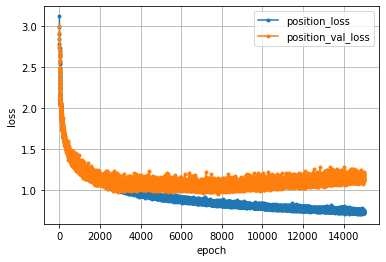

In [101]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

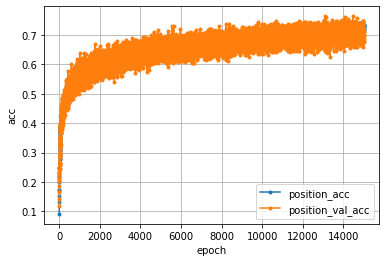

In [102]:
# 学習経過の可視化(位置)
position_acc     = position_history.history['accuracy']
position_val_acc = position_history.history['val_accuracy']

nb_epoch = len(position_acc)
plt.plot(range(nb_epoch), position_acc,     marker='.', label='position_acc')
plt.plot(range(nb_epoch), position_val_acc, marker='.', label='position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [103]:
#位置ごとの推定精度の確認
position_predict = position_model.predict(position_x_test).argmax(axis=1)
position_x_test = position_x_test.reshape(-1, 50)
position_one_data = position_one_data.tolist()
position_two_data = position_two_data.tolist()
position_three_data = position_three_data.tolist()
position_four_data = position_four_data.tolist()
position_five_data = position_five_data.tolist()
position_x_test = position_x_test.tolist()
position_answer = position_y_test.argmax(axis=1)
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(position_predict)):
    if position_x_test[i] in (position_one_data):
        one_total = one_total + 1
        if position_predict[i] == position_answer[i]:
            one_ok = one_ok + 1
    if position_x_test[i] in (position_two_data):
        two_total = two_total + 1
        if position_predict[i] == position_answer[i]:
            two_ok = two_ok + 1
    if position_x_test[i] in (position_three_data):
        three_total = three_total + 1
        if position_predict[i] == position_answer[i]:
            three_ok = three_ok + 1
    if position_x_test[i] in (position_four_data):
        four_total = four_total + 1
        if position_predict[i] == position_answer[i]:
            four_ok = four_ok + 1
    if position_x_test[i] in (position_five_data):
        five_total = five_total + 1
        if position_predict[i] == position_answer[i]:
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.46511627906976744
大きさ2の正答率：0.6555819477434679
大きさ3の正答率：0.8034825870646766
大きさ4の正答率：0.8177215189873418
大きさ5の正答率：0.862796833773087


In [112]:
# 学習(位置)
epochs = 4000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/4000
8108/8108 [==============================] - 0s 46us/step - loss: 3.1274 - accuracy: 0.0892 - val_loss: 3.0372 - val_accuracy: 0.1510
Epoch 2/4000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9917 - accuracy: 0.1389 - val_loss: 2.9352 - val_accuracy: 0.1441
Epoch 3/4000
8108/8108 [==============================] - 0s 32us/step - loss: 2.9003 - accuracy: 0.1568 - val_loss: 2.8479 - val_accuracy: 0.1929
Epoch 4/4000
8108/8108 [==============================] - 0s 38us/step - loss: 2.8247 - accuracy: 0.1743 - val_loss: 2.7885 - val_accuracy: 0.1638
Epoch 5/4000
8108/8108 [==============================] - 0s 37us/step - loss: 2.7720 - accuracy: 0.1811 - val_loss: 2.7604 - val_accuracy: 0.2062
Epoch 6/4000
8108/8108 [==============================] - 0s 33us/step - loss: 2.7154 - accuracy: 0.2073 - val_loss: 2.7207 - val_accuracy: 0.1894
Epoch 7/4000
8108/8108 [==============================] - 0s 31us/step

8108/8108 [==============================] - 0s 34us/step - loss: 2.0005 - accuracy: 0.3943 - val_loss: 2.0358 - val_accuracy: 0.3592
Epoch 57/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.9899 - accuracy: 0.3818 - val_loss: 1.9863 - val_accuracy: 0.3996
Epoch 58/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.9823 - accuracy: 0.3999 - val_loss: 2.0072 - val_accuracy: 0.3764
Epoch 59/4000
8108/8108 [==============================] - 0s 34us/step - loss: 1.9764 - accuracy: 0.3969 - val_loss: 1.9733 - val_accuracy: 0.3799
Epoch 60/4000
8108/8108 [==============================] - 0s 33us/step - loss: 1.9575 - accuracy: 0.3996 - val_loss: 1.9784 - val_accuracy: 0.4139
Epoch 61/4000
8108/8108 [==============================] - 0s 35us/step - loss: 1.9580 - accuracy: 0.4069 - val_loss: 1.9713 - val_accuracy: 0.3700
Epoch 62/4000
8108/8108 [==============================] - 0s 33us/step - loss: 1.9375 - accuracy: 0.4151 - val_loss: 2.0067 -

8108/8108 [==============================] - 0s 31us/step - loss: 1.7098 - accuracy: 0.4597 - val_loss: 1.7773 - val_accuracy: 0.4440
Epoch 167/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.7178 - accuracy: 0.4517 - val_loss: 1.8639 - val_accuracy: 0.4085
Epoch 168/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7155 - accuracy: 0.4581 - val_loss: 1.6955 - val_accuracy: 0.4741
Epoch 169/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6786 - accuracy: 0.4730 - val_loss: 1.8076 - val_accuracy: 0.4055
Epoch 170/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6900 - accuracy: 0.4692 - val_loss: 1.8024 - val_accuracy: 0.4238
Epoch 171/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7141 - accuracy: 0.4530 - val_loss: 1.7499 - val_accuracy: 0.4401
Epoch 172/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.6933 - accuracy: 0.4557 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.6193 - accuracy: 0.4864 - val_loss: 1.6785 - val_accuracy: 0.4391
Epoch 222/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6467 - accuracy: 0.4611 - val_loss: 1.6542 - val_accuracy: 0.4642
Epoch 223/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6273 - accuracy: 0.4697 - val_loss: 1.7013 - val_accuracy: 0.4608
Epoch 224/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6371 - accuracy: 0.4746 - val_loss: 1.7452 - val_accuracy: 0.4692
Epoch 225/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6455 - accuracy: 0.4771 - val_loss: 1.7152 - val_accuracy: 0.4687
Epoch 226/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6250 - accuracy: 0.4792 - val_loss: 1.6463 - val_accuracy: 0.4899
Epoch 227/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6178 - accuracy: 0.4794 - val_loss: 1.

8108/8108 [==============================] - 0s 33us/step - loss: 1.5664 - accuracy: 0.4914 - val_loss: 1.6474 - val_accuracy: 0.4401
Epoch 277/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.5660 - accuracy: 0.4979 - val_loss: 1.6281 - val_accuracy: 0.4800
Epoch 278/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5773 - accuracy: 0.4837 - val_loss: 1.6252 - val_accuracy: 0.4608
Epoch 279/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5651 - accuracy: 0.4959 - val_loss: 1.6409 - val_accuracy: 0.4756
Epoch 280/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5657 - accuracy: 0.4926 - val_loss: 1.6394 - val_accuracy: 0.4672
Epoch 281/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5729 - accuracy: 0.4851 - val_loss: 1.6585 - val_accuracy: 0.4667
Epoch 282/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5841 - accuracy: 0.4805 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.5207 - accuracy: 0.5028 - val_loss: 1.5810 - val_accuracy: 0.4667
Epoch 332/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5520 - accuracy: 0.4920 - val_loss: 1.6000 - val_accuracy: 0.4958
Epoch 333/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.5161 - accuracy: 0.4993 - val_loss: 1.5817 - val_accuracy: 0.5106
Epoch 334/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5167 - accuracy: 0.4959 - val_loss: 1.6153 - val_accuracy: 0.4558
Epoch 335/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5389 - accuracy: 0.4882 - val_loss: 1.6772 - val_accuracy: 0.4741
Epoch 336/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5484 - accuracy: 0.4932 - val_loss: 1.6131 - val_accuracy: 0.4884
Epoch 337/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5428 - accuracy: 0.4872 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.4870 - accuracy: 0.5053 - val_loss: 1.5160 - val_accuracy: 0.5683
Epoch 387/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4859 - accuracy: 0.5144 - val_loss: 1.5585 - val_accuracy: 0.4845
Epoch 388/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5037 - accuracy: 0.5005 - val_loss: 1.5770 - val_accuracy: 0.4539
Epoch 389/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4958 - accuracy: 0.5084 - val_loss: 1.5729 - val_accuracy: 0.4998
Epoch 390/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4917 - accuracy: 0.5037 - val_loss: 1.5433 - val_accuracy: 0.4830
Epoch 391/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4787 - accuracy: 0.5102 - val_loss: 1.5546 - val_accuracy: 0.4785
Epoch 392/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4937 - accuracy: 0.5069 - val_loss: 1.

8108/8108 [==============================] - 0s 33us/step - loss: 1.4536 - accuracy: 0.5181 - val_loss: 1.5092 - val_accuracy: 0.4933
Epoch 442/4000
8108/8108 [==============================] - 0s 34us/step - loss: 1.4462 - accuracy: 0.5205 - val_loss: 1.5461 - val_accuracy: 0.4628
Epoch 443/4000
8108/8108 [==============================] - 0s 35us/step - loss: 1.4504 - accuracy: 0.5076 - val_loss: 1.5247 - val_accuracy: 0.5047
Epoch 444/4000
8108/8108 [==============================] - 0s 34us/step - loss: 1.4443 - accuracy: 0.5254 - val_loss: 1.4833 - val_accuracy: 0.4904
Epoch 445/4000
8108/8108 [==============================] - 0s 34us/step - loss: 1.4437 - accuracy: 0.5116 - val_loss: 1.4860 - val_accuracy: 0.5047
Epoch 446/4000
8108/8108 [==============================] - 0s 34us/step - loss: 1.4463 - accuracy: 0.5220 - val_loss: 1.5354 - val_accuracy: 0.5308
Epoch 447/4000
8108/8108 [==============================] - 0s 40us/step - loss: 1.4686 - accuracy: 0.5102 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.4275 - accuracy: 0.5176 - val_loss: 1.4785 - val_accuracy: 0.4933
Epoch 497/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4316 - accuracy: 0.5115 - val_loss: 1.4817 - val_accuracy: 0.5190
Epoch 498/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4107 - accuracy: 0.5264 - val_loss: 1.4788 - val_accuracy: 0.5037
Epoch 499/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4095 - accuracy: 0.5232 - val_loss: 1.4867 - val_accuracy: 0.4983
Epoch 500/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4349 - accuracy: 0.5252 - val_loss: 1.4919 - val_accuracy: 0.4864
Epoch 501/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4103 - accuracy: 0.5323 - val_loss: 1.4369 - val_accuracy: 0.5486
Epoch 502/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4041 - accuracy: 0.5342 - val_loss: 1.

8108/8108 [==============================] - 0s 35us/step - loss: 1.3947 - accuracy: 0.5332 - val_loss: 1.4593 - val_accuracy: 0.4958
Epoch 552/4000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3992 - accuracy: 0.5216 - val_loss: 1.4950 - val_accuracy: 0.4766
Epoch 553/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.3968 - accuracy: 0.5279 - val_loss: 1.4892 - val_accuracy: 0.5185
Epoch 554/4000
8108/8108 [==============================] - 0s 33us/step - loss: 1.4218 - accuracy: 0.5139 - val_loss: 1.5278 - val_accuracy: 0.4815
Epoch 555/4000
8108/8108 [==============================] - 0s 35us/step - loss: 1.4082 - accuracy: 0.5260 - val_loss: 1.4347 - val_accuracy: 0.5091
Epoch 556/4000
8108/8108 [==============================] - 0s 37us/step - loss: 1.3958 - accuracy: 0.5278 - val_loss: 1.4707 - val_accuracy: 0.5160
Epoch 557/4000
8108/8108 [==============================] - 0s 34us/step - loss: 1.4039 - accuracy: 0.5329 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.3947 - accuracy: 0.5326 - val_loss: 1.4630 - val_accuracy: 0.4746
Epoch 607/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3574 - accuracy: 0.5469 - val_loss: 1.4370 - val_accuracy: 0.5150
Epoch 608/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3983 - accuracy: 0.5260 - val_loss: 1.4215 - val_accuracy: 0.5333
Epoch 609/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3708 - accuracy: 0.5428 - val_loss: 1.4169 - val_accuracy: 0.5200
Epoch 610/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3577 - accuracy: 0.5369 - val_loss: 1.4780 - val_accuracy: 0.5116
Epoch 611/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3713 - accuracy: 0.5339 - val_loss: 1.4106 - val_accuracy: 0.5506
Epoch 612/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3721 - accuracy: 0.5409 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.3415 - accuracy: 0.5454 - val_loss: 1.3859 - val_accuracy: 0.5392
Epoch 662/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3654 - accuracy: 0.5371 - val_loss: 1.4063 - val_accuracy: 0.5205
Epoch 663/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3468 - accuracy: 0.5370 - val_loss: 1.4320 - val_accuracy: 0.4869
Epoch 664/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3489 - accuracy: 0.5311 - val_loss: 1.4399 - val_accuracy: 0.4978
Epoch 665/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3579 - accuracy: 0.5307 - val_loss: 1.4547 - val_accuracy: 0.5072
Epoch 666/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.3471 - accuracy: 0.5421 - val_loss: 1.4131 - val_accuracy: 0.5313
Epoch 667/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3551 - accuracy: 0.5384 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.3286 - accuracy: 0.5516 - val_loss: 1.4758 - val_accuracy: 0.4963
Epoch 717/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3403 - accuracy: 0.5458 - val_loss: 1.4102 - val_accuracy: 0.5397
Epoch 718/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3400 - accuracy: 0.5368 - val_loss: 1.3723 - val_accuracy: 0.5417
Epoch 719/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3181 - accuracy: 0.5549 - val_loss: 1.3796 - val_accuracy: 0.5698
Epoch 720/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3408 - accuracy: 0.5356 - val_loss: 1.4409 - val_accuracy: 0.5131
Epoch 721/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3159 - accuracy: 0.5553 - val_loss: 1.4028 - val_accuracy: 0.5200
Epoch 722/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3340 - accuracy: 0.5407 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.3358 - accuracy: 0.5402 - val_loss: 1.5008 - val_accuracy: 0.5269
Epoch 772/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3382 - accuracy: 0.5465 - val_loss: 1.4929 - val_accuracy: 0.4736
Epoch 773/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3422 - accuracy: 0.5408 - val_loss: 1.3520 - val_accuracy: 0.5323
Epoch 774/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3283 - accuracy: 0.5465 - val_loss: 1.3738 - val_accuracy: 0.5624
Epoch 775/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3023 - accuracy: 0.5503 - val_loss: 1.3650 - val_accuracy: 0.5525
Epoch 776/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3002 - accuracy: 0.5550 - val_loss: 1.4106 - val_accuracy: 0.5328
Epoch 777/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3169 - accuracy: 0.5480 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.3320 - accuracy: 0.5347 - val_loss: 1.3850 - val_accuracy: 0.5200
Epoch 827/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3045 - accuracy: 0.5458 - val_loss: 1.3802 - val_accuracy: 0.5368
Epoch 828/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2964 - accuracy: 0.5602 - val_loss: 1.3691 - val_accuracy: 0.5427
Epoch 829/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2825 - accuracy: 0.5645 - val_loss: 1.4030 - val_accuracy: 0.4958
Epoch 830/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3018 - accuracy: 0.5530 - val_loss: 1.3933 - val_accuracy: 0.5496
Epoch 831/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3016 - accuracy: 0.5539 - val_loss: 1.4141 - val_accuracy: 0.5392
Epoch 832/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3120 - accuracy: 0.5459 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.2658 - accuracy: 0.5666 - val_loss: 1.3483 - val_accuracy: 0.5210
Epoch 882/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2952 - accuracy: 0.5516 - val_loss: 1.3586 - val_accuracy: 0.5550
Epoch 883/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2783 - accuracy: 0.5538 - val_loss: 1.3461 - val_accuracy: 0.5501
Epoch 884/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2775 - accuracy: 0.5615 - val_loss: 1.4352 - val_accuracy: 0.4884
Epoch 885/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3109 - accuracy: 0.5463 - val_loss: 1.3972 - val_accuracy: 0.5234
Epoch 886/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2749 - accuracy: 0.5585 - val_loss: 1.3496 - val_accuracy: 0.5037
Epoch 887/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2868 - accuracy: 0.5591 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.2735 - accuracy: 0.5535 - val_loss: 1.3282 - val_accuracy: 0.5392
Epoch 937/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2741 - accuracy: 0.5635 - val_loss: 1.3850 - val_accuracy: 0.5668
Epoch 938/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2876 - accuracy: 0.5495 - val_loss: 1.3635 - val_accuracy: 0.5377
Epoch 939/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2843 - accuracy: 0.5534 - val_loss: 1.3316 - val_accuracy: 0.5224
Epoch 940/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2608 - accuracy: 0.5665 - val_loss: 1.3070 - val_accuracy: 0.5683
Epoch 941/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2659 - accuracy: 0.5565 - val_loss: 1.3389 - val_accuracy: 0.5392
Epoch 942/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2629 - accuracy: 0.5607 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.2517 - accuracy: 0.5689 - val_loss: 1.3721 - val_accuracy: 0.5525
Epoch 992/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2657 - accuracy: 0.5602 - val_loss: 1.3505 - val_accuracy: 0.5767
Epoch 993/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2540 - accuracy: 0.5651 - val_loss: 1.3104 - val_accuracy: 0.5580
Epoch 994/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2533 - accuracy: 0.5699 - val_loss: 1.3742 - val_accuracy: 0.5323
Epoch 995/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2583 - accuracy: 0.5657 - val_loss: 1.3660 - val_accuracy: 0.5032
Epoch 996/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2592 - accuracy: 0.5661 - val_loss: 1.3660 - val_accuracy: 0.5111
Epoch 997/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2615 - accuracy: 0.5620 - val_loss: 1.

Epoch 1046/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2728 - accuracy: 0.5638 - val_loss: 1.3382 - val_accuracy: 0.5407
Epoch 1047/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2447 - accuracy: 0.5673 - val_loss: 1.4494 - val_accuracy: 0.5022
Epoch 1048/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2669 - accuracy: 0.5601 - val_loss: 1.3082 - val_accuracy: 0.5683
Epoch 1049/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2436 - accuracy: 0.5715 - val_loss: 1.3624 - val_accuracy: 0.5343
Epoch 1050/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2732 - accuracy: 0.5509 - val_loss: 1.2813 - val_accuracy: 0.5782
Epoch 1051/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2535 - accuracy: 0.5735 - val_loss: 1.3102 - val_accuracy: 0.5688
Epoch 1052/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2581 - accuracy:

Epoch 1155/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2354 - accuracy: 0.5713 - val_loss: 1.3556 - val_accuracy: 0.5086
Epoch 1156/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2355 - accuracy: 0.5715 - val_loss: 1.3299 - val_accuracy: 0.5604
Epoch 1157/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2175 - accuracy: 0.5829 - val_loss: 1.3315 - val_accuracy: 0.5619
Epoch 1158/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2371 - accuracy: 0.5631 - val_loss: 1.3786 - val_accuracy: 0.5141
Epoch 1159/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2291 - accuracy: 0.5638 - val_loss: 1.3116 - val_accuracy: 0.5816
Epoch 1160/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2373 - accuracy: 0.5734 - val_loss: 1.3207 - val_accuracy: 0.5535
Epoch 1161/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2118 - accuracy:

Epoch 1264/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2530 - accuracy: 0.5717 - val_loss: 1.2966 - val_accuracy: 0.5501
Epoch 1265/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2077 - accuracy: 0.5694 - val_loss: 1.2851 - val_accuracy: 0.5348
Epoch 1266/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2132 - accuracy: 0.5782 - val_loss: 1.3121 - val_accuracy: 0.5590
Epoch 1267/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2103 - accuracy: 0.5792 - val_loss: 1.3199 - val_accuracy: 0.5422
Epoch 1268/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2136 - accuracy: 0.5819 - val_loss: 1.2790 - val_accuracy: 0.5417
Epoch 1269/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2056 - accuracy: 0.5800 - val_loss: 1.3359 - val_accuracy: 0.5372
Epoch 1270/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2064 - accuracy:

Epoch 1373/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1747 - accuracy: 0.5904 - val_loss: 1.3584 - val_accuracy: 0.5481
Epoch 1374/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1795 - accuracy: 0.5860 - val_loss: 1.2582 - val_accuracy: 0.5960
Epoch 1375/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1643 - accuracy: 0.5936 - val_loss: 1.2811 - val_accuracy: 0.5476
Epoch 1376/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1734 - accuracy: 0.5905 - val_loss: 1.2966 - val_accuracy: 0.5540
Epoch 1377/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2225 - accuracy: 0.5633 - val_loss: 1.2710 - val_accuracy: 0.5506
Epoch 1378/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1884 - accuracy: 0.5762 - val_loss: 1.2781 - val_accuracy: 0.5688
Epoch 1379/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1795 - accuracy:

Epoch 1482/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1602 - accuracy: 0.5924 - val_loss: 1.3070 - val_accuracy: 0.5545
Epoch 1483/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1806 - accuracy: 0.5837 - val_loss: 1.2379 - val_accuracy: 0.5629
Epoch 1484/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1616 - accuracy: 0.5923 - val_loss: 1.2678 - val_accuracy: 0.5535
Epoch 1485/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1818 - accuracy: 0.5805 - val_loss: 1.2524 - val_accuracy: 0.5678
Epoch 1486/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1520 - accuracy: 0.5918 - val_loss: 1.2368 - val_accuracy: 0.5560
Epoch 1487/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1731 - accuracy: 0.5767 - val_loss: 1.2380 - val_accuracy: 0.5688
Epoch 1488/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1779 - accuracy:

Epoch 1591/4000
8108/8108 [==============================] - 0s 27us/step - loss: 1.1476 - accuracy: 0.5950 - val_loss: 1.2141 - val_accuracy: 0.5910
Epoch 1592/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1576 - accuracy: 0.5910 - val_loss: 1.2703 - val_accuracy: 0.5930
Epoch 1593/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1568 - accuracy: 0.5860 - val_loss: 1.2465 - val_accuracy: 0.5590
Epoch 1594/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1406 - accuracy: 0.5958 - val_loss: 1.2020 - val_accuracy: 0.5920
Epoch 1595/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1616 - accuracy: 0.5898 - val_loss: 1.2325 - val_accuracy: 0.5984
Epoch 1596/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1531 - accuracy: 0.5924 - val_loss: 1.2694 - val_accuracy: 0.5412
Epoch 1597/4000
8108/8108 [==============================] - 0s 27us/step - loss: 1.1652 - accuracy:

Epoch 1700/4000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1379 - accuracy: 0.5985 - val_loss: 1.2328 - val_accuracy: 0.5762
Epoch 1701/4000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1505 - accuracy: 0.5902 - val_loss: 1.2614 - val_accuracy: 0.5520
Epoch 1702/4000
8108/8108 [==============================] - 0s 35us/step - loss: 1.1296 - accuracy: 0.5947 - val_loss: 1.2980 - val_accuracy: 0.5461
Epoch 1703/4000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1482 - accuracy: 0.5935 - val_loss: 1.2261 - val_accuracy: 0.5728
Epoch 1704/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1470 - accuracy: 0.5925 - val_loss: 1.2439 - val_accuracy: 0.5792
Epoch 1705/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1497 - accuracy: 0.5955 - val_loss: 1.4180 - val_accuracy: 0.5190
Epoch 1706/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1377 - accuracy:

Epoch 1809/4000
8108/8108 [==============================] - 0s 38us/step - loss: 1.1126 - accuracy: 0.6071 - val_loss: 1.1762 - val_accuracy: 0.6167
Epoch 1810/4000
8108/8108 [==============================] - 0s 40us/step - loss: 1.1219 - accuracy: 0.6003 - val_loss: 1.2403 - val_accuracy: 0.5890
Epoch 1811/4000
8108/8108 [==============================] - 0s 36us/step - loss: 1.1322 - accuracy: 0.6030 - val_loss: 1.1886 - val_accuracy: 0.5994
Epoch 1812/4000
8108/8108 [==============================] - 0s 36us/step - loss: 1.1241 - accuracy: 0.5983 - val_loss: 1.2040 - val_accuracy: 0.6068
Epoch 1813/4000
8108/8108 [==============================] - 0s 38us/step - loss: 1.1083 - accuracy: 0.6132 - val_loss: 1.1977 - val_accuracy: 0.5816
Epoch 1814/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1421 - accuracy: 0.5892 - val_loss: 1.3039 - val_accuracy: 0.5644
Epoch 1815/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1371 - accuracy:

Epoch 1918/4000
8108/8108 [==============================] - 0s 35us/step - loss: 1.1110 - accuracy: 0.6045 - val_loss: 1.1816 - val_accuracy: 0.6098
Epoch 1919/4000
8108/8108 [==============================] - 0s 35us/step - loss: 1.1052 - accuracy: 0.6027 - val_loss: 1.2428 - val_accuracy: 0.5886
Epoch 1920/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1142 - accuracy: 0.6058 - val_loss: 1.2677 - val_accuracy: 0.5851
Epoch 1921/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1320 - accuracy: 0.5951 - val_loss: 1.3305 - val_accuracy: 0.5382
Epoch 1922/4000
8108/8108 [==============================] - 0s 35us/step - loss: 1.1296 - accuracy: 0.5985 - val_loss: 1.2167 - val_accuracy: 0.5762
Epoch 1923/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1002 - accuracy: 0.6119 - val_loss: 1.2485 - val_accuracy: 0.5624
Epoch 1924/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1168 - accuracy:

Epoch 2027/4000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1020 - accuracy: 0.6009 - val_loss: 1.2160 - val_accuracy: 0.5713
Epoch 2028/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0889 - accuracy: 0.6168 - val_loss: 1.1820 - val_accuracy: 0.5930
Epoch 2029/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0839 - accuracy: 0.6141 - val_loss: 1.1780 - val_accuracy: 0.6127
Epoch 2030/4000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0941 - accuracy: 0.6196 - val_loss: 1.2800 - val_accuracy: 0.5831
Epoch 2031/4000
8108/8108 [==============================] - 0s 37us/step - loss: 1.1085 - accuracy: 0.6029 - val_loss: 1.1950 - val_accuracy: 0.5969
Epoch 2032/4000
8108/8108 [==============================] - 0s 43us/step - loss: 1.0989 - accuracy: 0.6154 - val_loss: 1.2381 - val_accuracy: 0.5915
Epoch 2033/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0921 - accuracy:

Epoch 2136/4000
8108/8108 [==============================] - 0s 46us/step - loss: 1.1023 - accuracy: 0.6026 - val_loss: 1.2911 - val_accuracy: 0.5560
Epoch 2137/4000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0898 - accuracy: 0.6132 - val_loss: 1.2235 - val_accuracy: 0.5644
Epoch 2138/4000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1034 - accuracy: 0.5969 - val_loss: 1.2009 - val_accuracy: 0.5900
Epoch 2139/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1014 - accuracy: 0.6047 - val_loss: 1.1894 - val_accuracy: 0.6048
Epoch 2140/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0871 - accuracy: 0.6163 - val_loss: 1.2002 - val_accuracy: 0.5841
Epoch 2141/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0974 - accuracy: 0.6078 - val_loss: 1.1841 - val_accuracy: 0.6053
Epoch 2142/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1002 - accuracy:

Epoch 2245/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0582 - accuracy: 0.6225 - val_loss: 1.1362 - val_accuracy: 0.6236
Epoch 2246/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0594 - accuracy: 0.6275 - val_loss: 1.2088 - val_accuracy: 0.5861
Epoch 2247/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0822 - accuracy: 0.6119 - val_loss: 1.1748 - val_accuracy: 0.6063
Epoch 2248/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0781 - accuracy: 0.6174 - val_loss: 1.2060 - val_accuracy: 0.5683
Epoch 2249/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0973 - accuracy: 0.6084 - val_loss: 1.1637 - val_accuracy: 0.6053
Epoch 2250/4000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0725 - accuracy: 0.6162 - val_loss: 1.1685 - val_accuracy: 0.5930
Epoch 2251/4000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0704 - accuracy:

Epoch 2354/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0881 - accuracy: 0.6090 - val_loss: 1.2075 - val_accuracy: 0.5728
Epoch 2355/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0719 - accuracy: 0.6133 - val_loss: 1.1600 - val_accuracy: 0.6177
Epoch 2356/4000
8108/8108 [==============================] - 0s 38us/step - loss: 1.0570 - accuracy: 0.6158 - val_loss: 1.2335 - val_accuracy: 0.5624
Epoch 2357/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0757 - accuracy: 0.6083 - val_loss: 1.2079 - val_accuracy: 0.5713
Epoch 2358/4000
8108/8108 [==============================] - 0s 39us/step - loss: 1.0655 - accuracy: 0.6233 - val_loss: 1.2212 - val_accuracy: 0.5826
Epoch 2359/4000
8108/8108 [==============================] - 0s 43us/step - loss: 1.0436 - accuracy: 0.6328 - val_loss: 1.1293 - val_accuracy: 0.6256
Epoch 2360/4000
8108/8108 [==============================] - 0s 45us/step - loss: 1.0836 - accuracy:

Epoch 2463/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0681 - accuracy: 0.6179 - val_loss: 1.1742 - val_accuracy: 0.6186
Epoch 2464/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0504 - accuracy: 0.6203 - val_loss: 1.1658 - val_accuracy: 0.5797
Epoch 2465/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0728 - accuracy: 0.6172 - val_loss: 1.2046 - val_accuracy: 0.5994
Epoch 2466/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0499 - accuracy: 0.6275 - val_loss: 1.1819 - val_accuracy: 0.6053
Epoch 2467/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0654 - accuracy: 0.6227 - val_loss: 1.2359 - val_accuracy: 0.5629
Epoch 2468/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0451 - accuracy: 0.6211 - val_loss: 1.2024 - val_accuracy: 0.6117
Epoch 2469/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0521 - accuracy:

Epoch 2572/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0612 - accuracy: 0.6191 - val_loss: 1.1728 - val_accuracy: 0.5807
Epoch 2573/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0414 - accuracy: 0.6267 - val_loss: 1.1348 - val_accuracy: 0.6073
Epoch 2574/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0552 - accuracy: 0.6265 - val_loss: 1.1611 - val_accuracy: 0.5964
Epoch 2575/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0606 - accuracy: 0.6198 - val_loss: 1.1790 - val_accuracy: 0.5629
Epoch 2576/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0551 - accuracy: 0.6194 - val_loss: 1.1608 - val_accuracy: 0.6024
Epoch 2577/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0441 - accuracy: 0.6220 - val_loss: 1.1366 - val_accuracy: 0.6226
Epoch 2578/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0471 - accuracy:

Epoch 2681/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0379 - accuracy: 0.6277 - val_loss: 1.1118 - val_accuracy: 0.6147
Epoch 2682/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0544 - accuracy: 0.6203 - val_loss: 1.1861 - val_accuracy: 0.5792
Epoch 2683/4000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0466 - accuracy: 0.6203 - val_loss: 1.1522 - val_accuracy: 0.5935
Epoch 2684/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0872 - accuracy: 0.6103 - val_loss: 1.2309 - val_accuracy: 0.5525
Epoch 2685/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0492 - accuracy: 0.6200 - val_loss: 1.2058 - val_accuracy: 0.5713
Epoch 2686/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0628 - accuracy: 0.6184 - val_loss: 1.1659 - val_accuracy: 0.6053
Epoch 2687/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0404 - accuracy:

Epoch 2790/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0427 - accuracy: 0.6254 - val_loss: 1.1466 - val_accuracy: 0.6349
Epoch 2791/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0290 - accuracy: 0.6280 - val_loss: 1.1716 - val_accuracy: 0.5964
Epoch 2792/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0302 - accuracy: 0.6281 - val_loss: 1.1445 - val_accuracy: 0.6147
Epoch 2793/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0214 - accuracy: 0.6331 - val_loss: 1.1237 - val_accuracy: 0.6241
Epoch 2794/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0330 - accuracy: 0.6363 - val_loss: 1.1085 - val_accuracy: 0.6330
Epoch 2795/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0513 - accuracy: 0.6193 - val_loss: 1.1881 - val_accuracy: 0.6078
Epoch 2796/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0474 - accuracy:

Epoch 2899/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0070 - accuracy: 0.6400 - val_loss: 1.1009 - val_accuracy: 0.6330
Epoch 2900/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0117 - accuracy: 0.6365 - val_loss: 1.1530 - val_accuracy: 0.6162
Epoch 2901/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0239 - accuracy: 0.6286 - val_loss: 1.2074 - val_accuracy: 0.5930
Epoch 2902/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0361 - accuracy: 0.6275 - val_loss: 1.1340 - val_accuracy: 0.6009
Epoch 2903/4000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0418 - accuracy: 0.6238 - val_loss: 1.1444 - val_accuracy: 0.6280
Epoch 2904/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0113 - accuracy: 0.6376 - val_loss: 1.1476 - val_accuracy: 0.6177
Epoch 2905/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0261 - accuracy:

Epoch 3008/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0204 - accuracy: 0.6395 - val_loss: 1.1770 - val_accuracy: 0.6152
Epoch 3009/4000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0096 - accuracy: 0.6368 - val_loss: 1.1180 - val_accuracy: 0.6408
Epoch 3010/4000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0402 - accuracy: 0.6279 - val_loss: 1.2083 - val_accuracy: 0.5782
Epoch 3011/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0120 - accuracy: 0.6360 - val_loss: 1.1745 - val_accuracy: 0.5969
Epoch 3012/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0276 - accuracy: 0.6265 - val_loss: 1.1259 - val_accuracy: 0.6063
Epoch 3013/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0136 - accuracy: 0.6390 - val_loss: 1.1861 - val_accuracy: 0.6127
Epoch 3014/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0480 - accuracy:

Epoch 3117/4000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9882 - accuracy: 0.6428 - val_loss: 1.1098 - val_accuracy: 0.6211
Epoch 3118/4000
8108/8108 [==============================] - 0s 41us/step - loss: 1.0220 - accuracy: 0.6322 - val_loss: 1.1428 - val_accuracy: 0.5886
Epoch 3119/4000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0204 - accuracy: 0.6265 - val_loss: 1.1509 - val_accuracy: 0.6112
Epoch 3120/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0020 - accuracy: 0.6325 - val_loss: 1.1562 - val_accuracy: 0.5969
Epoch 3121/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0315 - accuracy: 0.6280 - val_loss: 1.1474 - val_accuracy: 0.6078
Epoch 3122/4000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0068 - accuracy: 0.6330 - val_loss: 1.1242 - val_accuracy: 0.6019
Epoch 3123/4000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0156 - accuracy:

Epoch 3226/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9948 - accuracy: 0.6416 - val_loss: 1.1480 - val_accuracy: 0.6186
Epoch 3227/4000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0289 - accuracy: 0.6310 - val_loss: 1.1681 - val_accuracy: 0.6088
Epoch 3228/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0179 - accuracy: 0.6327 - val_loss: 1.1482 - val_accuracy: 0.6256
Epoch 3229/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0088 - accuracy: 0.6283 - val_loss: 1.2003 - val_accuracy: 0.5950
Epoch 3230/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0086 - accuracy: 0.6376 - val_loss: 1.1669 - val_accuracy: 0.6142
Epoch 3231/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0003 - accuracy: 0.6384 - val_loss: 1.1201 - val_accuracy: 0.6196
Epoch 3232/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9873 - accuracy:

Epoch 3335/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9962 - accuracy: 0.6412 - val_loss: 1.1582 - val_accuracy: 0.5861
Epoch 3336/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9990 - accuracy: 0.6341 - val_loss: 1.0998 - val_accuracy: 0.6300
Epoch 3337/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9934 - accuracy: 0.6412 - val_loss: 1.1562 - val_accuracy: 0.6053
Epoch 3338/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0106 - accuracy: 0.6413 - val_loss: 1.1405 - val_accuracy: 0.6147
Epoch 3339/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9951 - accuracy: 0.6327 - val_loss: 1.1698 - val_accuracy: 0.5861
Epoch 3340/4000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0067 - accuracy: 0.6336 - val_loss: 1.1261 - val_accuracy: 0.6034
Epoch 3341/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9770 - accuracy:

Epoch 3444/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9576 - accuracy: 0.6542 - val_loss: 1.1212 - val_accuracy: 0.6226
Epoch 3445/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9703 - accuracy: 0.6491 - val_loss: 1.1125 - val_accuracy: 0.6571
Epoch 3446/4000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9723 - accuracy: 0.6484 - val_loss: 1.1105 - val_accuracy: 0.6339
Epoch 3447/4000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9888 - accuracy: 0.6457 - val_loss: 1.2545 - val_accuracy: 0.5599
Epoch 3448/4000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0134 - accuracy: 0.6376 - val_loss: 1.1145 - val_accuracy: 0.6152
Epoch 3449/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9844 - accuracy: 0.6452 - val_loss: 1.1180 - val_accuracy: 0.6251
Epoch 3450/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9960 - accuracy:

Epoch 3553/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9786 - accuracy: 0.6507 - val_loss: 1.2095 - val_accuracy: 0.5876
Epoch 3554/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9954 - accuracy: 0.6349 - val_loss: 1.1111 - val_accuracy: 0.6246
Epoch 3555/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9755 - accuracy: 0.6459 - val_loss: 1.1155 - val_accuracy: 0.6132
Epoch 3556/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9801 - accuracy: 0.6423 - val_loss: 1.0845 - val_accuracy: 0.6552
Epoch 3557/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9686 - accuracy: 0.6502 - val_loss: 1.1288 - val_accuracy: 0.6162
Epoch 3558/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9828 - accuracy: 0.6399 - val_loss: 1.0992 - val_accuracy: 0.6231
Epoch 3559/4000
8108/8108 [==============================] - 0s 43us/step - loss: 0.9874 - accuracy:

Epoch 3662/4000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9806 - accuracy: 0.6406 - val_loss: 1.1352 - val_accuracy: 0.6157
Epoch 3663/4000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9751 - accuracy: 0.6466 - val_loss: 1.0964 - val_accuracy: 0.6359
Epoch 3664/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9712 - accuracy: 0.6576 - val_loss: 1.1690 - val_accuracy: 0.5989
Epoch 3665/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9904 - accuracy: 0.6384 - val_loss: 1.1046 - val_accuracy: 0.6231
Epoch 3666/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9751 - accuracy: 0.6482 - val_loss: 1.1484 - val_accuracy: 0.6117
Epoch 3667/4000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9571 - accuracy: 0.6524 - val_loss: 1.0927 - val_accuracy: 0.6295
Epoch 3668/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9842 - accuracy:

Epoch 3771/4000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0057 - accuracy: 0.6297 - val_loss: 1.0997 - val_accuracy: 0.6300
Epoch 3772/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9611 - accuracy: 0.6473 - val_loss: 1.1619 - val_accuracy: 0.6117
Epoch 3773/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9603 - accuracy: 0.6548 - val_loss: 1.0855 - val_accuracy: 0.6083
Epoch 3774/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9697 - accuracy: 0.6474 - val_loss: 1.1056 - val_accuracy: 0.6315
Epoch 3775/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9692 - accuracy: 0.6431 - val_loss: 1.1267 - val_accuracy: 0.6182
Epoch 3776/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9720 - accuracy: 0.6418 - val_loss: 1.0866 - val_accuracy: 0.6349
Epoch 3777/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9686 - accuracy:

Epoch 3880/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9476 - accuracy: 0.6501 - val_loss: 1.1403 - val_accuracy: 0.6034
Epoch 3881/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9606 - accuracy: 0.6508 - val_loss: 1.1101 - val_accuracy: 0.6453
Epoch 3882/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9710 - accuracy: 0.6487 - val_loss: 1.0977 - val_accuracy: 0.6408
Epoch 3883/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9709 - accuracy: 0.6471 - val_loss: 1.0884 - val_accuracy: 0.6542
Epoch 3884/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9586 - accuracy: 0.6471 - val_loss: 1.0871 - val_accuracy: 0.6147
Epoch 3885/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9452 - accuracy: 0.6576 - val_loss: 1.1247 - val_accuracy: 0.6137
Epoch 3886/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9452 - accuracy:

Epoch 3989/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9656 - accuracy: 0.6464 - val_loss: 1.0951 - val_accuracy: 0.6547
Epoch 3990/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9475 - accuracy: 0.6591 - val_loss: 1.0570 - val_accuracy: 0.6487
Epoch 3991/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9563 - accuracy: 0.6459 - val_loss: 1.0384 - val_accuracy: 0.6833
Epoch 3992/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9384 - accuracy: 0.6614 - val_loss: 1.0920 - val_accuracy: 0.6364
Epoch 3993/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9507 - accuracy: 0.6584 - val_loss: 1.1158 - val_accuracy: 0.6399
Epoch 3994/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9601 - accuracy: 0.6522 - val_loss: 1.0919 - val_accuracy: 0.6517
Epoch 3995/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9460 - accuracy:

In [113]:
# モデルの評価(位置)
position_score = position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

2027/2027 [==============================] - 0s 34us/step
Test loss: 1.1694730019181245
Test accuracy: 0.629008412361145


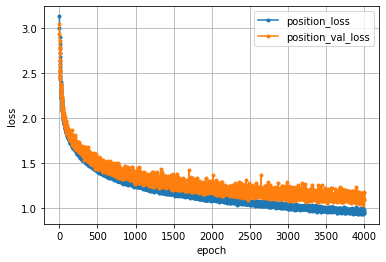

In [114]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

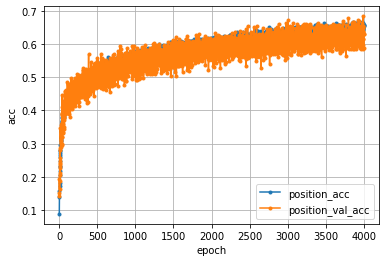

In [115]:
# 学習経過の可視化(位置)
position_acc     = position_history.history['accuracy']
position_val_acc = position_history.history['val_accuracy']

nb_epoch = len(position_acc)
plt.plot(range(nb_epoch), position_acc,     marker='.', label='position_acc')
plt.plot(range(nb_epoch), position_val_acc, marker='.', label='position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [116]:
#大きさごとの推定精度の確認
position_predict = position_model.predict(position_x_test).argmax(axis=1)
position_x_test = position_x_test.reshape(-1, 50)
position_one_data = position_one_data.tolist()
position_two_data = position_two_data.tolist()
position_three_data = position_three_data.tolist()
position_four_data = position_four_data.tolist()
position_five_data = position_five_data.tolist()
position_x_test = position_x_test.tolist()
position_answer = position_y_test.argmax(axis=1)
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(position_predict)):
    if position_x_test[i] in (position_one_data):
        one_total = one_total + 1
        if position_predict[i] == position_answer[i]:
            one_ok = one_ok + 1
    if position_x_test[i] in (position_two_data):
        two_total = two_total + 1
        if position_predict[i] == position_answer[i]:
            two_ok = two_ok + 1
    if position_x_test[i] in (position_three_data):
        three_total = three_total + 1
        if position_predict[i] == position_answer[i]:
            three_ok = three_ok + 1
    if position_x_test[i] in (position_four_data):
        four_total = four_total + 1
        if position_predict[i] == position_answer[i]:
            four_ok = four_ok + 1
    if position_x_test[i] in (position_five_data):
        five_total = five_total + 1
        if position_predict[i] == position_answer[i]:
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.36465324384787473
大きさ2の正答率：0.5675057208237986
大きさ3の正答率：0.736
大きさ4の正答率：0.7628865979381443
大きさ5の正答率：0.7684210526315789


Text(0, 0.5, 'position acc')

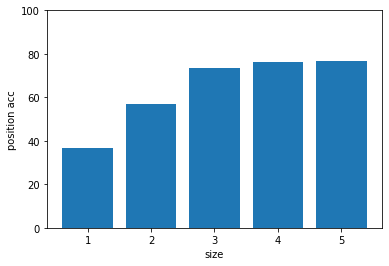

In [16]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([36.5, 56.8, 73.6, 76.3, 76.8])
plt.bar(left, height)
plt.ylim(bottom=0, top=100)
plt.xlabel("size")
plt.ylabel("position acc")

In [5]:
# 学習(位置)
epochs = 1000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/1000
8108/8108 [==============================] - 0s 62us/step - loss: 3.1063 - accuracy: 0.0860 - val_loss: 3.0466 - val_accuracy: 0.1130
Epoch 2/1000
8108/8108 [==============================] - 0s 29us/step - loss: 2.9729 - accuracy: 0.1410 - val_loss: 2.9268 - val_accuracy: 0.1603
Epoch 3/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.8796 - accuracy: 0.1616 - val_loss: 2.8587 - val_accuracy: 0.1815
Epoch 4/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.8092 - accuracy: 0.1792 - val_loss: 2.8175 - val_accuracy: 0.1722
Epoch 5/1000
8108/8108 [==============================] - 0s 28us/step - loss: 2.7539 - accuracy: 0.1954 - val_loss: 2.7511 - val_accuracy: 0.2309
Epoch 6/1000
8108/8108 [==============================] - 0s 29us/step - loss: 2.7027 - accuracy: 0.2068 - val_loss: 2.7007 - val_accuracy: 0.2018
Epoch 7/1000
8108/8108 [==============================] - 0s 29us/step

8108/8108 [==============================] - 0s 29us/step - loss: 1.9967 - accuracy: 0.3895 - val_loss: 2.0426 - val_accuracy: 0.3814
Epoch 57/1000
8108/8108 [==============================] - 0s 26us/step - loss: 2.0077 - accuracy: 0.3849 - val_loss: 2.0117 - val_accuracy: 0.4149
Epoch 58/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.9874 - accuracy: 0.4034 - val_loss: 2.0838 - val_accuracy: 0.3907
Epoch 59/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.9930 - accuracy: 0.3892 - val_loss: 2.0806 - val_accuracy: 0.3878
Epoch 60/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.9890 - accuracy: 0.3911 - val_loss: 1.9955 - val_accuracy: 0.3937
Epoch 61/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.9855 - accuracy: 0.3947 - val_loss: 2.0285 - val_accuracy: 0.3606
Epoch 62/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.9763 - accuracy: 0.3964 - val_loss: 2.0174 -

8108/8108 [==============================] - 0s 33us/step - loss: 1.7344 - accuracy: 0.4558 - val_loss: 1.7603 - val_accuracy: 0.4480
Epoch 167/1000
8108/8108 [==============================] - 0s 49us/step - loss: 1.7125 - accuracy: 0.4667 - val_loss: 1.7439 - val_accuracy: 0.4524
Epoch 168/1000
8108/8108 [==============================] - 0s 33us/step - loss: 1.7407 - accuracy: 0.4584 - val_loss: 1.8050 - val_accuracy: 0.4169
Epoch 169/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7408 - accuracy: 0.4491 - val_loss: 1.7452 - val_accuracy: 0.4608
Epoch 170/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.7120 - accuracy: 0.4656 - val_loss: 1.7327 - val_accuracy: 0.4613
Epoch 171/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7240 - accuracy: 0.4560 - val_loss: 1.7790 - val_accuracy: 0.4253
Epoch 172/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.7397 - accuracy: 0.4535 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.6654 - accuracy: 0.4690 - val_loss: 1.7072 - val_accuracy: 0.4445
Epoch 222/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6424 - accuracy: 0.4774 - val_loss: 1.6877 - val_accuracy: 0.4697
Epoch 223/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6475 - accuracy: 0.4634 - val_loss: 1.6964 - val_accuracy: 0.4509
Epoch 224/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6626 - accuracy: 0.4655 - val_loss: 1.6885 - val_accuracy: 0.4608
Epoch 225/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6491 - accuracy: 0.4767 - val_loss: 1.7711 - val_accuracy: 0.4021
Epoch 226/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6585 - accuracy: 0.4739 - val_loss: 1.6504 - val_accuracy: 0.4963
Epoch 227/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6673 - accuracy: 0.4613 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.6080 - accuracy: 0.4694 - val_loss: 1.6397 - val_accuracy: 0.4450
Epoch 277/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5957 - accuracy: 0.4877 - val_loss: 1.6474 - val_accuracy: 0.4840
Epoch 278/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5934 - accuracy: 0.4899 - val_loss: 1.7047 - val_accuracy: 0.4036
Epoch 279/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6126 - accuracy: 0.4732 - val_loss: 1.6326 - val_accuracy: 0.4652
Epoch 280/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5967 - accuracy: 0.4831 - val_loss: 1.6923 - val_accuracy: 0.4815
Epoch 281/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6010 - accuracy: 0.4853 - val_loss: 1.6848 - val_accuracy: 0.4258
Epoch 282/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6068 - accuracy: 0.4830 - val_loss: 1.

8108/8108 [==============================] - 0s 33us/step - loss: 1.5501 - accuracy: 0.4900 - val_loss: 1.5714 - val_accuracy: 0.4845
Epoch 332/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5534 - accuracy: 0.4906 - val_loss: 1.6305 - val_accuracy: 0.5007
Epoch 333/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5465 - accuracy: 0.4930 - val_loss: 1.5606 - val_accuracy: 0.4825
Epoch 334/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5323 - accuracy: 0.4975 - val_loss: 1.5894 - val_accuracy: 0.5289
Epoch 335/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5697 - accuracy: 0.4824 - val_loss: 1.6655 - val_accuracy: 0.4573
Epoch 336/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5461 - accuracy: 0.5019 - val_loss: 1.6384 - val_accuracy: 0.4736
Epoch 337/1000
8108/8108 [==============================] - 0s 34us/step - loss: 1.5649 - accuracy: 0.4869 - val_loss: 1.

8108/8108 [==============================] - 0s 43us/step - loss: 1.5138 - accuracy: 0.5030 - val_loss: 1.5653 - val_accuracy: 0.4761
Epoch 387/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5178 - accuracy: 0.4952 - val_loss: 1.5621 - val_accuracy: 0.5037
Epoch 388/1000
8108/8108 [==============================] - 0s 36us/step - loss: 1.4888 - accuracy: 0.5064 - val_loss: 1.5802 - val_accuracy: 0.4924
Epoch 389/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5000 - accuracy: 0.5011 - val_loss: 1.5585 - val_accuracy: 0.4899
Epoch 390/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4985 - accuracy: 0.4990 - val_loss: 1.5561 - val_accuracy: 0.5017
Epoch 391/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.5096 - accuracy: 0.5054 - val_loss: 1.5352 - val_accuracy: 0.5067
Epoch 392/1000
8108/8108 [==============================] - 0s 36us/step - loss: 1.5011 - accuracy: 0.5062 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.4791 - accuracy: 0.5063 - val_loss: 1.6088 - val_accuracy: 0.4835
Epoch 442/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4869 - accuracy: 0.5076 - val_loss: 1.4955 - val_accuracy: 0.5249
Epoch 443/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4606 - accuracy: 0.5100 - val_loss: 1.5779 - val_accuracy: 0.4884
Epoch 444/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4631 - accuracy: 0.5134 - val_loss: 1.5662 - val_accuracy: 0.4563
Epoch 445/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4854 - accuracy: 0.5019 - val_loss: 1.5479 - val_accuracy: 0.4805
Epoch 446/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4572 - accuracy: 0.5146 - val_loss: 1.5128 - val_accuracy: 0.4736
Epoch 447/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4840 - accuracy: 0.5025 - val_loss: 1.

8108/8108 [==============================] - 0s 33us/step - loss: 1.4562 - accuracy: 0.5102 - val_loss: 1.5220 - val_accuracy: 0.4761
Epoch 497/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4392 - accuracy: 0.5179 - val_loss: 1.4826 - val_accuracy: 0.5057
Epoch 498/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.4227 - accuracy: 0.5292 - val_loss: 1.4940 - val_accuracy: 0.4904
Epoch 499/1000
8108/8108 [==============================] - 0s 33us/step - loss: 1.4208 - accuracy: 0.5212 - val_loss: 1.4963 - val_accuracy: 0.4938
Epoch 500/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4180 - accuracy: 0.5268 - val_loss: 1.5235 - val_accuracy: 0.4924
Epoch 501/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4504 - accuracy: 0.5099 - val_loss: 1.4716 - val_accuracy: 0.5496
Epoch 502/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.4364 - accuracy: 0.5136 - val_loss: 1.

8108/8108 [==============================] - 0s 46us/step - loss: 1.4051 - accuracy: 0.5257 - val_loss: 1.4681 - val_accuracy: 0.5072
Epoch 552/1000
8108/8108 [==============================] - 0s 39us/step - loss: 1.3974 - accuracy: 0.5368 - val_loss: 1.4405 - val_accuracy: 0.5368
Epoch 553/1000
8108/8108 [==============================] - 0s 37us/step - loss: 1.3968 - accuracy: 0.5252 - val_loss: 1.5050 - val_accuracy: 0.5002
Epoch 554/1000
8108/8108 [==============================] - 0s 37us/step - loss: 1.4025 - accuracy: 0.5280 - val_loss: 1.4530 - val_accuracy: 0.5072
Epoch 555/1000
8108/8108 [==============================] - 0s 45us/step - loss: 1.3959 - accuracy: 0.5261 - val_loss: 1.4269 - val_accuracy: 0.5308
Epoch 556/1000
8108/8108 [==============================] - 0s 42us/step - loss: 1.3818 - accuracy: 0.5371 - val_loss: 1.4346 - val_accuracy: 0.5165
Epoch 557/1000
8108/8108 [==============================] - 0s 40us/step - loss: 1.4060 - accuracy: 0.5223 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.3930 - accuracy: 0.5289 - val_loss: 1.4280 - val_accuracy: 0.5397
Epoch 607/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3644 - accuracy: 0.5443 - val_loss: 1.4227 - val_accuracy: 0.5032
Epoch 608/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3717 - accuracy: 0.5303 - val_loss: 1.4876 - val_accuracy: 0.5057
Epoch 609/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3958 - accuracy: 0.5206 - val_loss: 1.4660 - val_accuracy: 0.5150
Epoch 610/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4022 - accuracy: 0.5169 - val_loss: 1.5363 - val_accuracy: 0.4780
Epoch 611/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4066 - accuracy: 0.5195 - val_loss: 1.4313 - val_accuracy: 0.5333
Epoch 612/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3750 - accuracy: 0.5354 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.3726 - accuracy: 0.5300 - val_loss: 1.4512 - val_accuracy: 0.4874
Epoch 662/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3833 - accuracy: 0.5328 - val_loss: 1.4395 - val_accuracy: 0.5032
Epoch 663/1000
8108/8108 [==============================] - 0s 28us/step - loss: 1.3696 - accuracy: 0.5245 - val_loss: 1.3927 - val_accuracy: 0.5229
Epoch 664/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3454 - accuracy: 0.5437 - val_loss: 1.4133 - val_accuracy: 0.5121
Epoch 665/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3491 - accuracy: 0.5423 - val_loss: 1.4734 - val_accuracy: 0.4692
Epoch 666/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3511 - accuracy: 0.5396 - val_loss: 1.4491 - val_accuracy: 0.4731
Epoch 667/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3639 - accuracy: 0.5347 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.3297 - accuracy: 0.5459 - val_loss: 1.3947 - val_accuracy: 0.5501
Epoch 717/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3057 - accuracy: 0.5532 - val_loss: 1.4147 - val_accuracy: 0.5323
Epoch 718/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3339 - accuracy: 0.5461 - val_loss: 1.4787 - val_accuracy: 0.5126
Epoch 719/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3659 - accuracy: 0.5345 - val_loss: 1.5143 - val_accuracy: 0.5160
Epoch 720/1000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3603 - accuracy: 0.5306 - val_loss: 1.4553 - val_accuracy: 0.4973
Epoch 721/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.3590 - accuracy: 0.5244 - val_loss: 1.3663 - val_accuracy: 0.5733
Epoch 722/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3145 - accuracy: 0.5535 - val_loss: 1.

8108/8108 [==============================] - 0s 32us/step - loss: 1.3374 - accuracy: 0.5342 - val_loss: 1.3688 - val_accuracy: 0.5229
Epoch 772/1000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3136 - accuracy: 0.5445 - val_loss: 1.4002 - val_accuracy: 0.4953
Epoch 773/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3308 - accuracy: 0.5448 - val_loss: 1.4384 - val_accuracy: 0.5017
Epoch 774/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3118 - accuracy: 0.5516 - val_loss: 1.4090 - val_accuracy: 0.5165
Epoch 775/1000
8108/8108 [==============================] - 0s 44us/step - loss: 1.3169 - accuracy: 0.5472 - val_loss: 1.4577 - val_accuracy: 0.4840
Epoch 776/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3512 - accuracy: 0.5317 - val_loss: 1.3492 - val_accuracy: 0.5575
Epoch 777/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3165 - accuracy: 0.5439 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.2813 - accuracy: 0.5630 - val_loss: 1.4098 - val_accuracy: 0.5239
Epoch 827/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3549 - accuracy: 0.5354 - val_loss: 1.3796 - val_accuracy: 0.5052
Epoch 828/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3038 - accuracy: 0.5469 - val_loss: 1.4249 - val_accuracy: 0.5239
Epoch 829/1000
8108/8108 [==============================] - 0s 36us/step - loss: 1.3014 - accuracy: 0.5606 - val_loss: 1.4163 - val_accuracy: 0.5254
Epoch 830/1000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3035 - accuracy: 0.5466 - val_loss: 1.3616 - val_accuracy: 0.5249
Epoch 831/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3048 - accuracy: 0.5445 - val_loss: 1.3502 - val_accuracy: 0.5442
Epoch 832/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3094 - accuracy: 0.5432 - val_loss: 1.

8108/8108 [==============================] - 0s 36us/step - loss: 1.3257 - accuracy: 0.5360 - val_loss: 1.3352 - val_accuracy: 0.5516
Epoch 882/1000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2914 - accuracy: 0.5496 - val_loss: 1.3617 - val_accuracy: 0.5427
Epoch 883/1000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2770 - accuracy: 0.5580 - val_loss: 1.3303 - val_accuracy: 0.5738
Epoch 884/1000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2726 - accuracy: 0.5657 - val_loss: 1.3917 - val_accuracy: 0.5081
Epoch 885/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2944 - accuracy: 0.5418 - val_loss: 1.3575 - val_accuracy: 0.5481
Epoch 886/1000
8108/8108 [==============================] - 0s 37us/step - loss: 1.2878 - accuracy: 0.5555 - val_loss: 1.3643 - val_accuracy: 0.5067
Epoch 887/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3069 - accuracy: 0.5393 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.2518 - accuracy: 0.5635 - val_loss: 1.3649 - val_accuracy: 0.5244
Epoch 937/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2840 - accuracy: 0.5488 - val_loss: 1.3934 - val_accuracy: 0.5101
Epoch 938/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2925 - accuracy: 0.5496 - val_loss: 1.3580 - val_accuracy: 0.5298
Epoch 939/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2773 - accuracy: 0.5571 - val_loss: 1.3414 - val_accuracy: 0.5269
Epoch 940/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2628 - accuracy: 0.5608 - val_loss: 1.4417 - val_accuracy: 0.4904
Epoch 941/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3024 - accuracy: 0.5458 - val_loss: 1.3975 - val_accuracy: 0.5200
Epoch 942/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2903 - accuracy: 0.5465 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.2800 - accuracy: 0.5591 - val_loss: 1.3321 - val_accuracy: 0.5535
Epoch 992/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2685 - accuracy: 0.5615 - val_loss: 1.3693 - val_accuracy: 0.5432
Epoch 993/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2907 - accuracy: 0.5472 - val_loss: 1.3505 - val_accuracy: 0.5165
Epoch 994/1000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2652 - accuracy: 0.5544 - val_loss: 1.3472 - val_accuracy: 0.5259
Epoch 995/1000
8108/8108 [==============================] - 0s 43us/step - loss: 1.2455 - accuracy: 0.5649 - val_loss: 1.3174 - val_accuracy: 0.5496
Epoch 996/1000
8108/8108 [==============================] - 0s 39us/step - loss: 1.2779 - accuracy: 0.5471 - val_loss: 1.3570 - val_accuracy: 0.5294
Epoch 997/1000
8108/8108 [==============================] - 0s 38us/step - loss: 1.2598 - accuracy: 0.5623 - val_loss: 1.

In [6]:
# モデルの評価(位置)
position_score = position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

2027/2027 [==============================] - 0s 29us/step
Test loss: 1.284864947604145
Test accuracy: 0.5870745182037354
